In [1]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In [2]:
precision='double';

with open(f'AMD_MI210_bspline_eval_{precision}.txt') as f:
    lines_amd_mi210 = f.readlines()
with open(f'NVIDIA_A100_bspline_eval_{precision}.txt') as f:
    lines_nvidia_a100 = f.readlines()
with open(f'NVIDIA_H100_bspline_eval_{precision}.txt') as f:
    lines_nvidia_h100 = f.readlines()
with open(f'NVIDIA_GH200_bspline_eval_double.txt') as f:
    lines_nvidia_gh200 = f.readlines()
with open(f'AMD_EPYC9654_OMP1_bspline_eval_{precision}.txt') as f:
    lines_amd_epyc_omp1 = f.readlines()
with open(f'AMD_EPYC9654_OMP2_bspline_eval_{precision}.txt') as f:
    lines_amd_epyc_omp2 = f.readlines()
with open(f'AMD_EPYC9654_OMP4_bspline_eval_{precision}.txt') as f:
    lines_amd_epyc_omp4 = f.readlines()
with open(f'AMD_EPYC9654_OMP8_bspline_eval_{precision}.txt') as f:
    lines_amd_epyc_omp8 = f.readlines()
with open(f'AMD_EPYC9654_OMP16_bspline_eval_{precision}.txt') as f:
    lines_amd_epyc_omp16 = f.readlines()
with open(f'AMD_EPYC9654_OMP32_bspline_eval_{precision}.txt') as f:
    lines_amd_epyc_omp32 = f.readlines()
with open(f'AMD_EPYC9654_OMP64_bspline_eval_{precision}.txt') as f:
    lines_amd_epyc_omp64 = f.readlines()
with open(f'AMD_EPYC9654_OMP128_bspline_eval_{precision}.txt') as f:
    lines_amd_epyc_omp128 = f.readlines()
with open(f'Intel_XeonPlatinum8360Y_OMP1_bspline_eval_{precision}.txt') as f:
    lines_intel_xeon_omp1 = f.readlines()
with open(f'Intel_XeonPlatinum8360Y_OMP2_bspline_eval_{precision}.txt') as f:
    lines_intel_xeon_omp2 = f.readlines()
with open(f'Intel_XeonPlatinum8360Y_OMP4_bspline_eval_{precision}.txt') as f:
    lines_intel_xeon_omp4 = f.readlines()
with open(f'Intel_XeonPlatinum8360Y_OMP8_bspline_eval_{precision}.txt') as f:
    lines_intel_xeon_omp8 = f.readlines()
with open(f'Intel_XeonPlatinum8360Y_OMP16_bspline_eval_{precision}.txt') as f:
    lines_intel_xeon_omp16 = f.readlines()
with open(f'Intel_XeonPlatinum8360Y_OMP32_bspline_eval_{precision}.txt') as f:
    lines_intel_xeon_omp32 = f.readlines()
with open(f'Intel_XeonPlatinum8360Y_OMP64_bspline_eval_{precision}.txt') as f:
    lines_intel_xeon_omp64 = f.readlines()

In [3]:
def split_entries(lines):
    run_lines = [c for c, l in enumerate(lines) if "[ RUN      ]" in l]
    for c, rl in enumerate(run_lines):
        yield lines[rl : run_lines[c+1] if c < len(run_lines) - 1 else None]

In [4]:
def parse_entries(lines, device):
    chunks = list(split_entries(lines))
    chunks[-1] = chunks[1][:[c for c, l in enumerate(chunks[-1]) if l == "\n"][0]]

    parsed_lists = []
    for chunk in chunks:
        cfg_entries = list(map(lambda ce: bool(int(ce[-1])), chunk[1].rstrip().split(",")))
        duration = int(chunk[-1].rstrip().split()[-2][1:])
        dim = int(chunk[0].split("_")[1][-1])
        spline = re.split(r'[._]', chunk[0])[1]
        for cl in [list(map(lambda e: float(e.lstrip().rstrip()) if "--" not in e else float('nan'), ce.lstrip().rstrip().split("\t"))) for ce in chunk[2:-1]]:
            parsed_lists.append(cl)
            parsed_lists[-1].extend(cfg_entries)
            parsed_lists[-1].append(duration)
            parsed_lists[-1].append(dim)
            parsed_lists[-1].append(spline)
            parsed_lists[-1].append(device)

    return parsed_lists

In [5]:
parsed_lists = []
parsed_lists += parse_entries(lines_amd_mi210, "amd_mi210")
parsed_lists += parse_entries(lines_nvidia_a100, "nvidia_a100")
parsed_lists += parse_entries(lines_nvidia_h100, "nvidia_h100")
parsed_lists += parse_entries(lines_nvidia_gh200, "nvidia_gh200")
parsed_lists += parse_entries(lines_amd_epyc_omp1, "amd_epyc_omp1")
parsed_lists += parse_entries(lines_amd_epyc_omp2, "amd_epyc_omp2")
parsed_lists += parse_entries(lines_amd_epyc_omp4, "amd_epyc_omp4")
parsed_lists += parse_entries(lines_amd_epyc_omp8, "amd_epyc_omp8")
parsed_lists += parse_entries(lines_amd_epyc_omp16, "amd_epyc_omp16")
parsed_lists += parse_entries(lines_amd_epyc_omp32, "amd_epyc_omp32")
parsed_lists += parse_entries(lines_amd_epyc_omp64, "amd_epyc_omp64")
parsed_lists += parse_entries(lines_amd_epyc_omp128, "amd_epyc_omp128")
parsed_lists += parse_entries(lines_intel_xeon_omp1, "intel_xeon_omp1")
parsed_lists += parse_entries(lines_intel_xeon_omp2, "intel_xeon_omp2")
parsed_lists += parse_entries(lines_intel_xeon_omp4, "intel_xeon_omp4")
parsed_lists += parse_entries(lines_intel_xeon_omp8, "intel_xeon_omp8")
parsed_lists += parse_entries(lines_intel_xeon_omp16, "intel_xeon_omp16")
parsed_lists += parse_entries(lines_intel_xeon_omp32, "intel_xeon_omp32")
parsed_lists += parse_entries(lines_intel_xeon_omp64, "intel_xeon_omp64")

In [6]:
df = pd.DataFrame(data=parsed_lists, 
                  columns=["Ncoeffs", "Nsamples", 
                           "p=1", "p=1 Reference", 
                           "p=2", "p=2 Reference", 
                           "p=3", "p=3 Reference", 
                           "p=4", "p=4 Reference",
                           "p=5", "p=5 Reference",
                           "Memory Optimized", "Precompute", "Requires Grad", 
                           "Duration (ms)", "Dimension", "SplineType", "Device"])

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

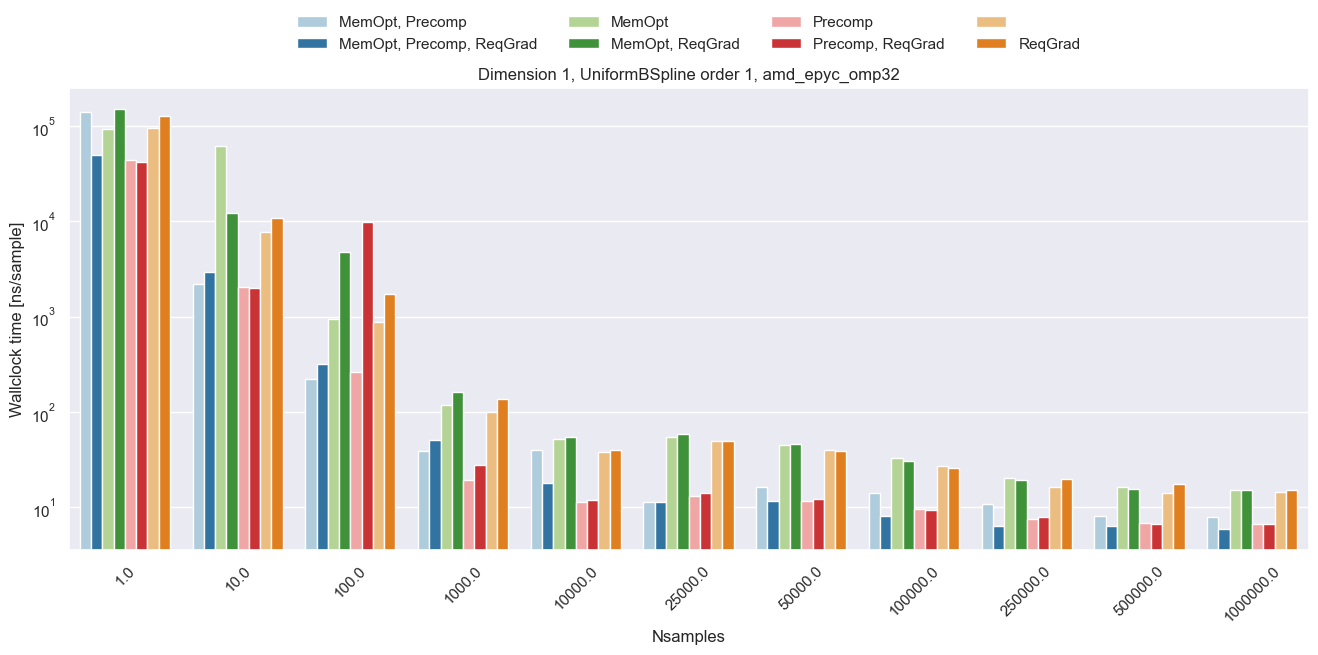

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

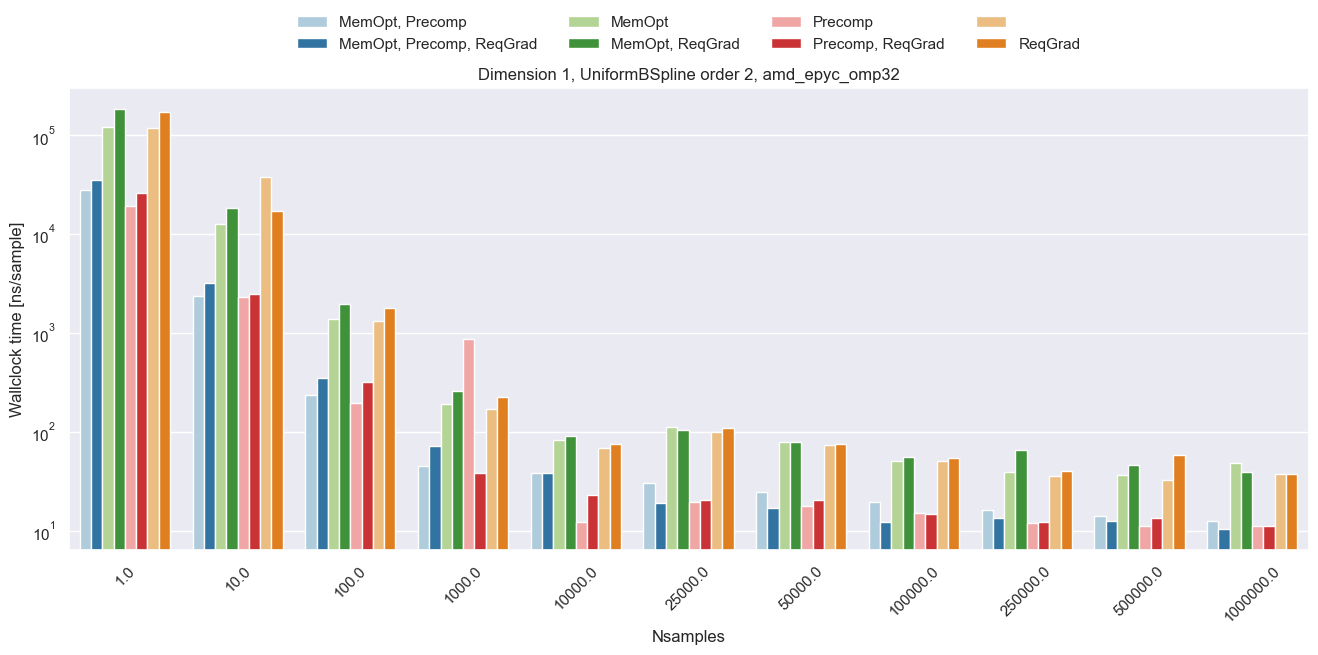

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

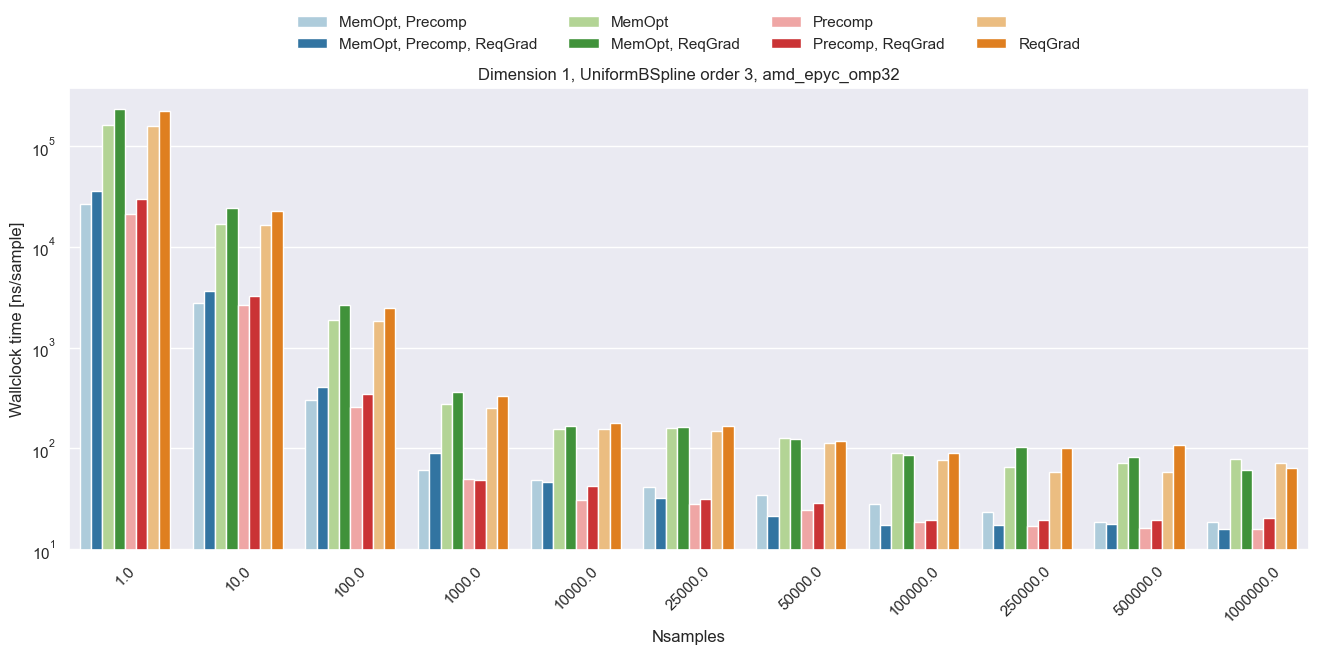

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

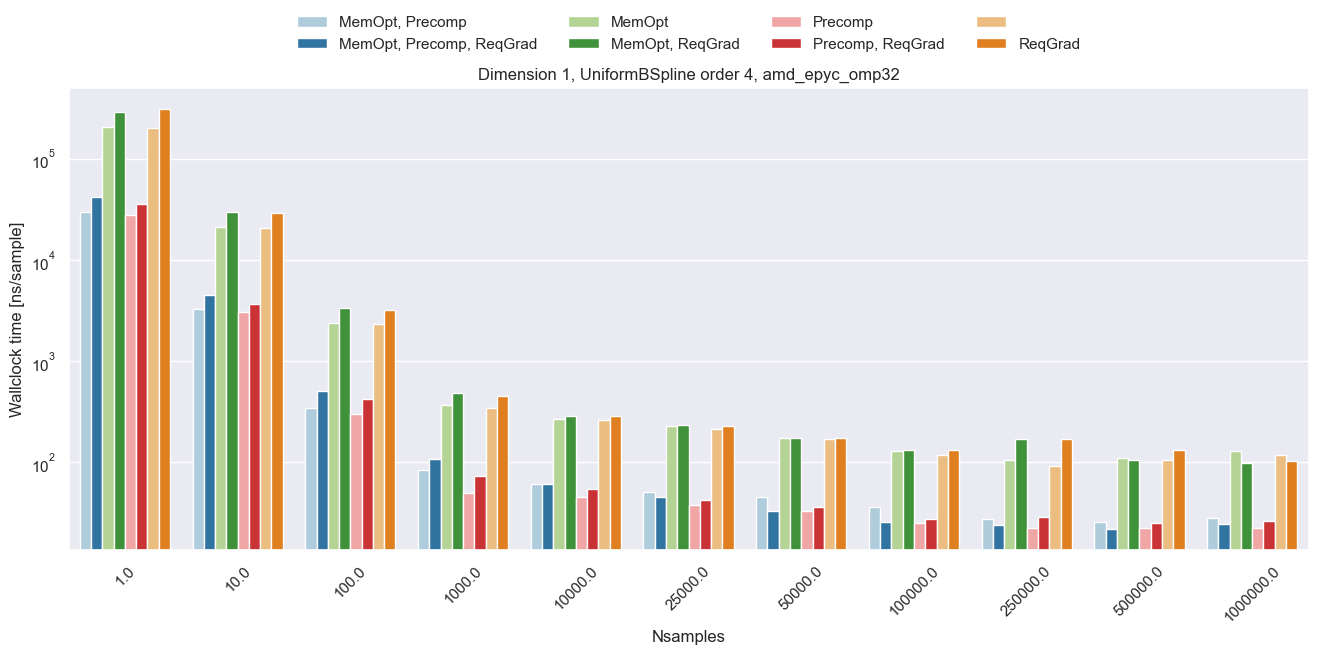

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

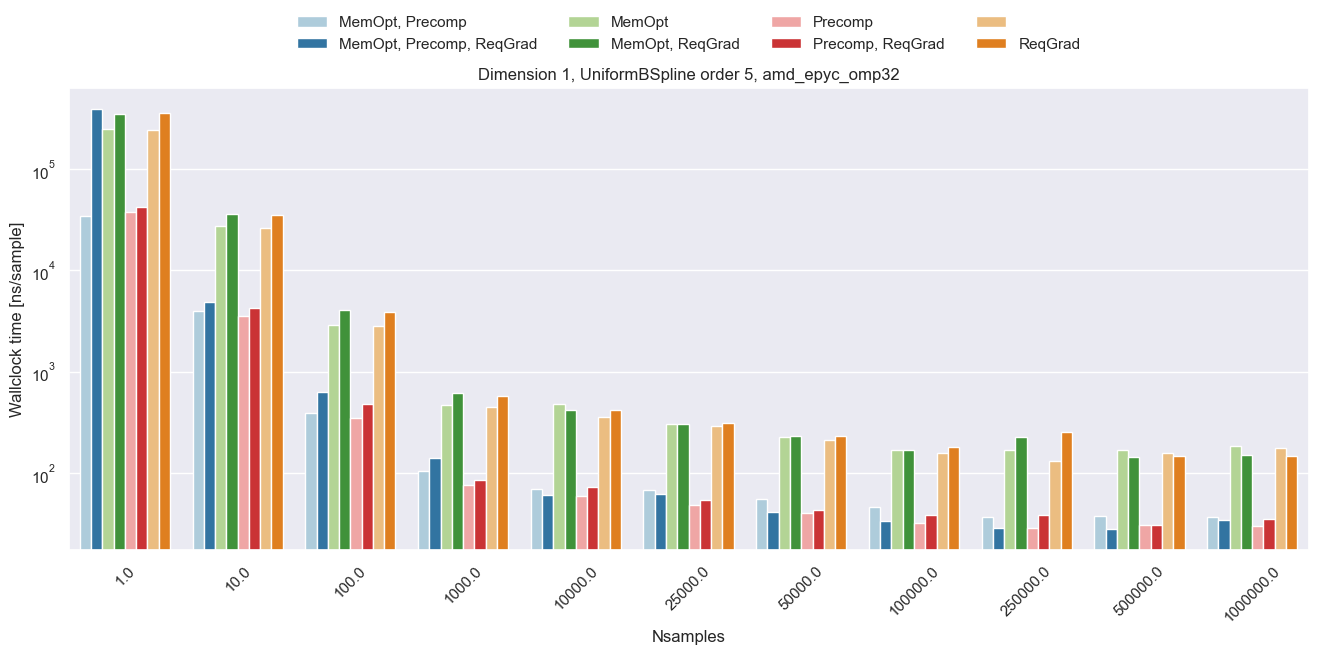

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

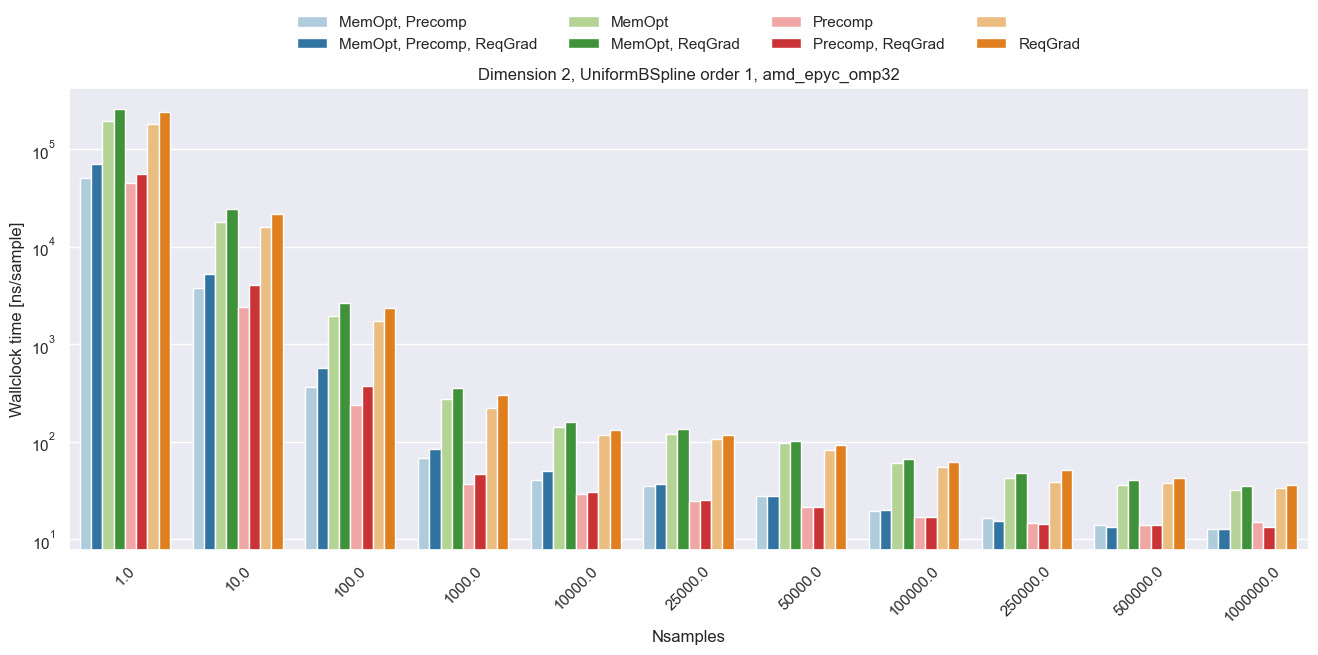

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

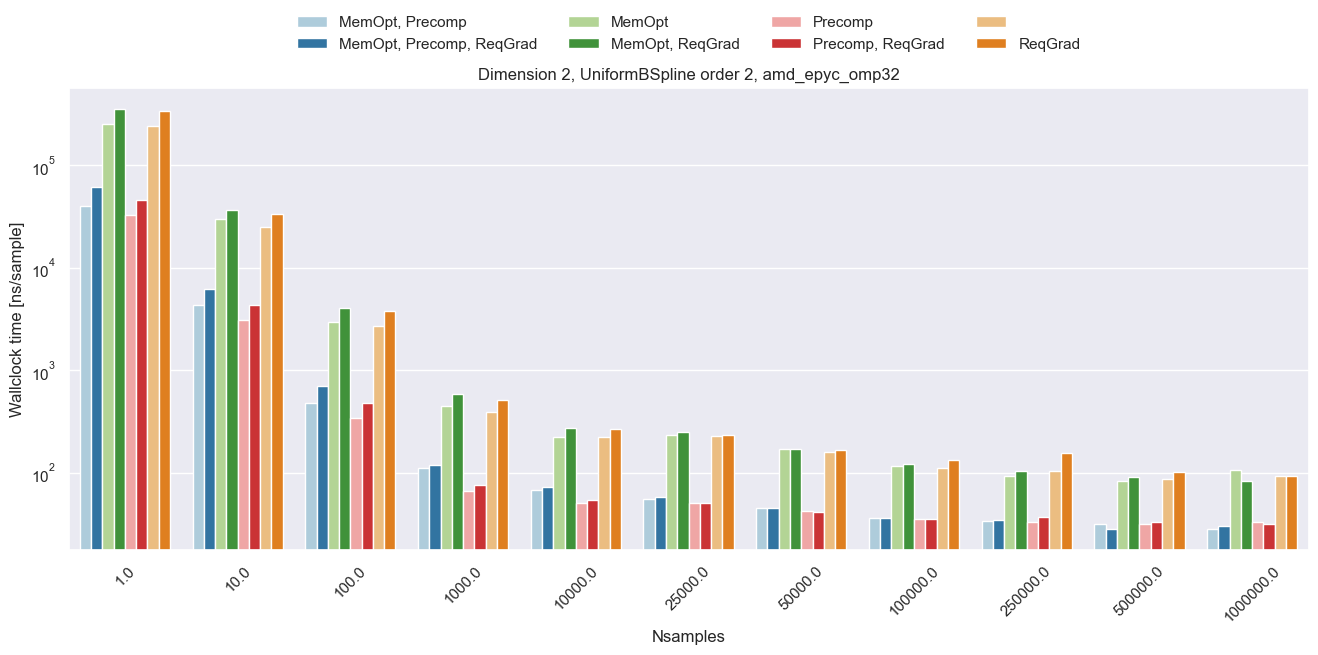

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

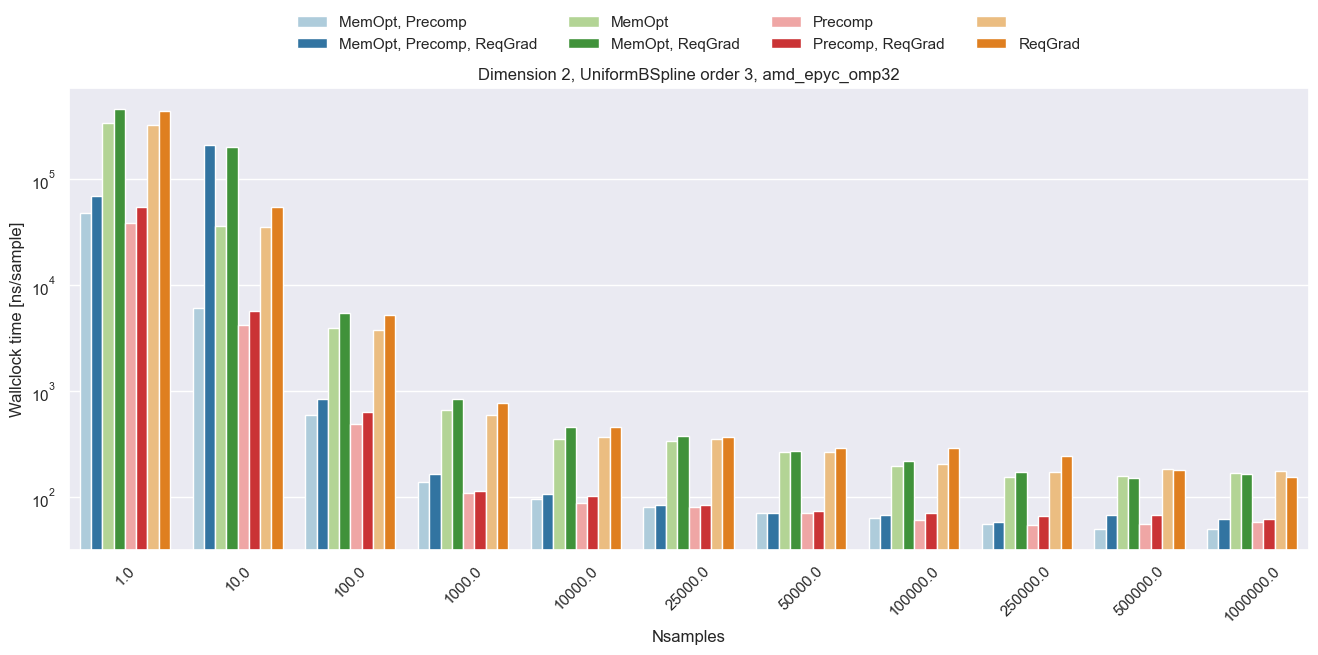

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

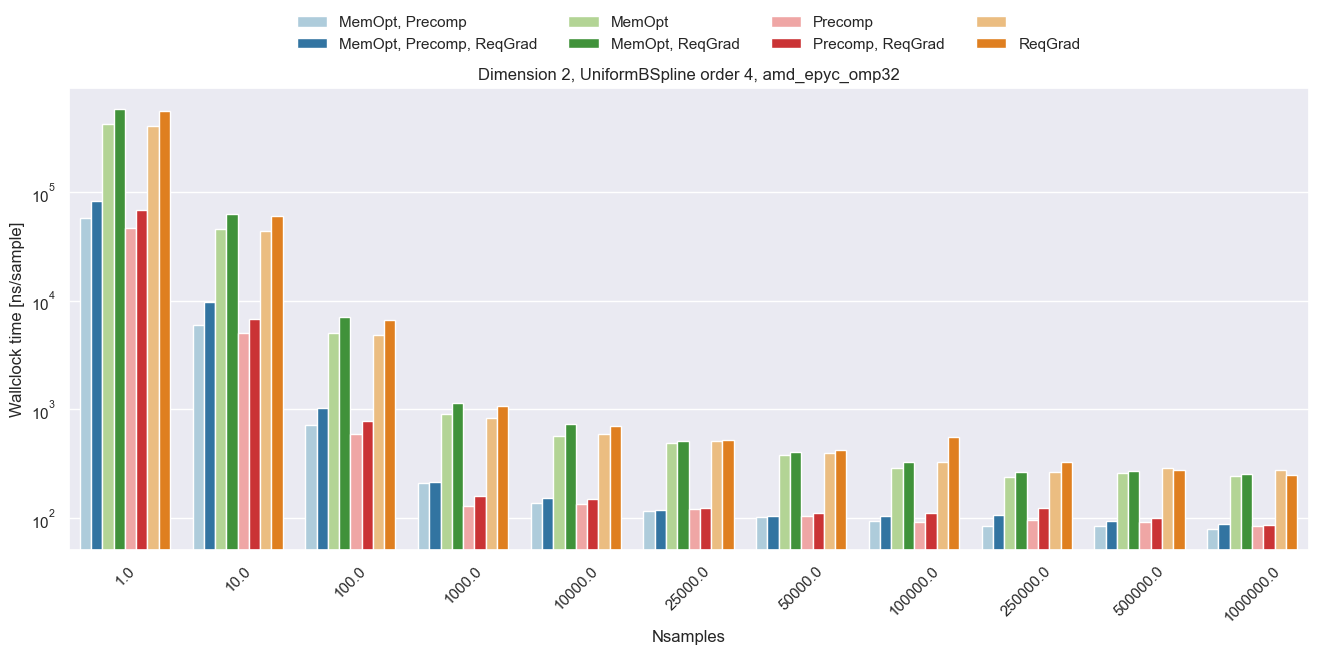

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

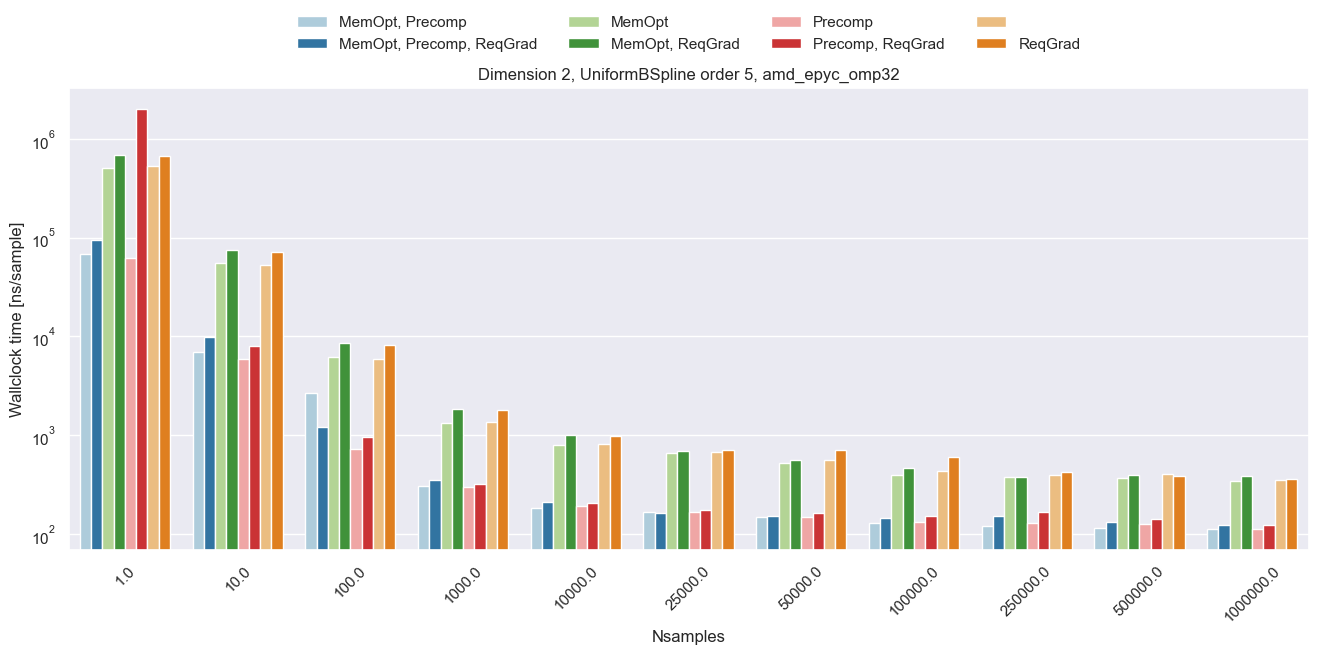

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

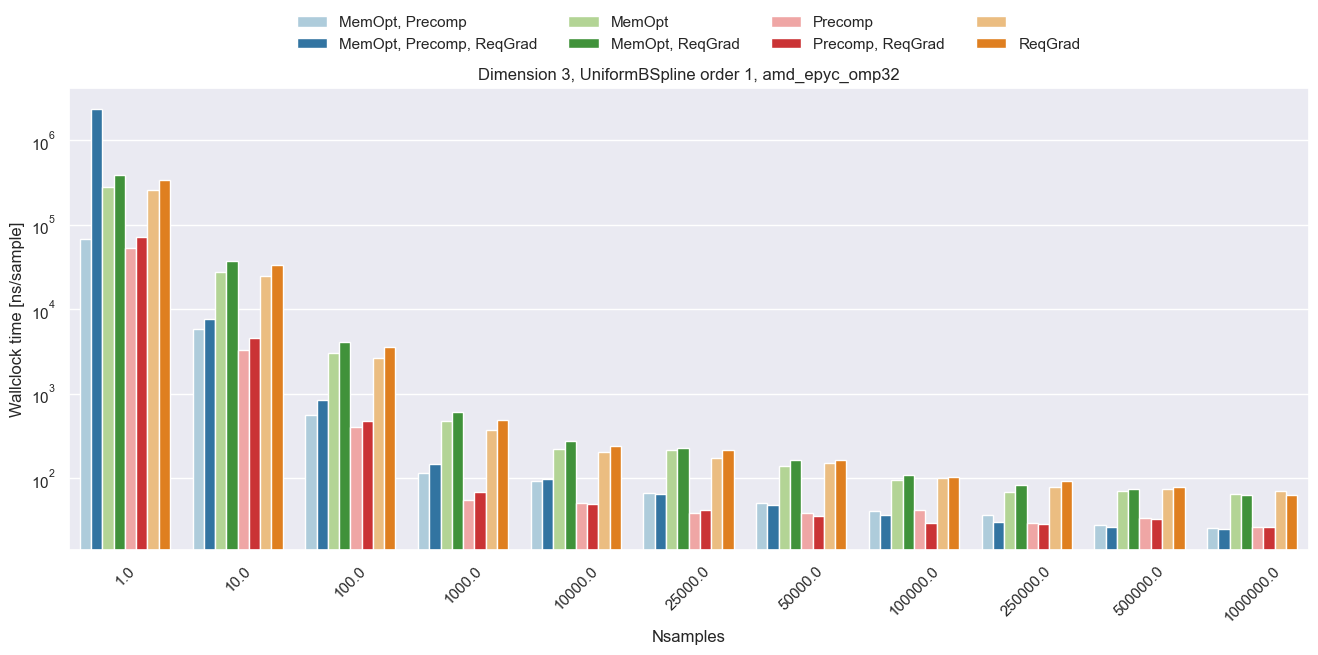

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

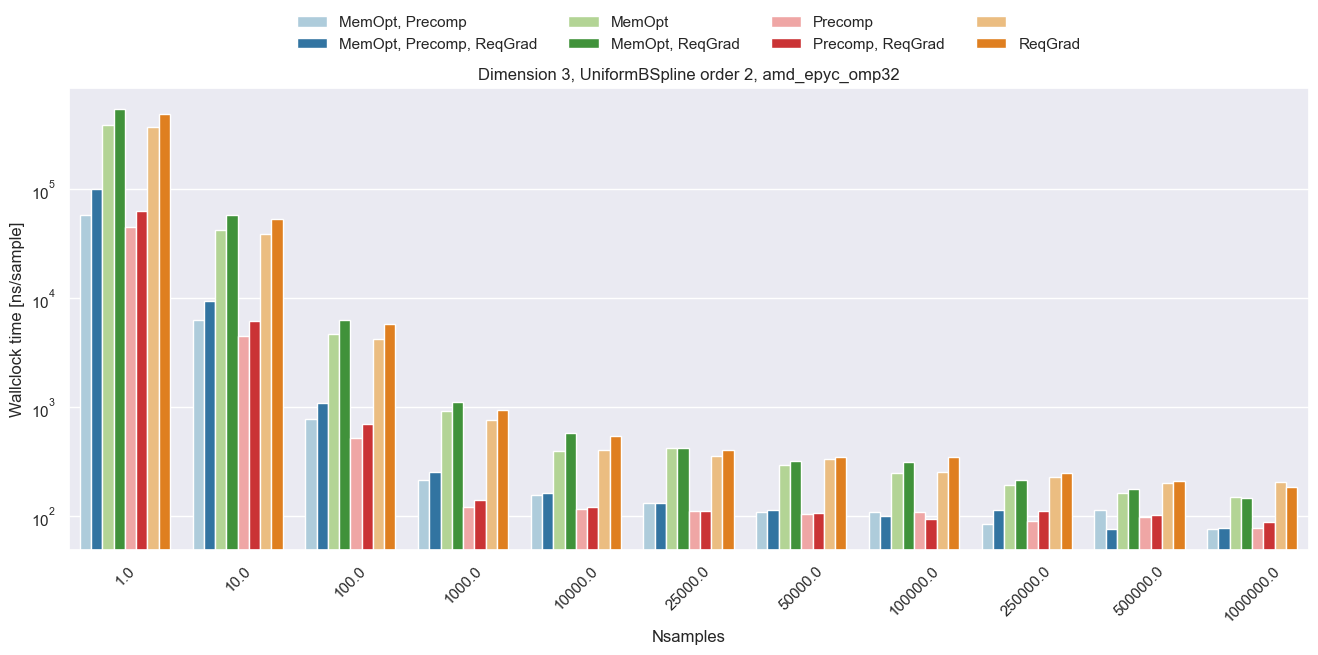

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

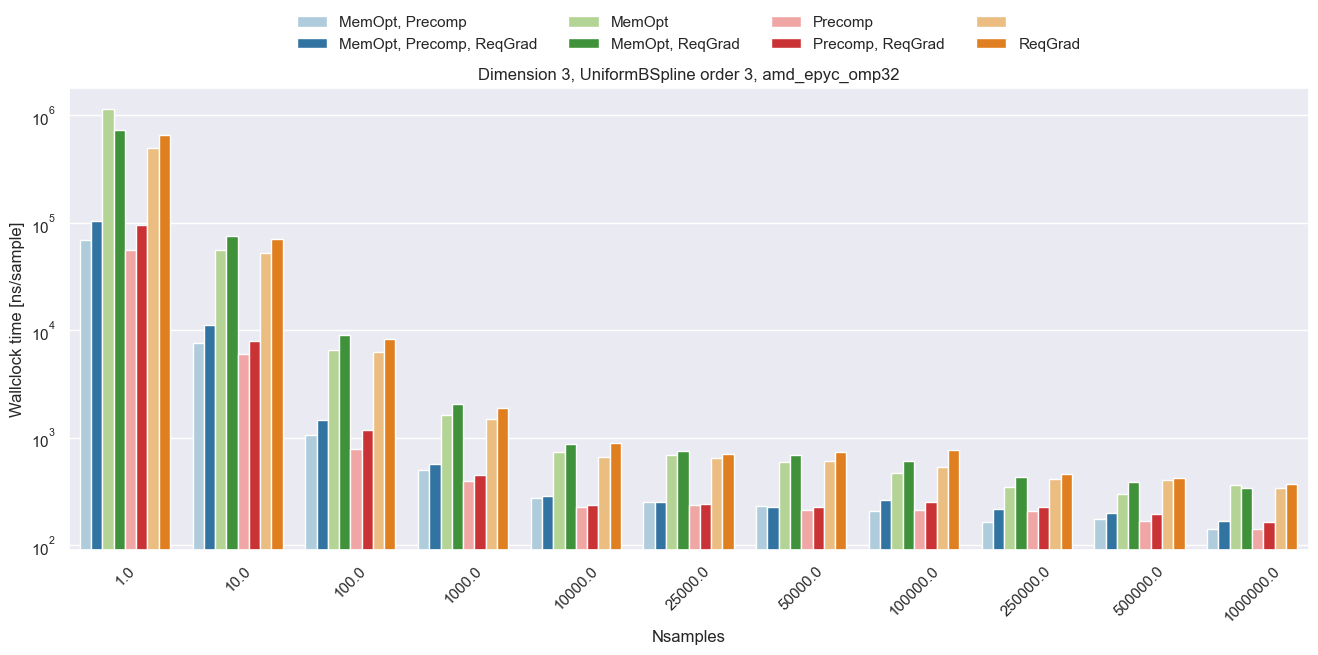

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

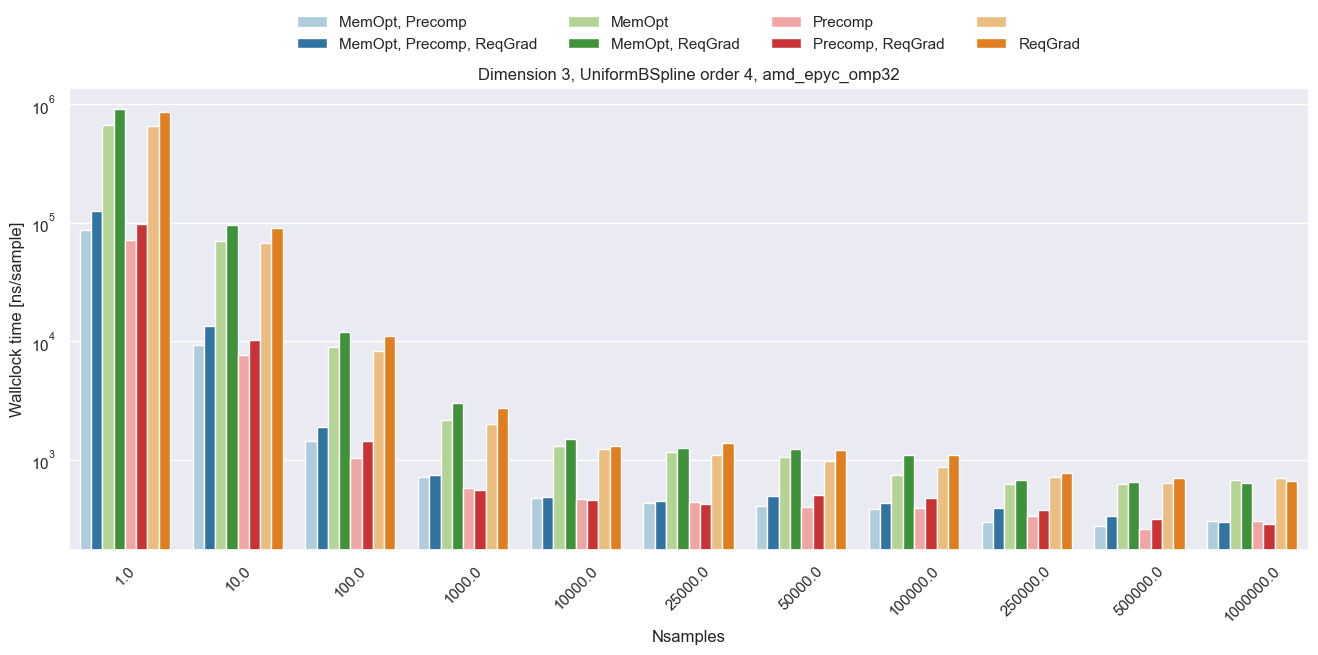

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

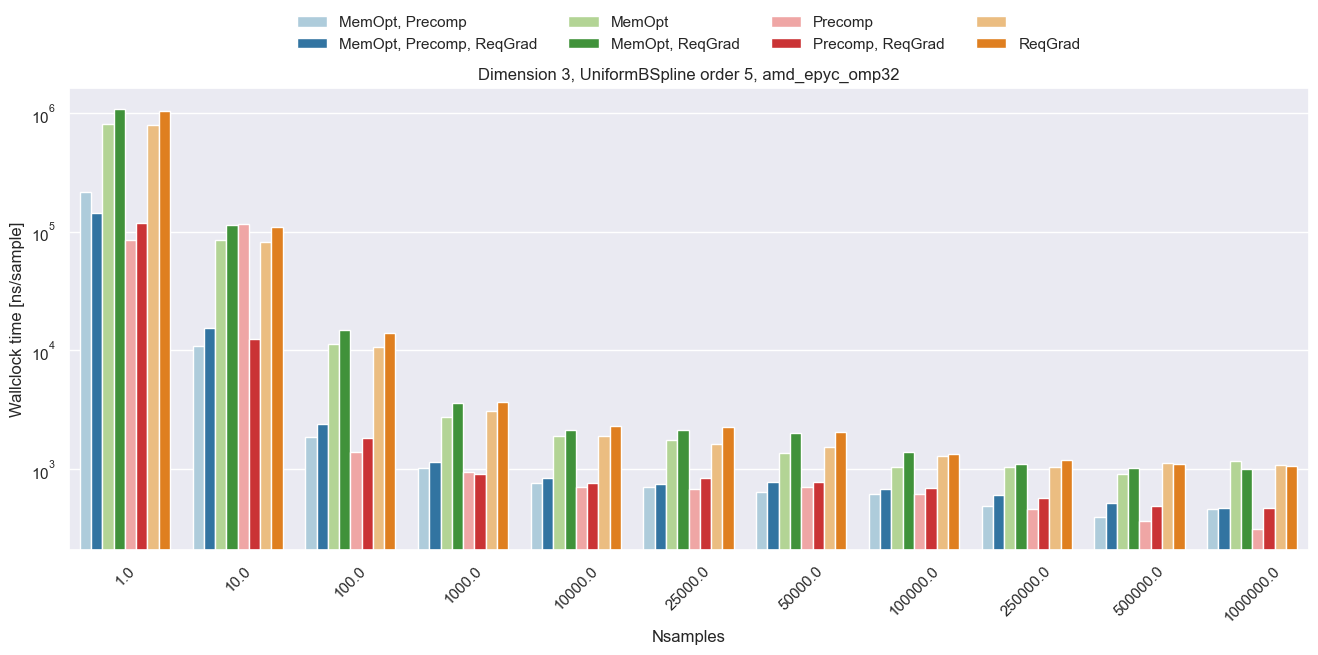

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

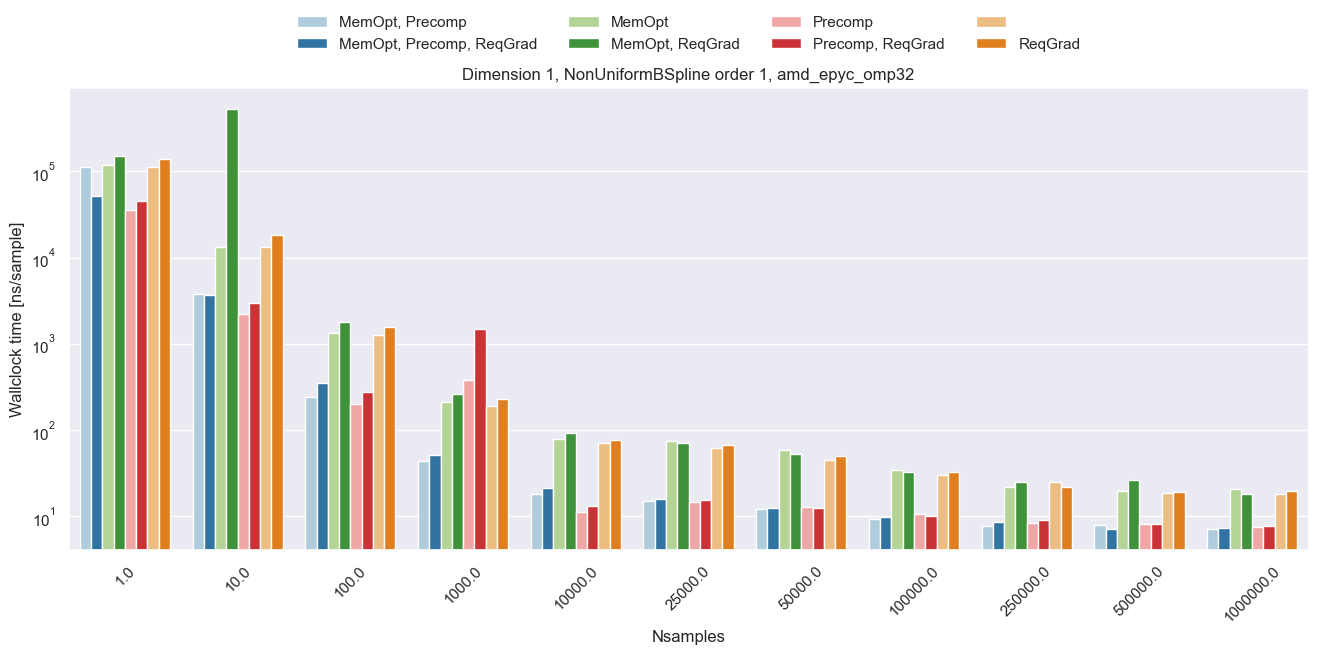

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

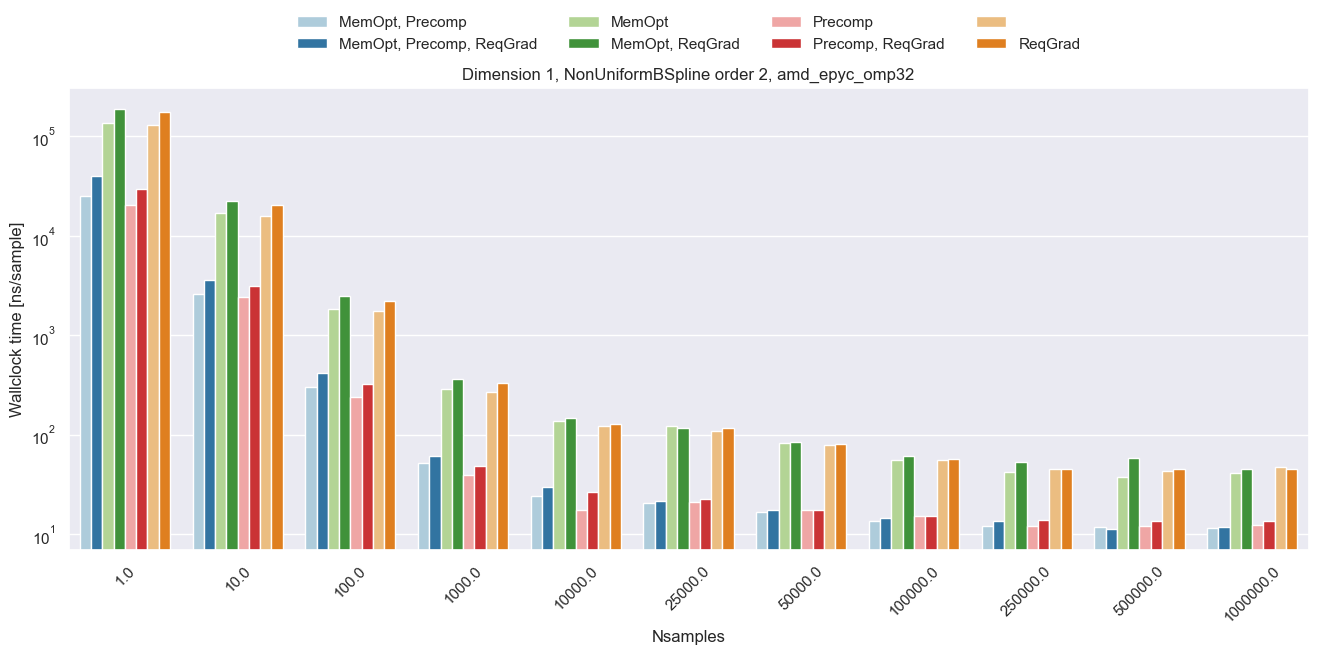

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

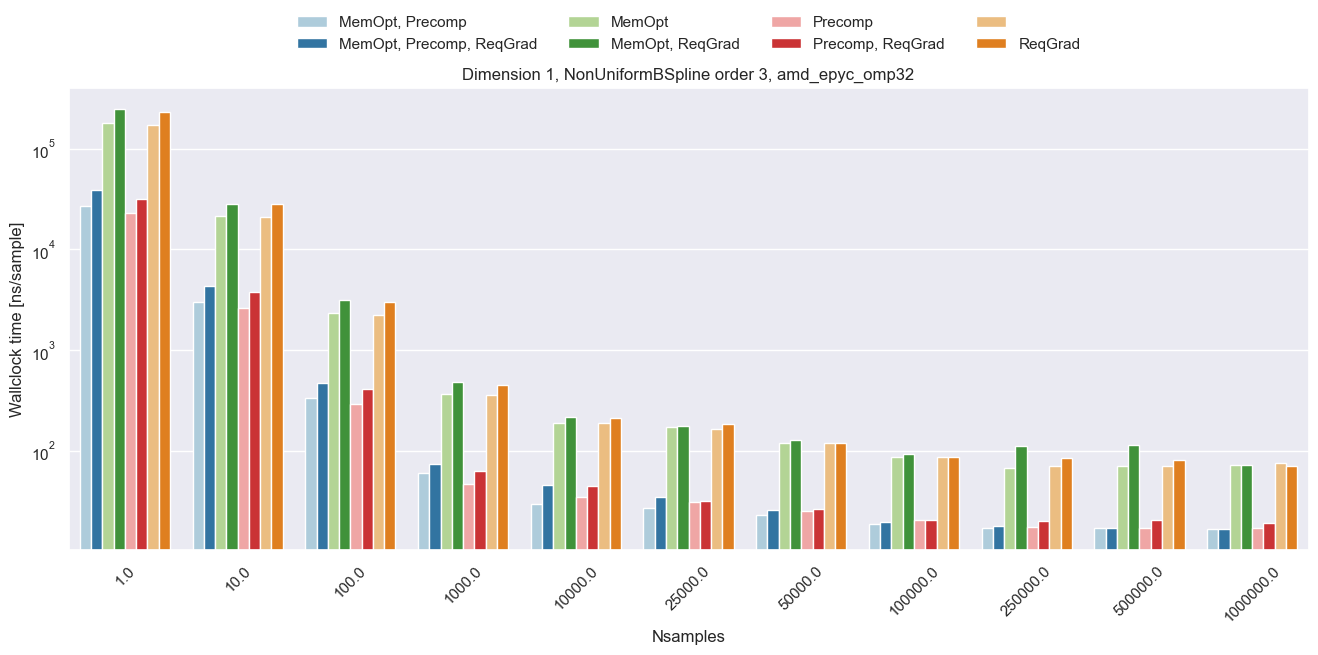

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

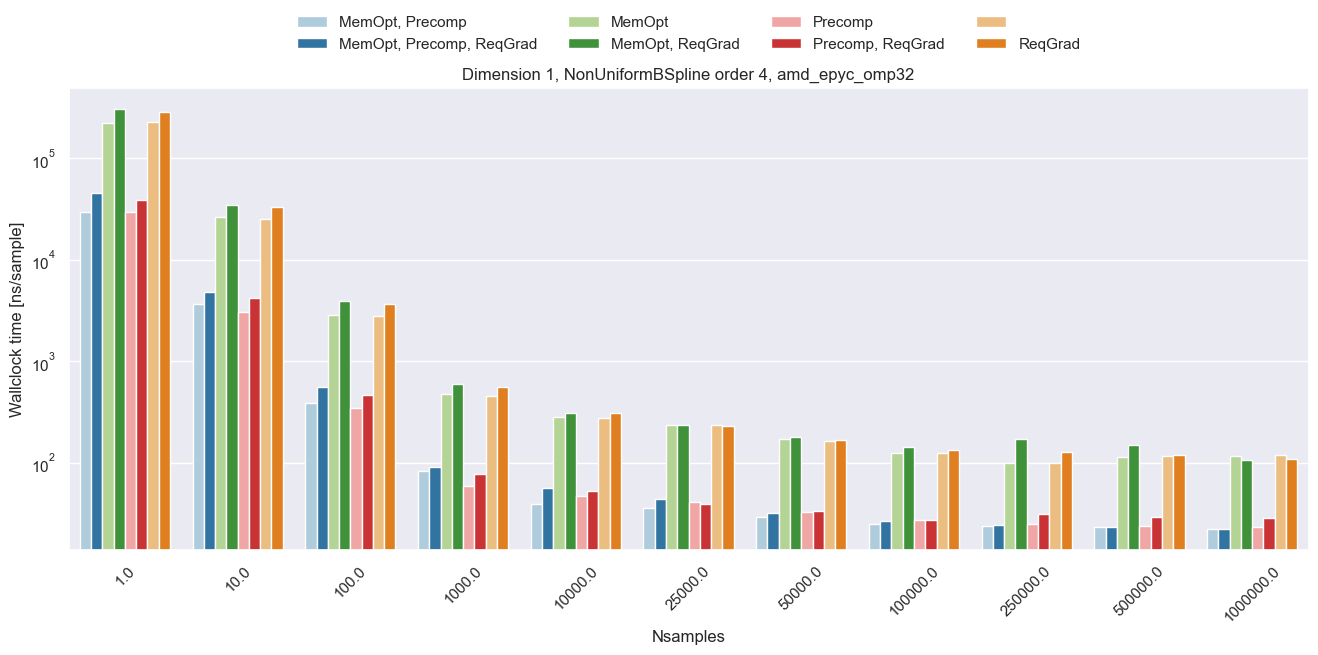

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

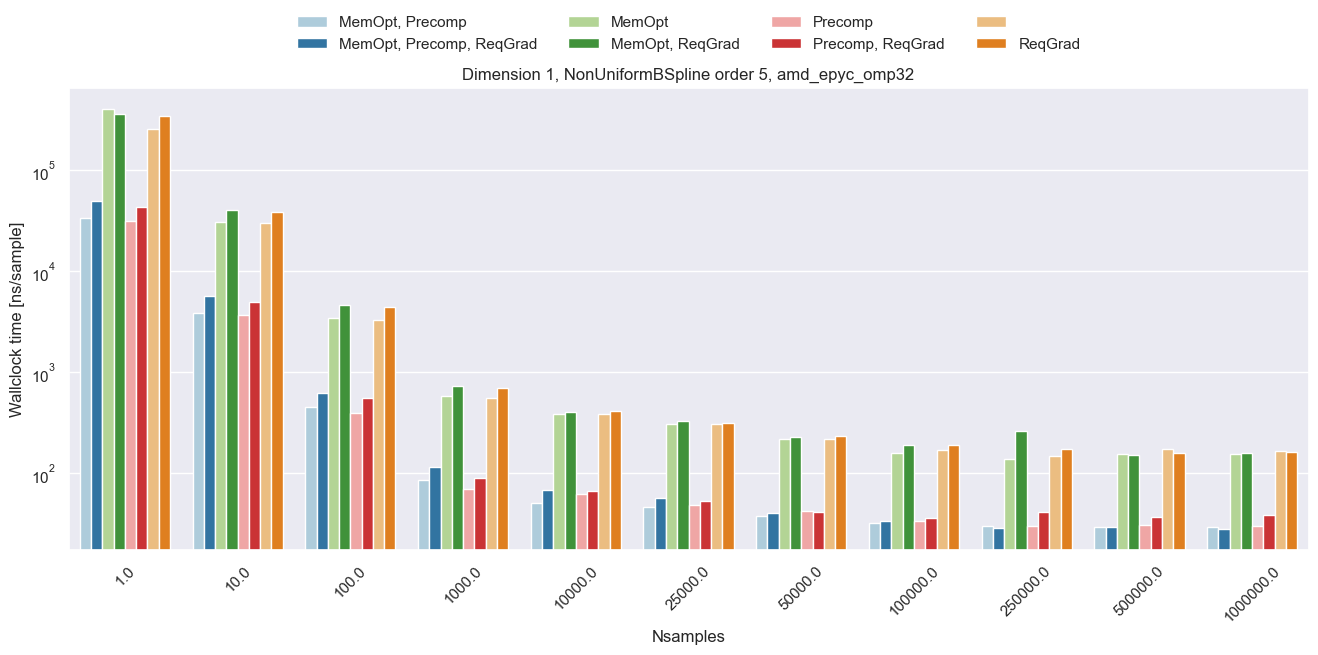

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

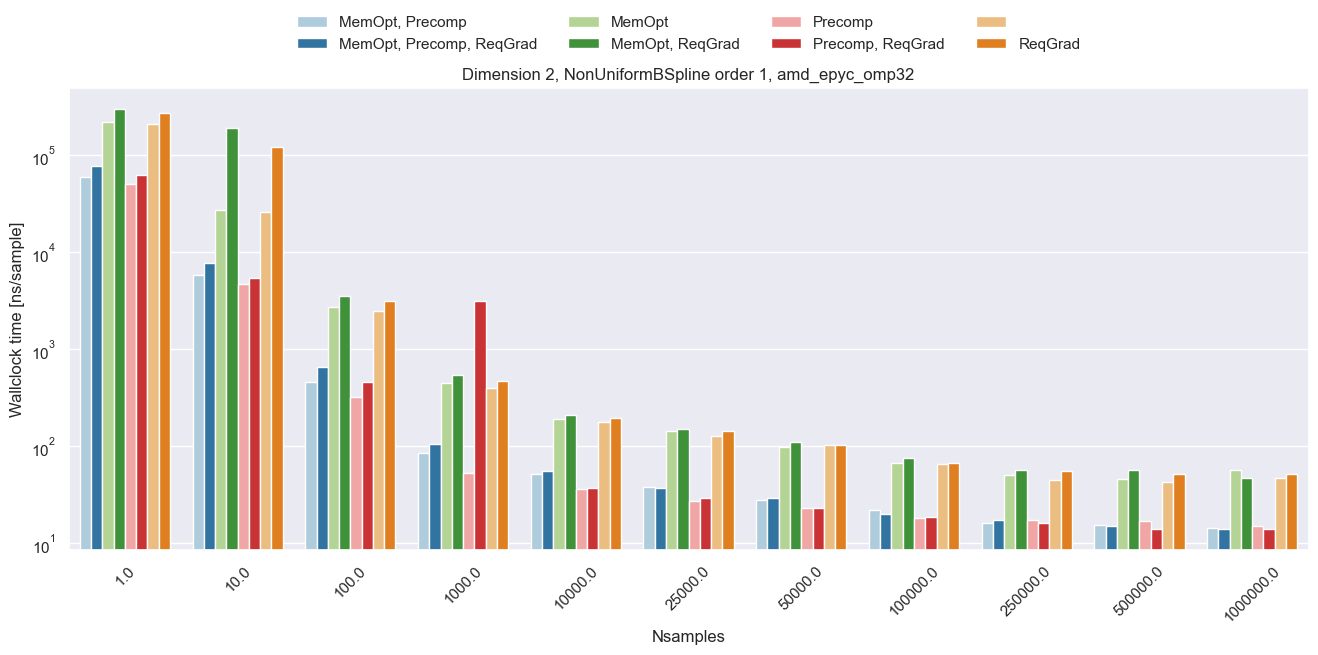

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

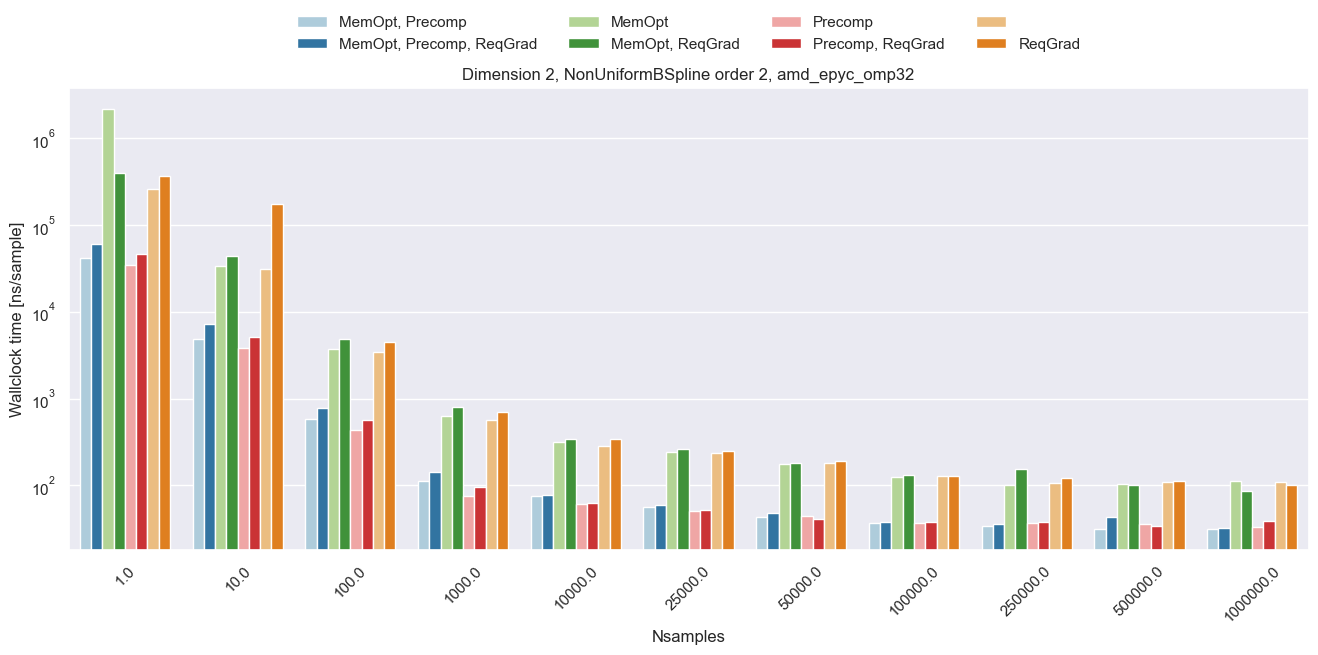

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

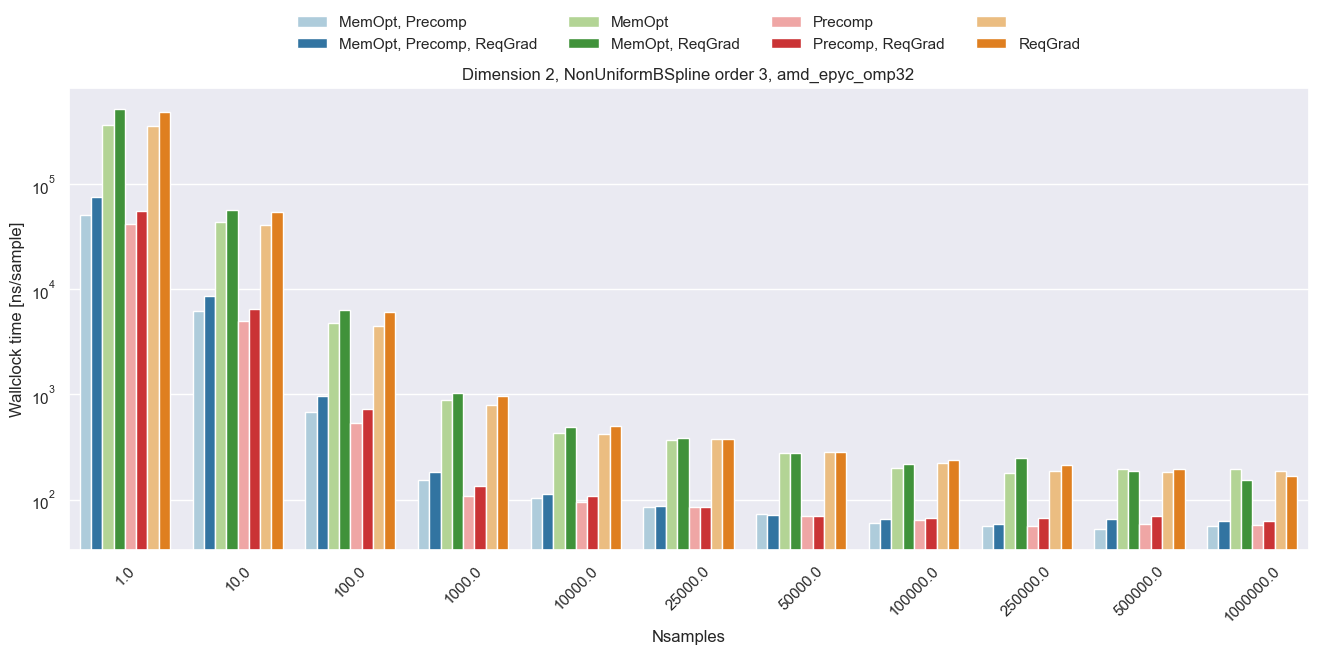

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

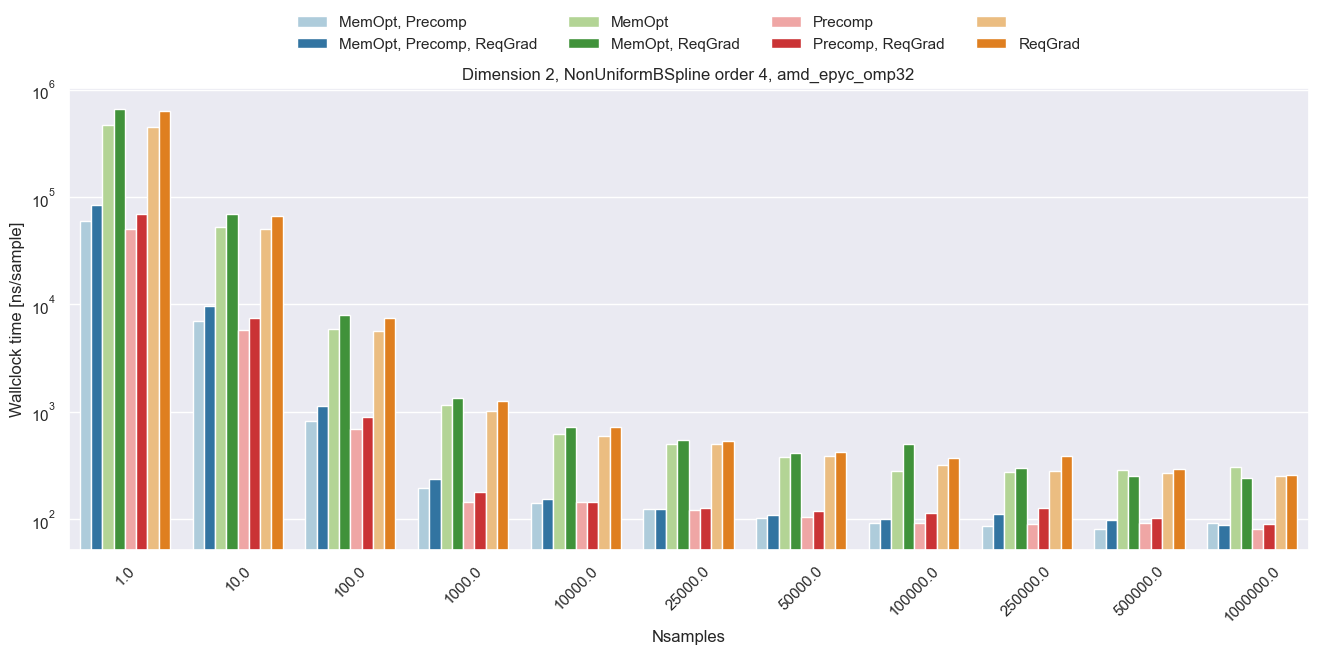

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

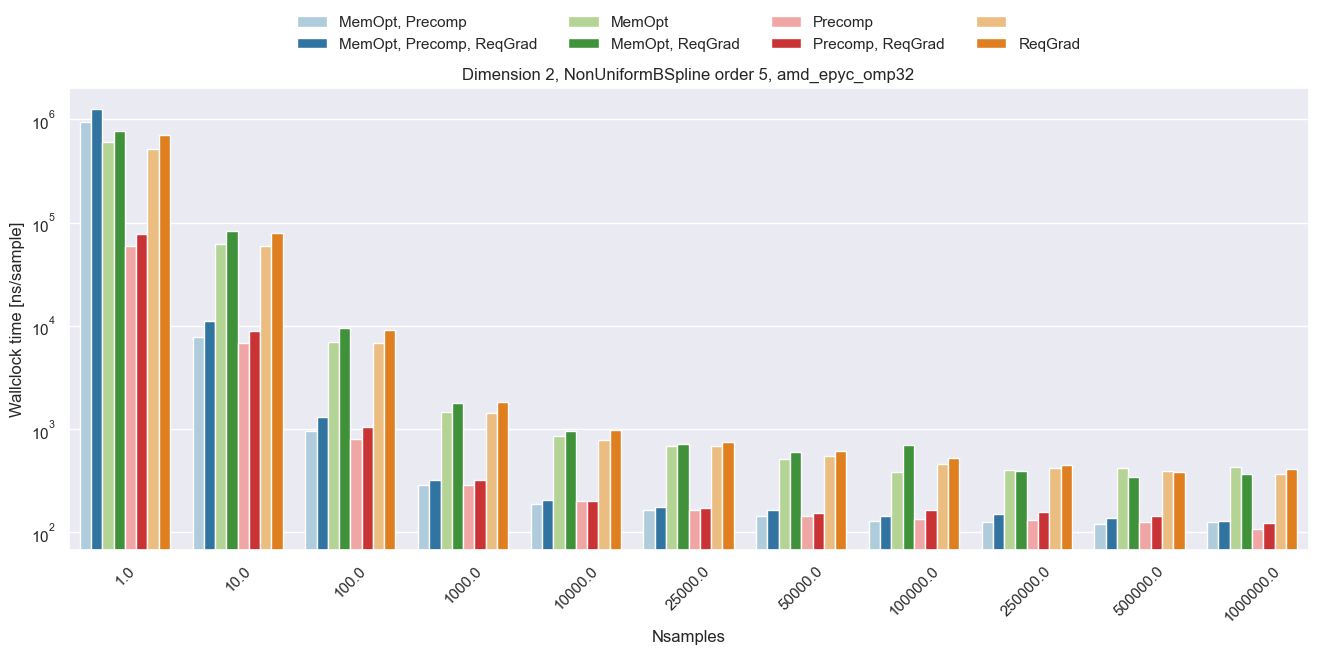

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

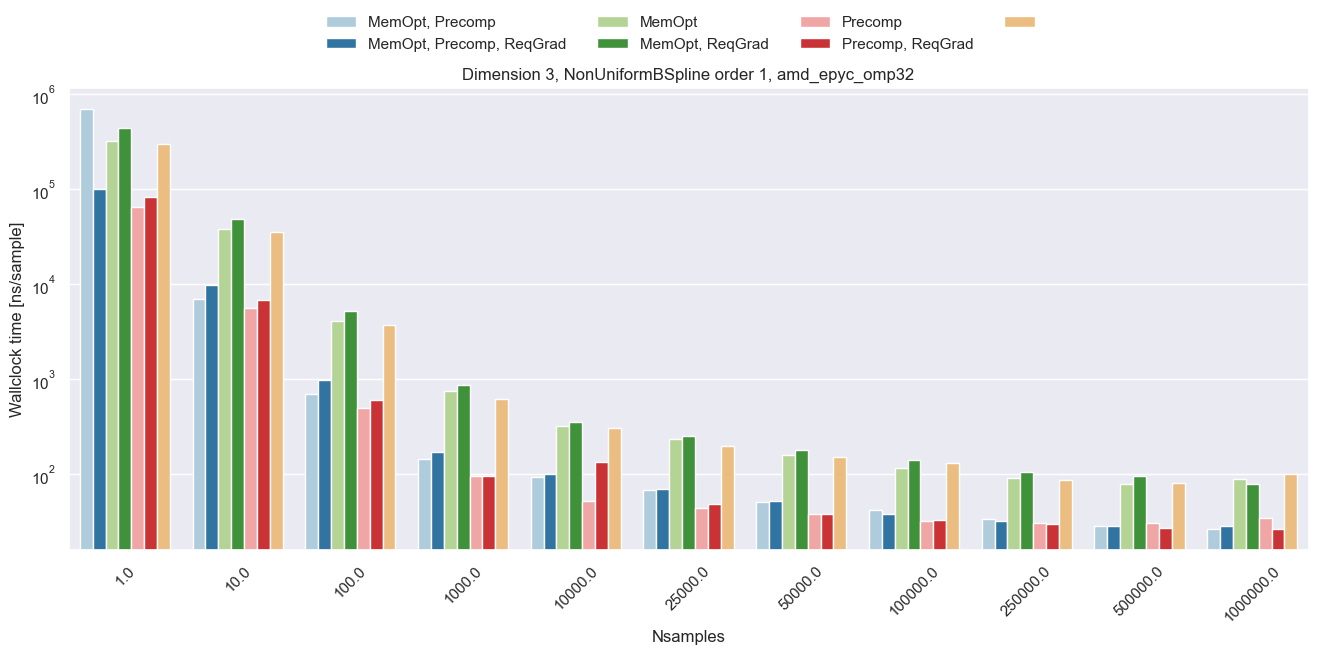

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

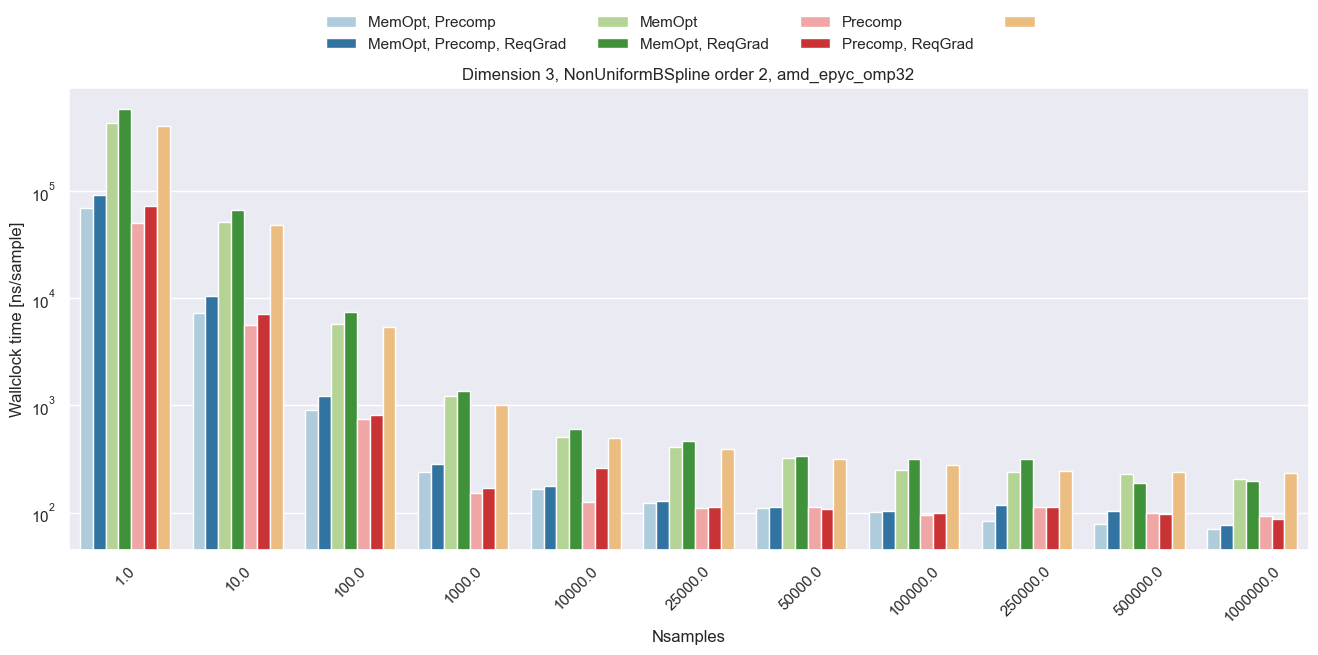

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

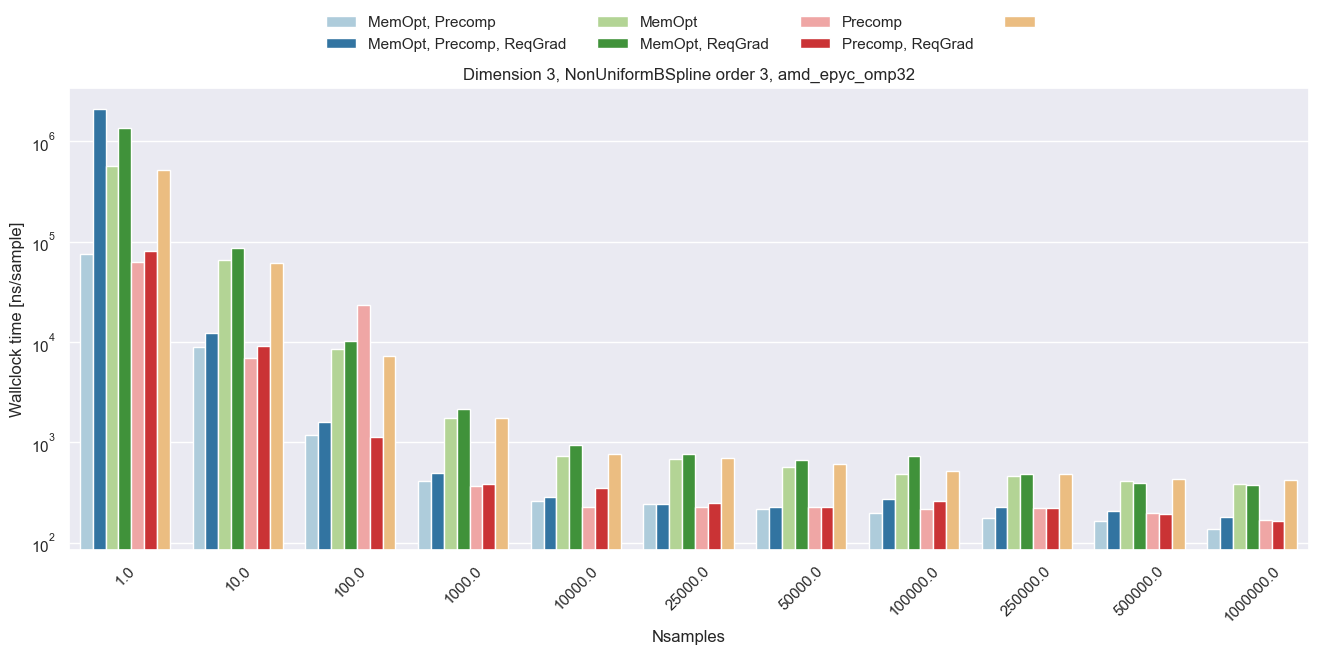

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

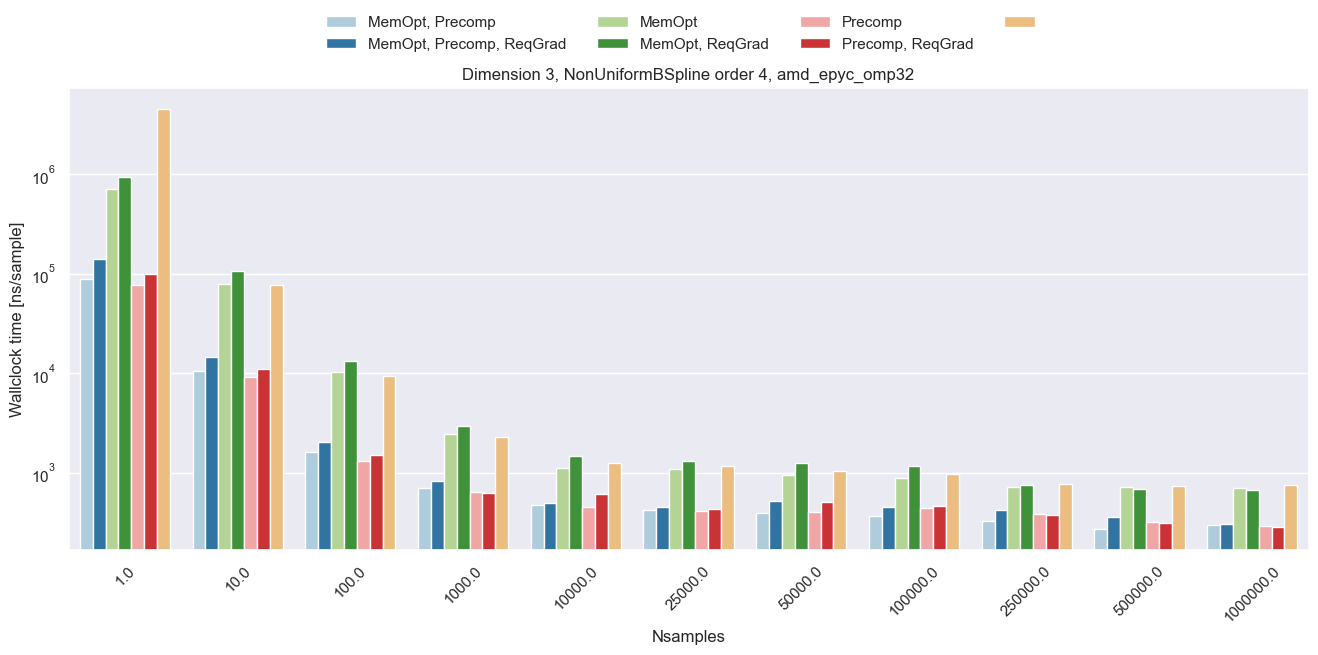

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

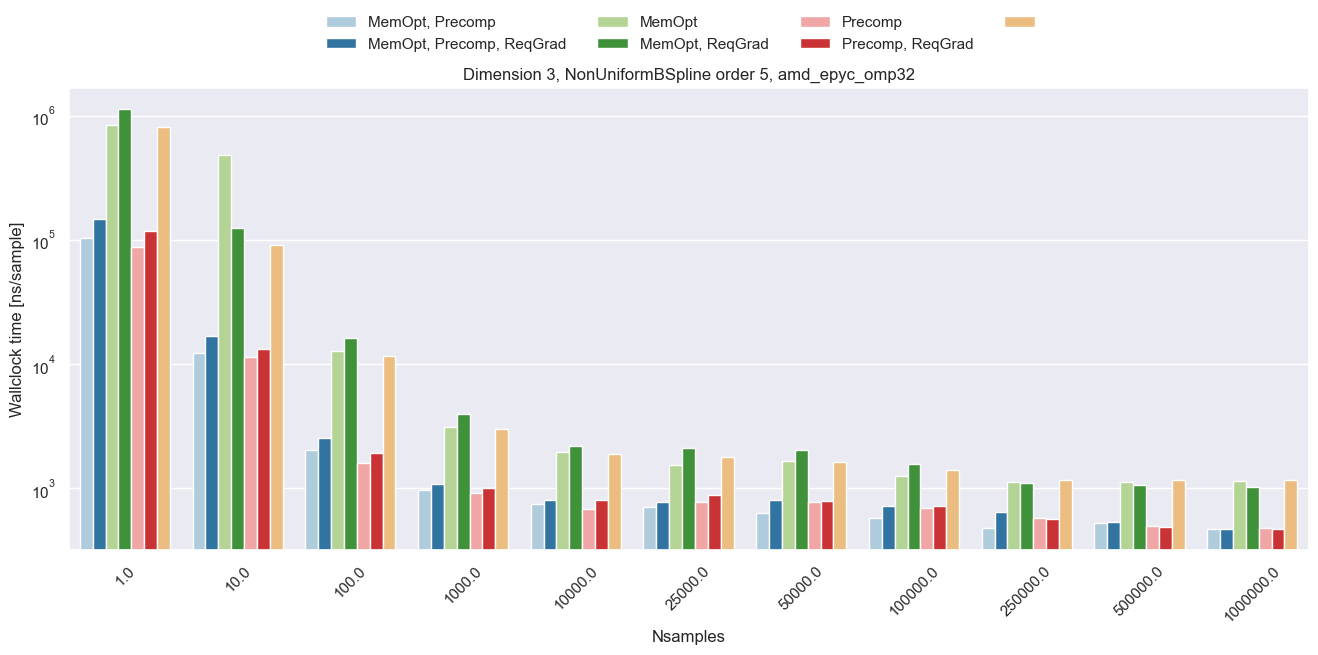

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

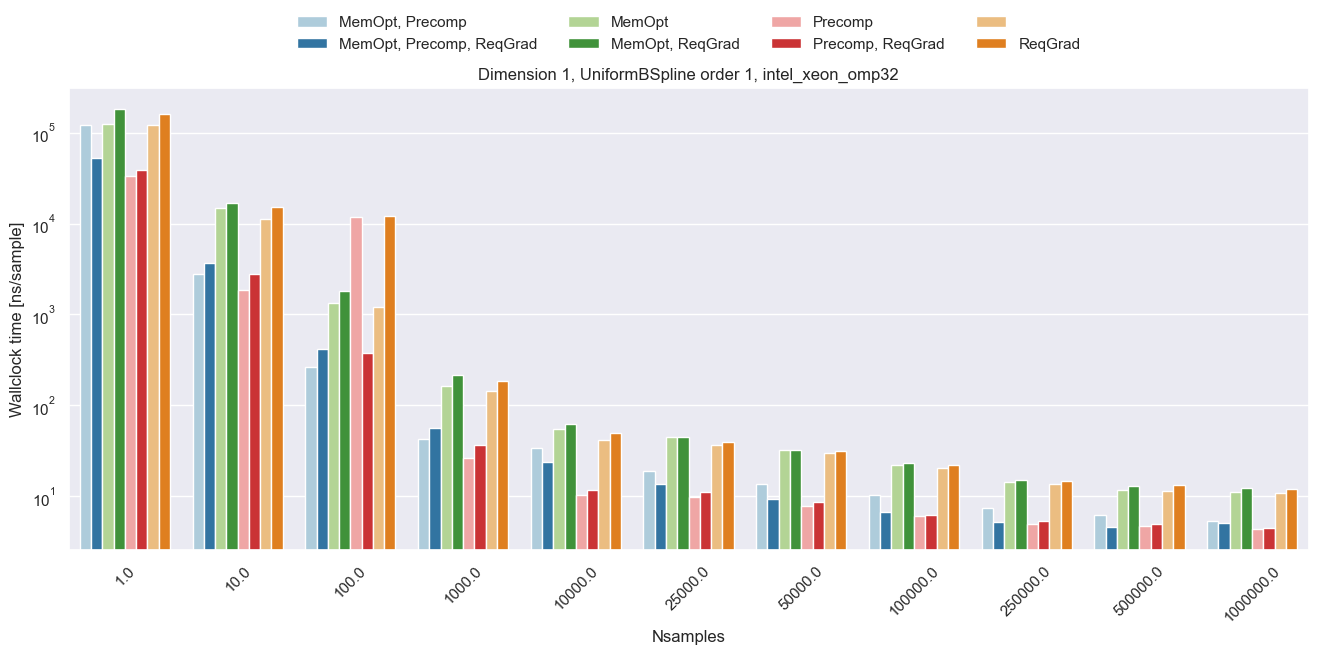

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

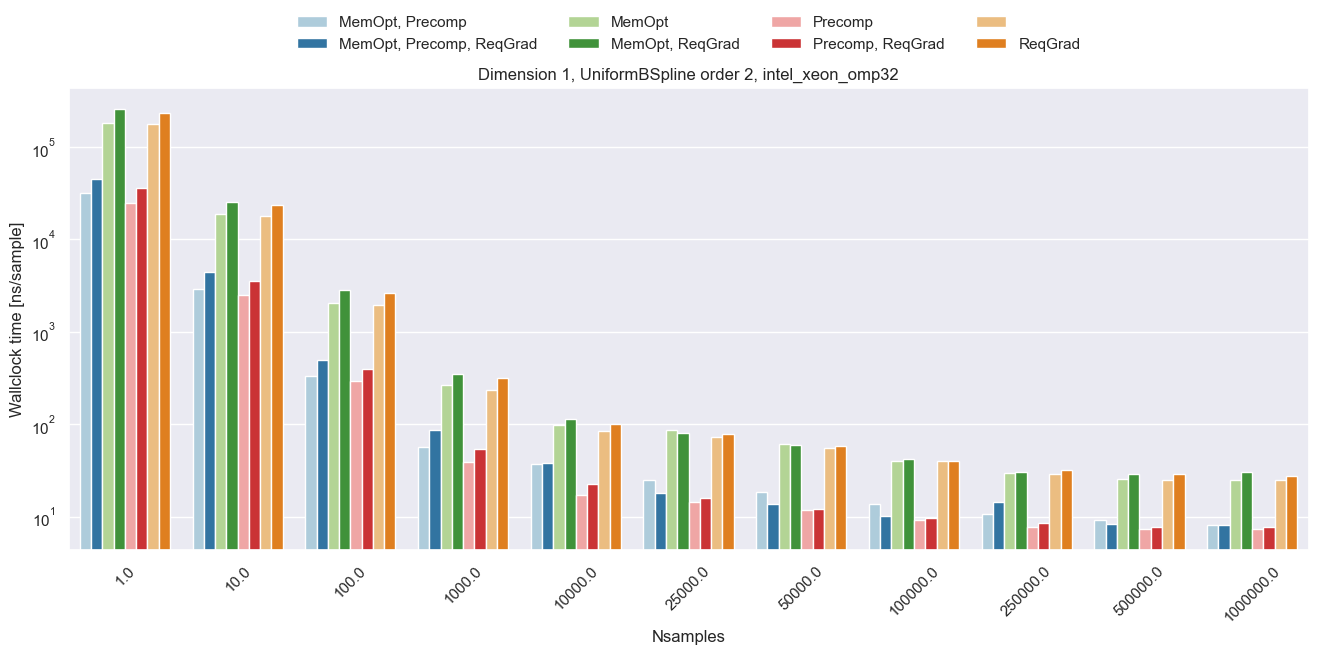

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

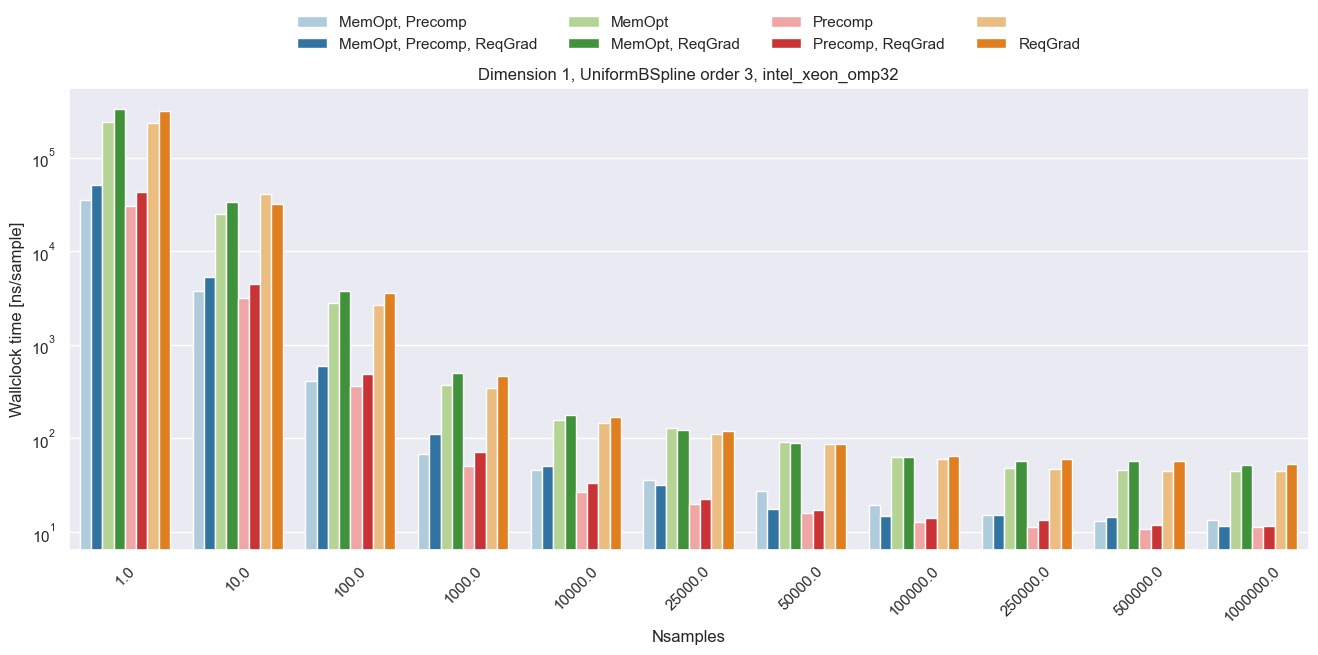

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

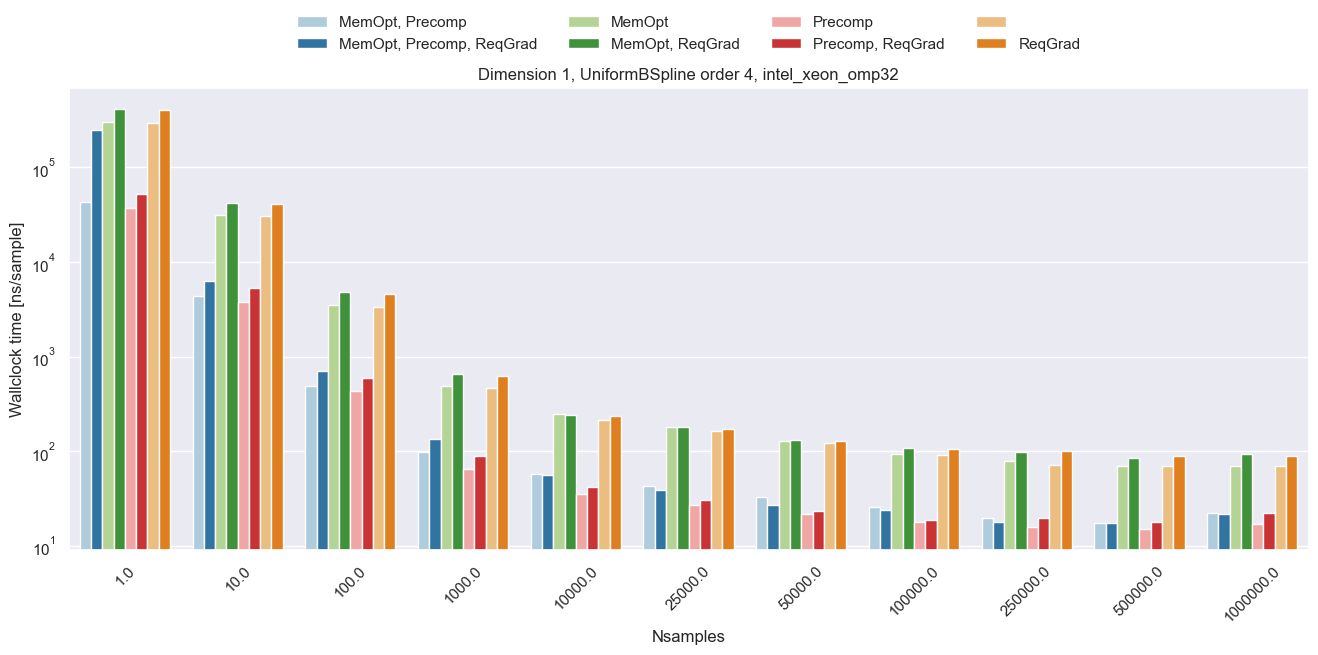

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

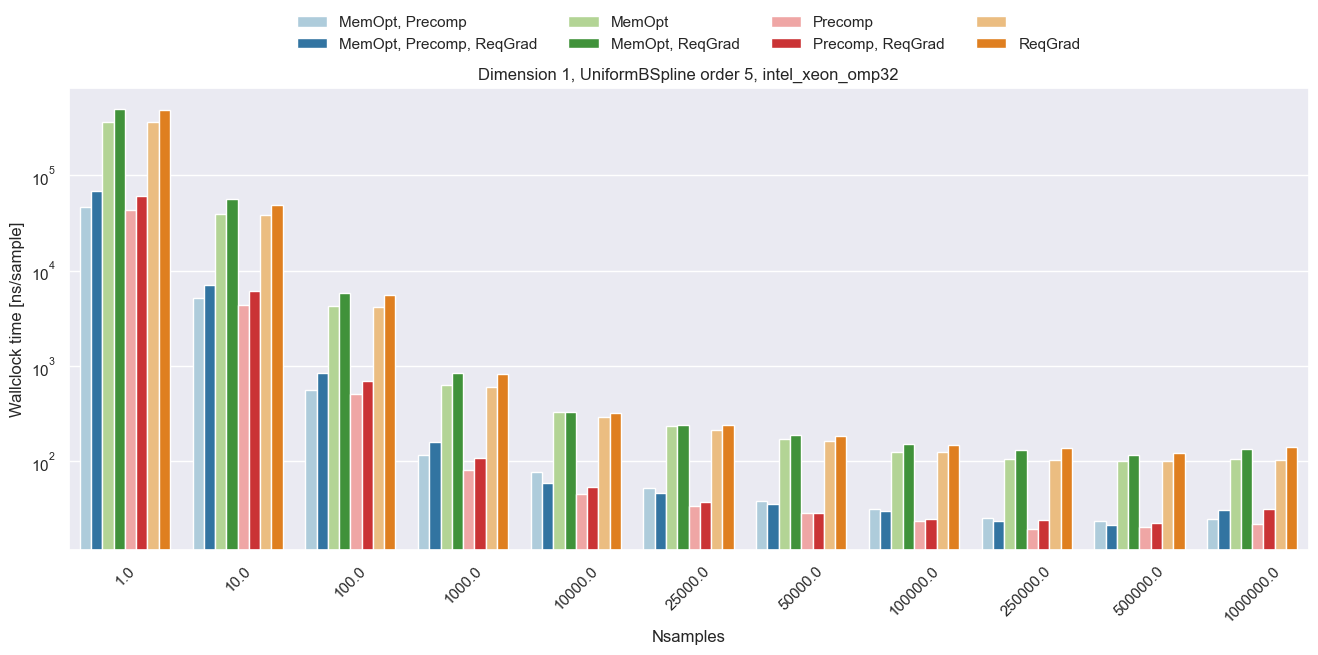

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

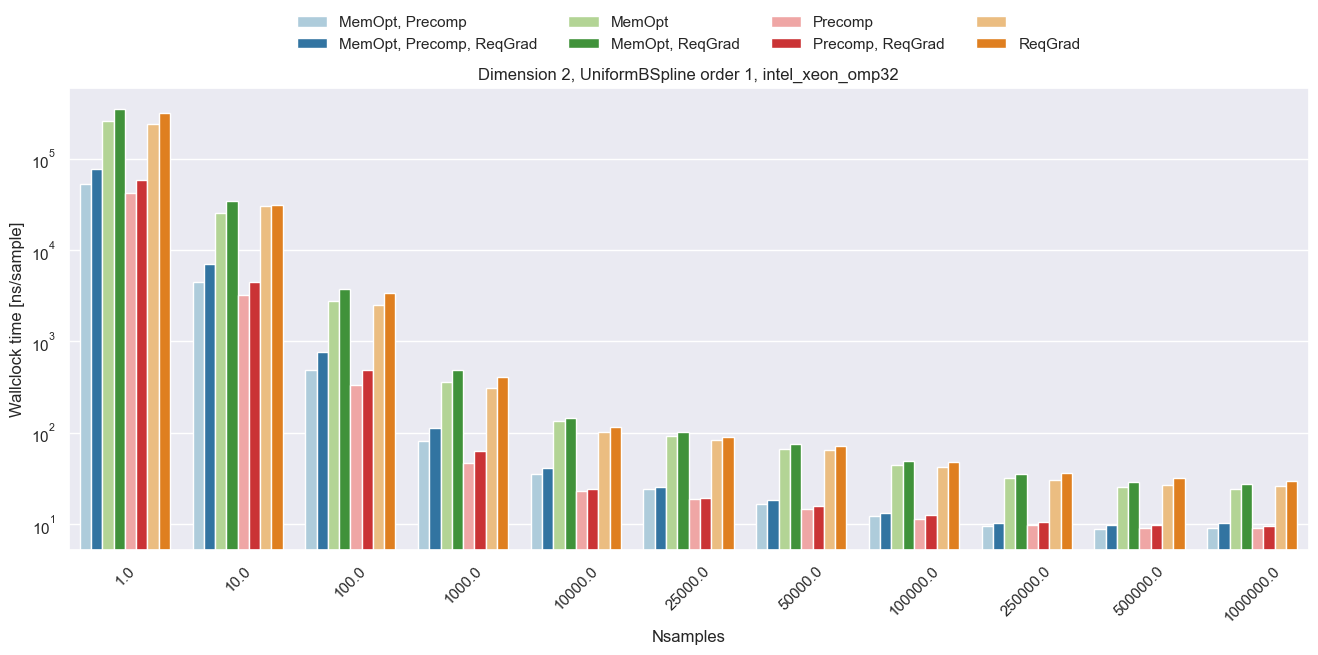

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

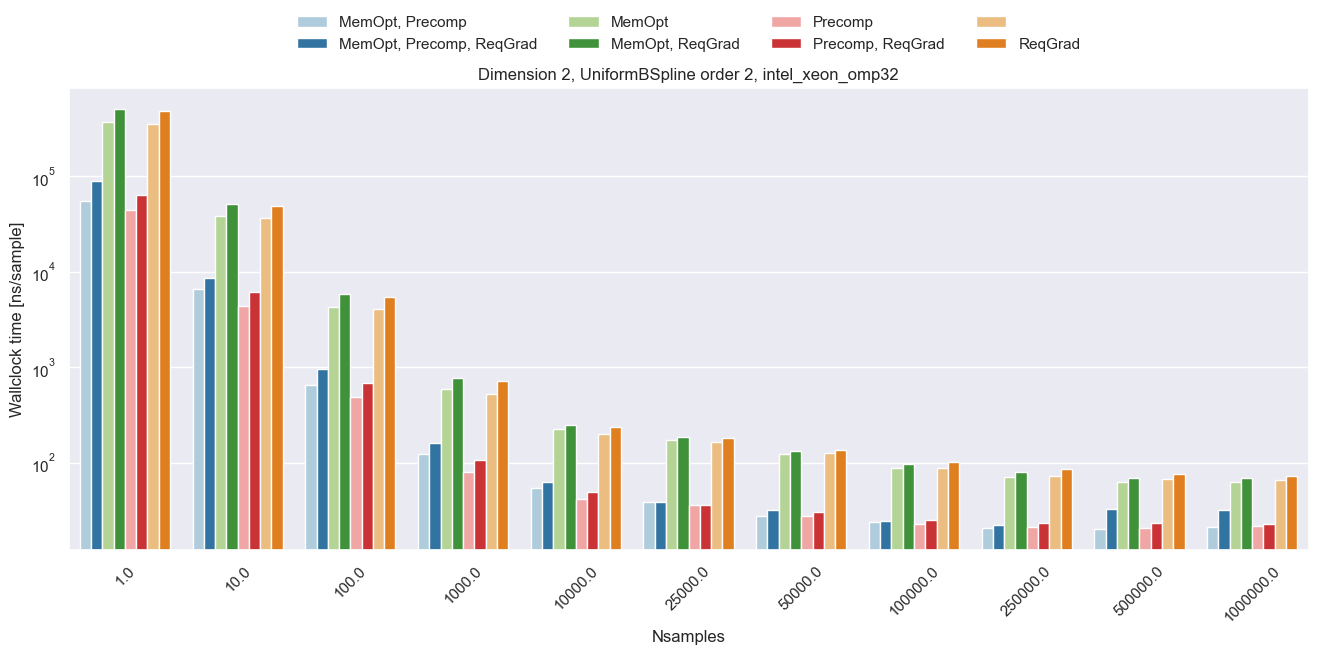

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

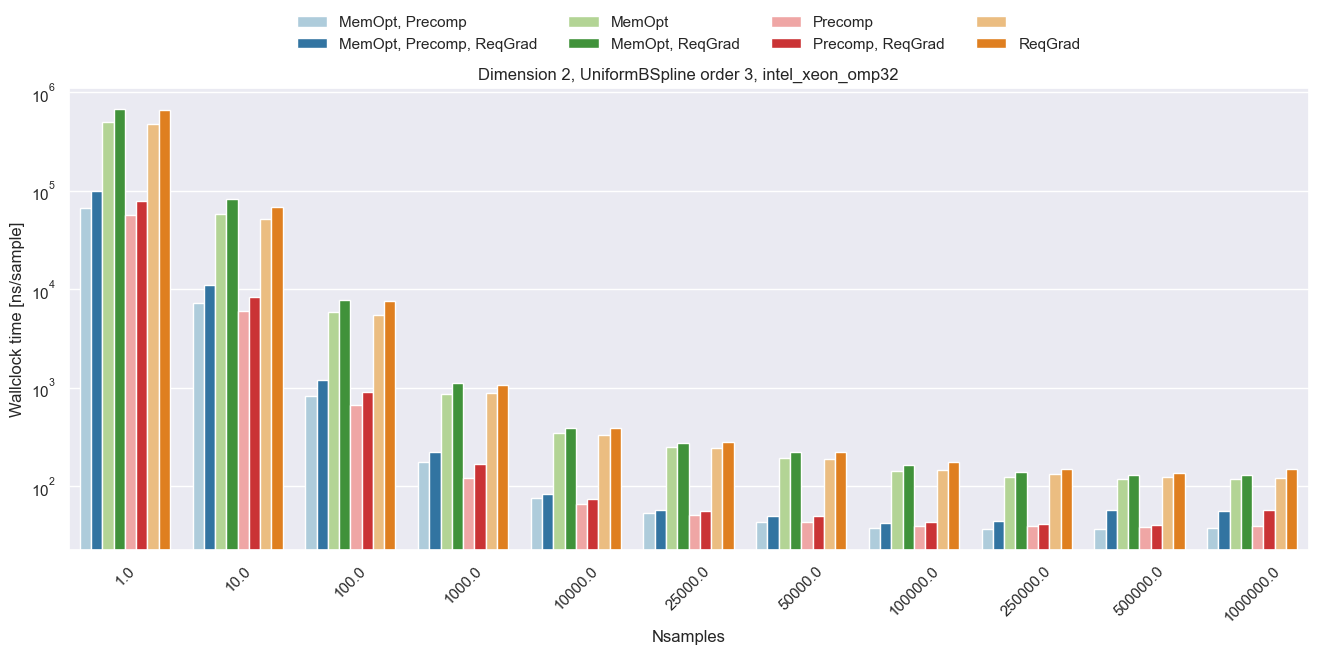

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

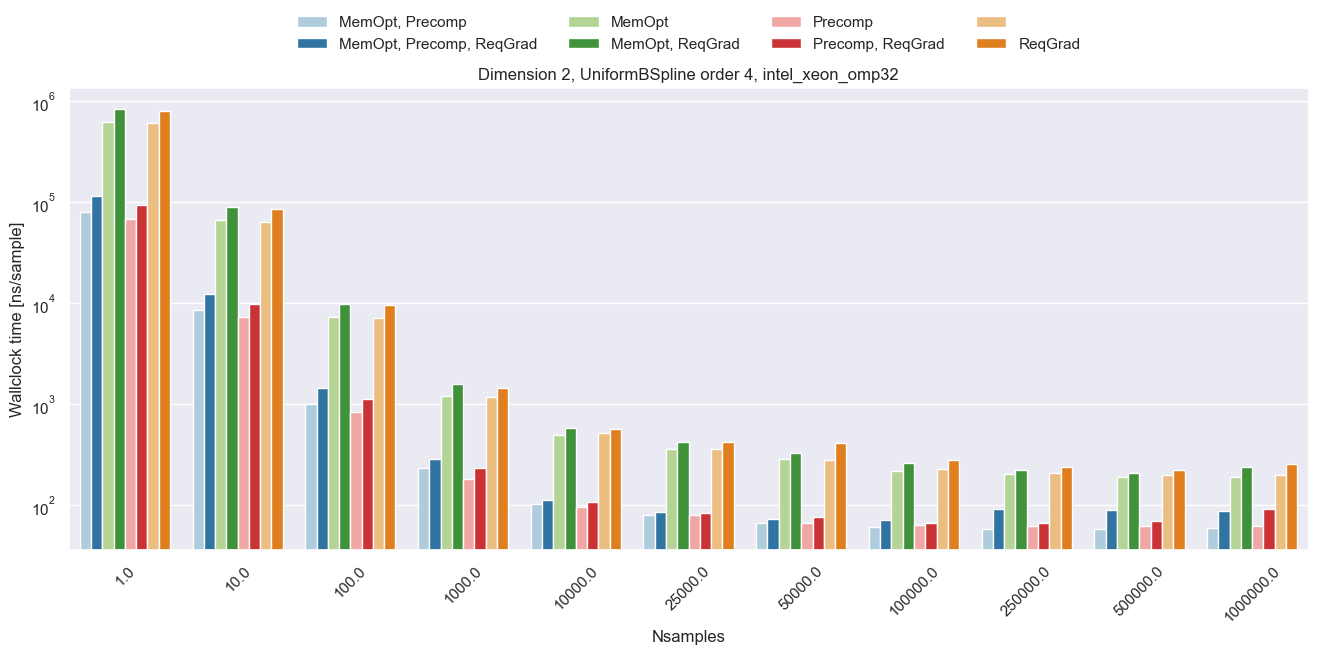

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

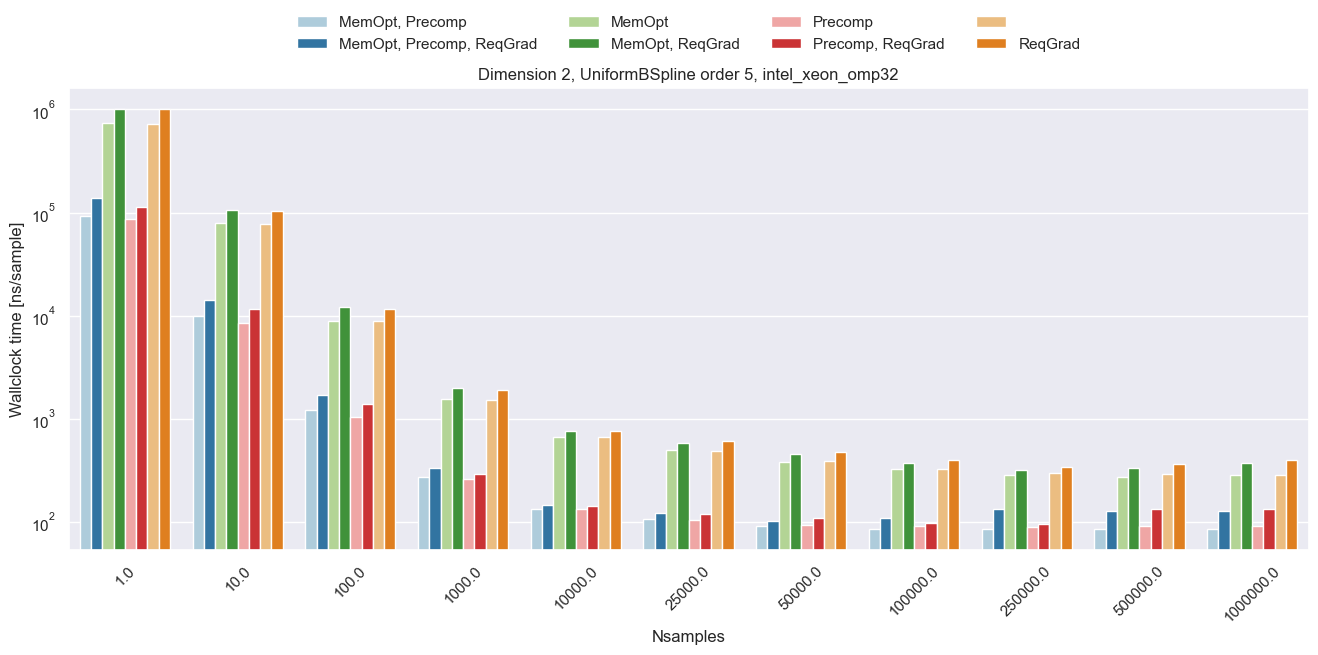

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

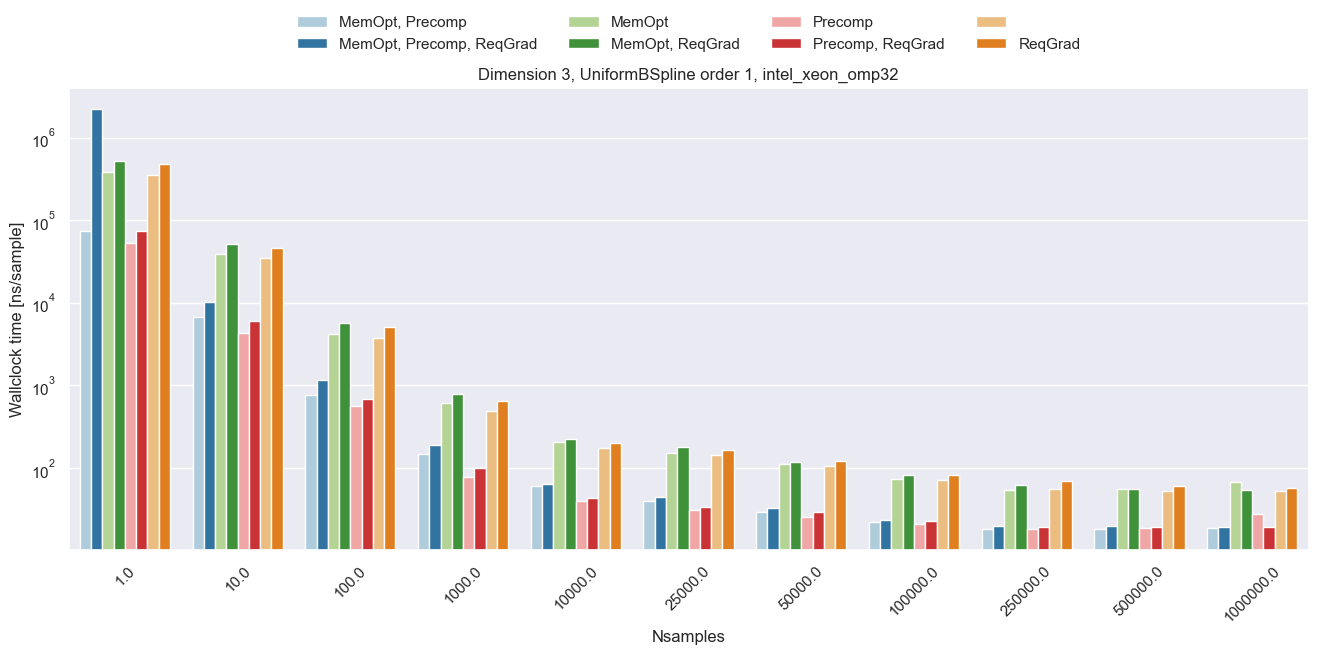

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

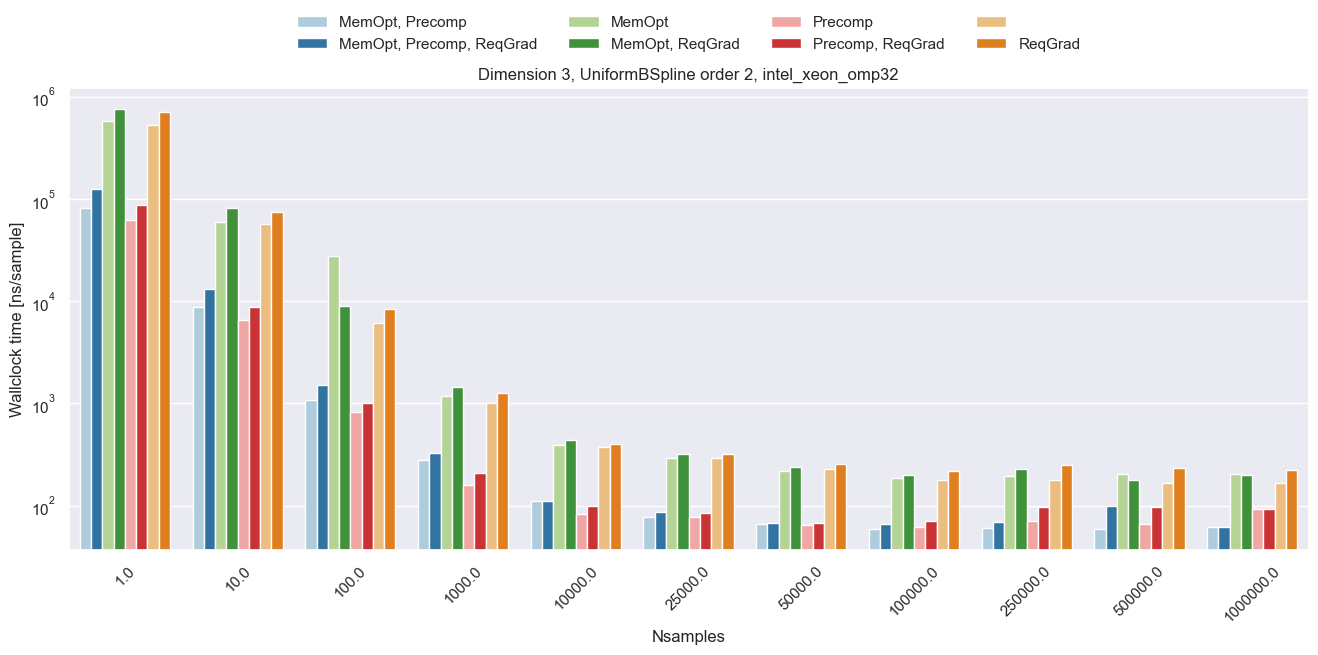

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

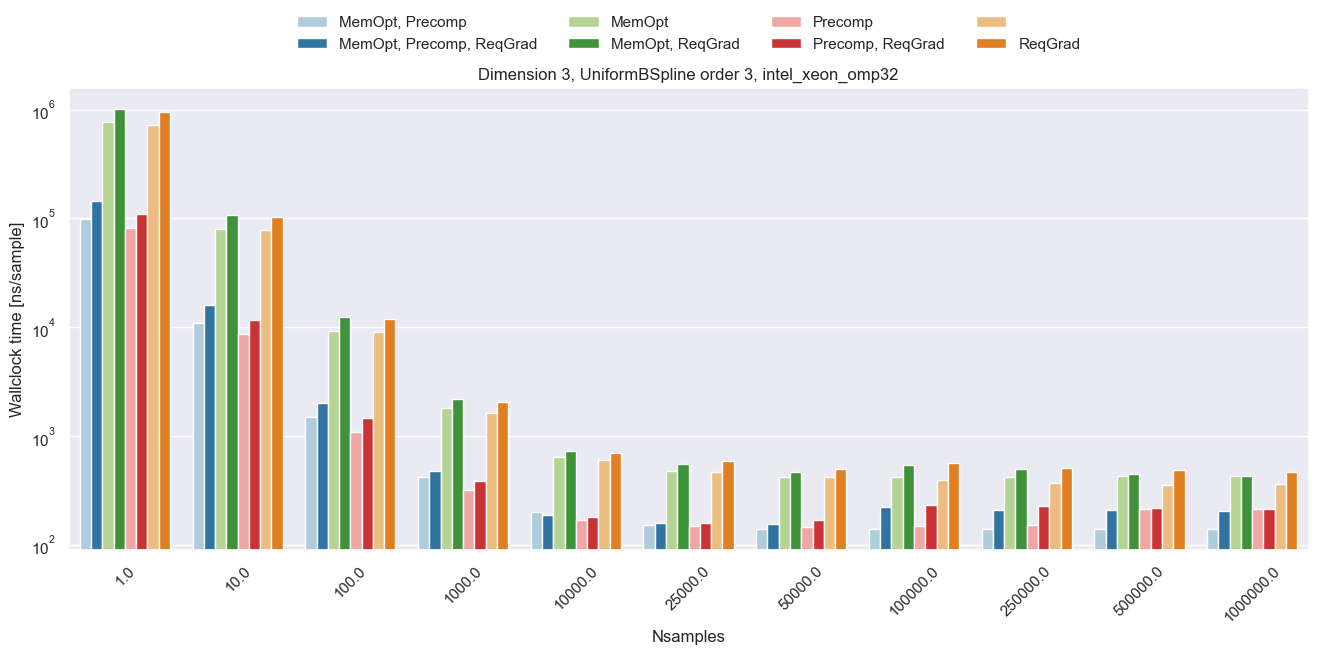

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

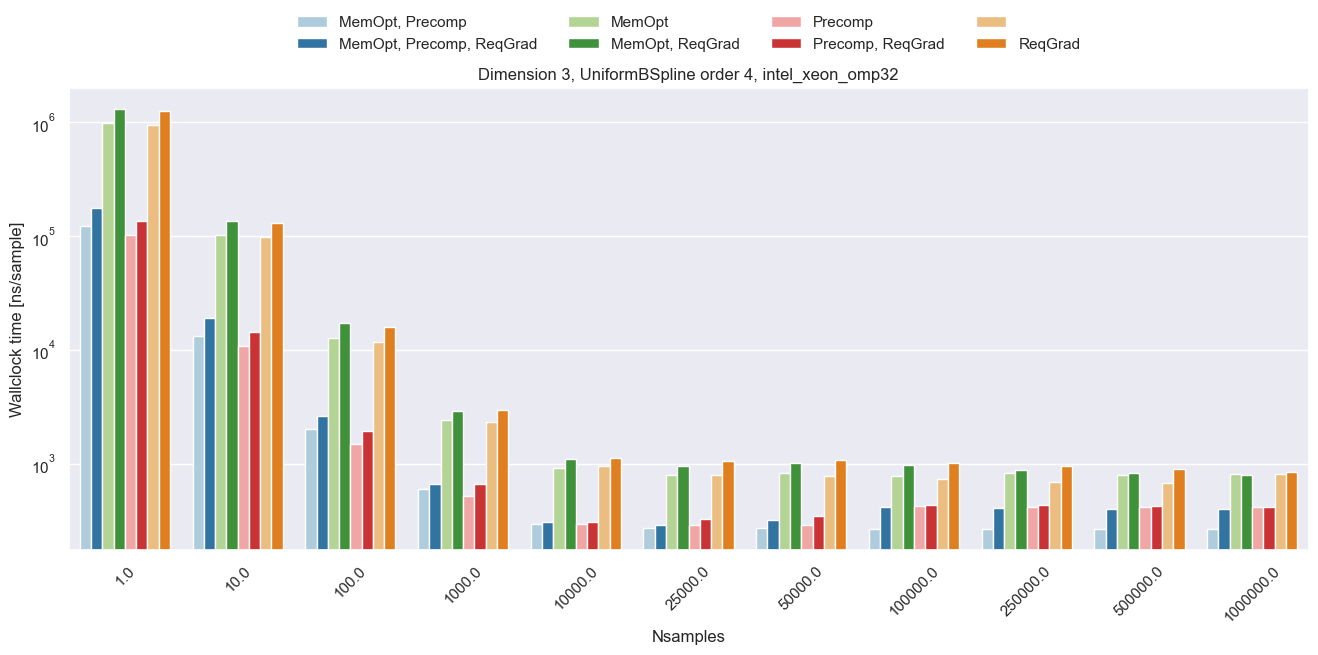

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

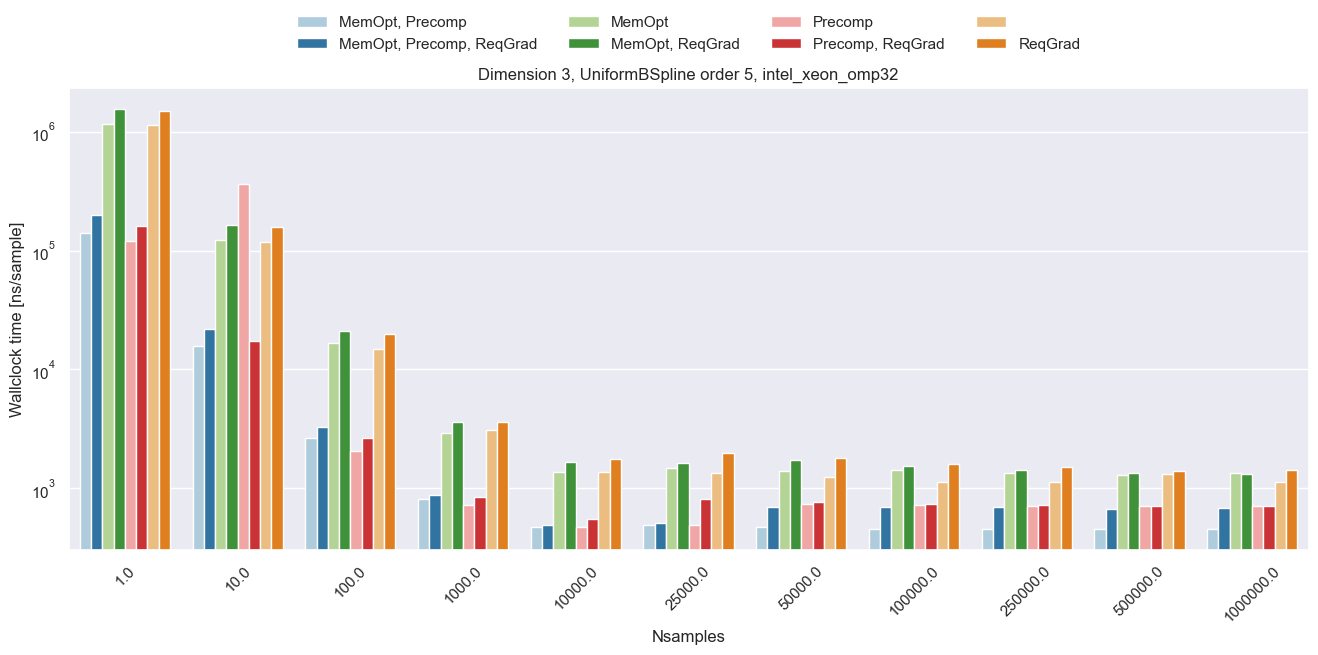

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

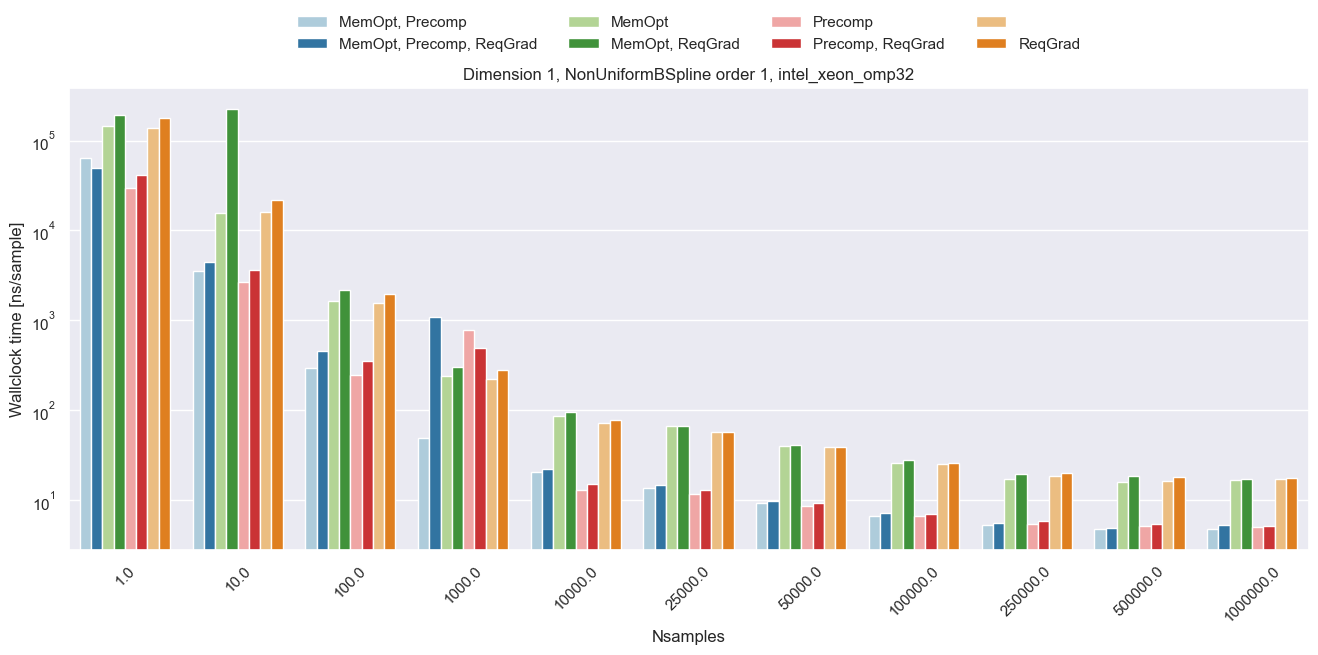

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

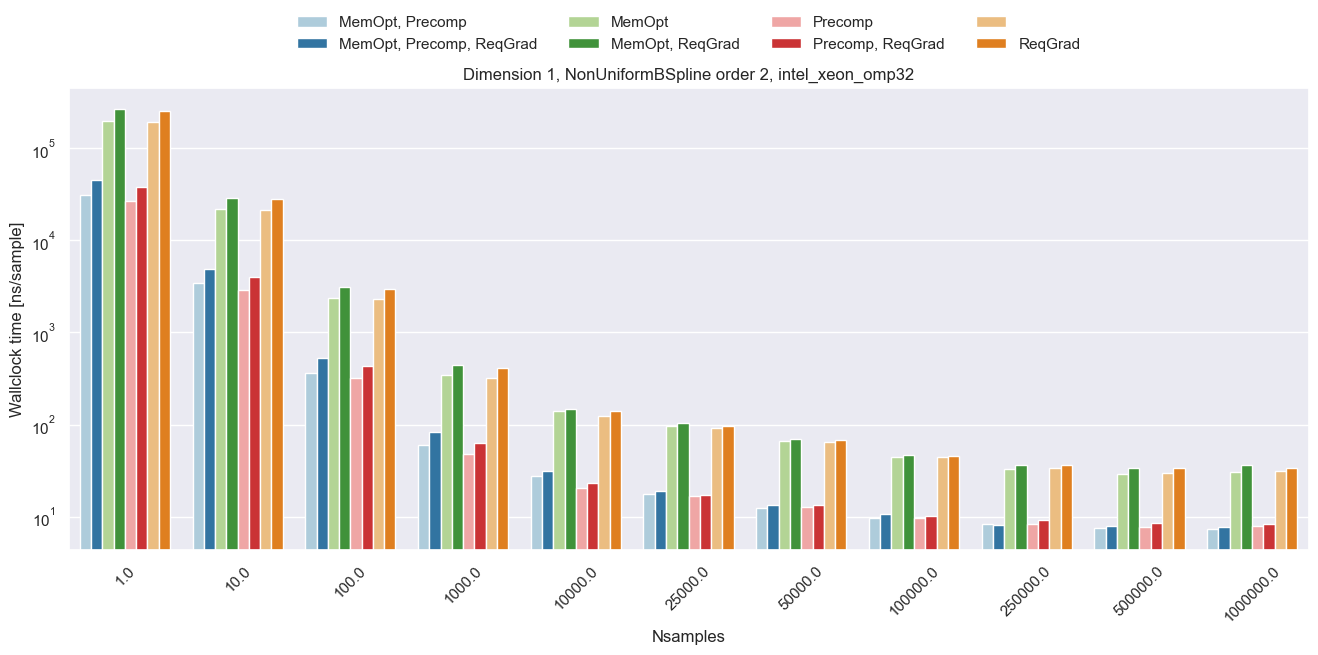

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

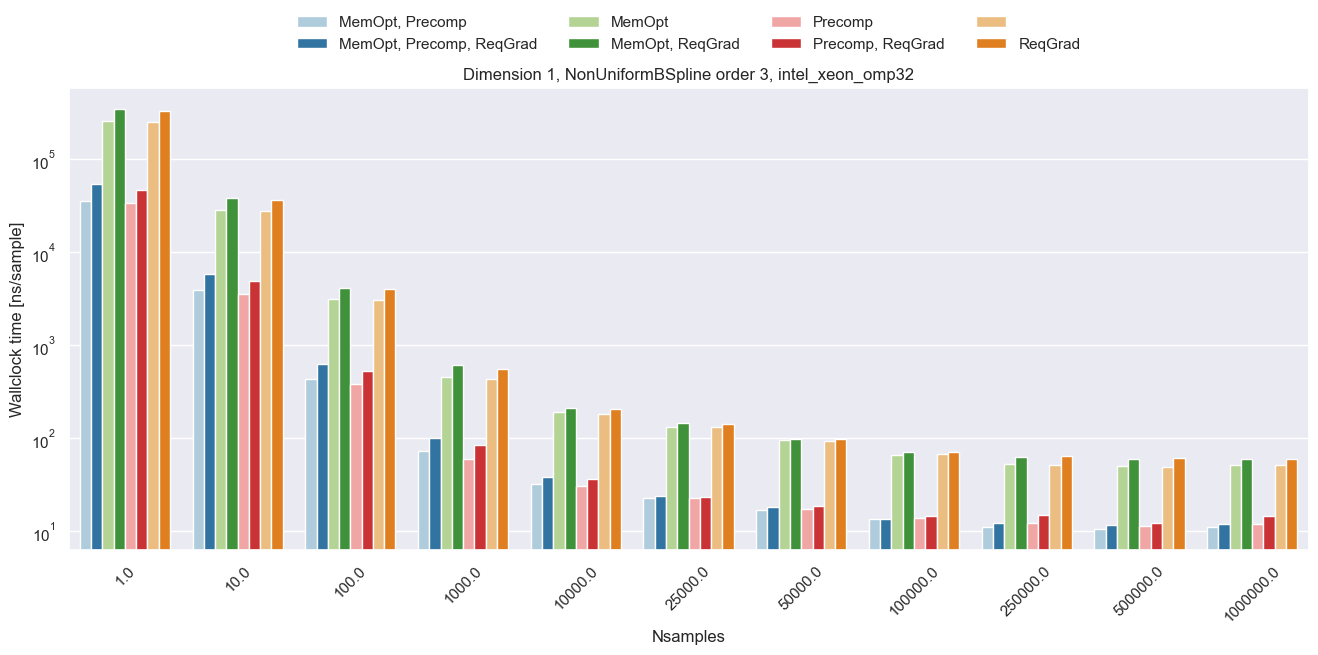

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

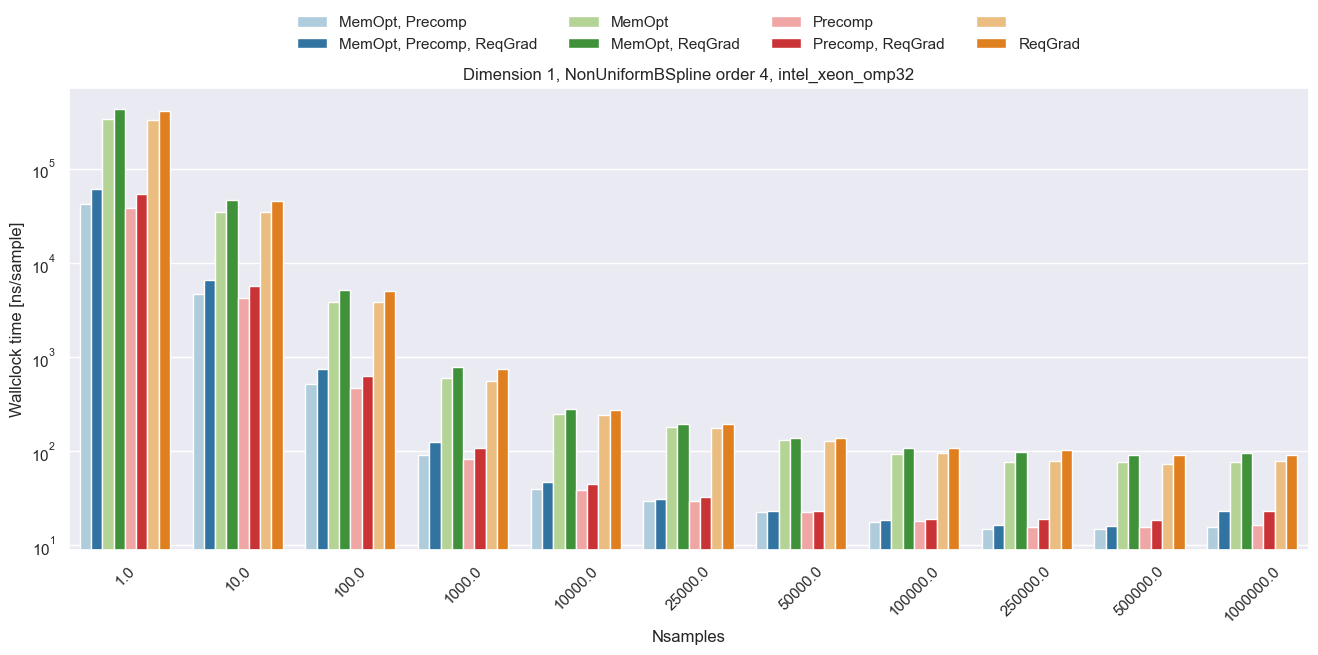

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

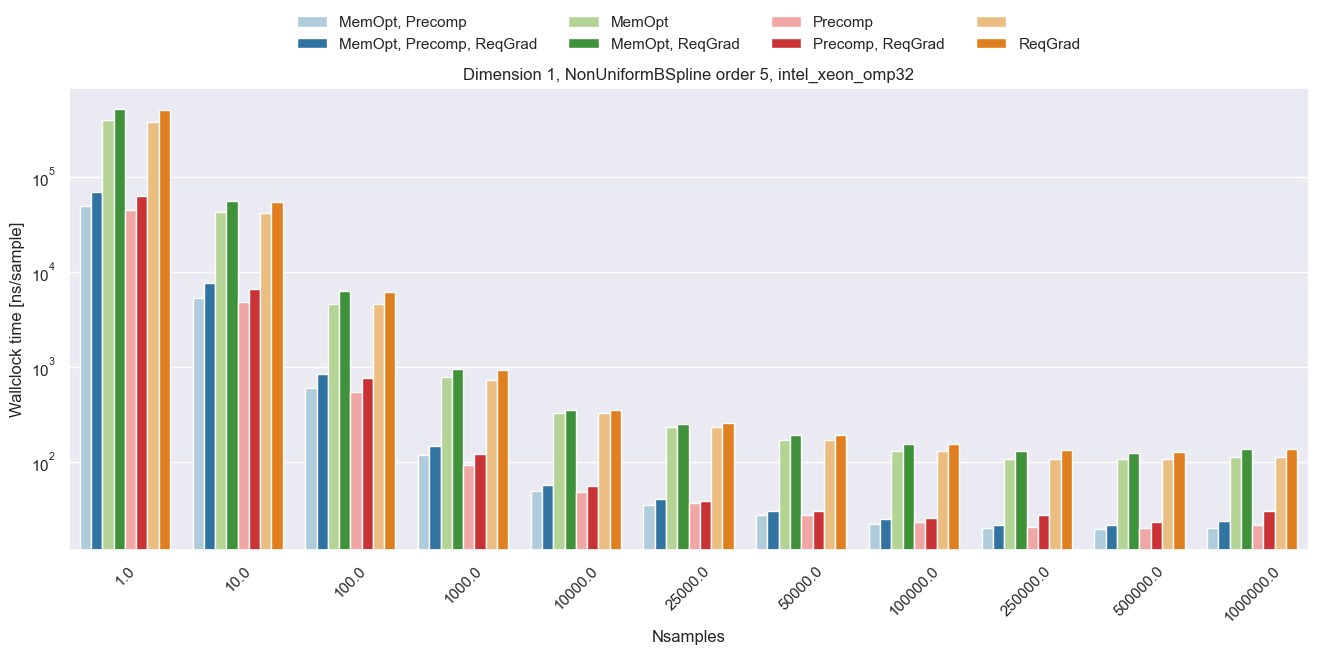

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

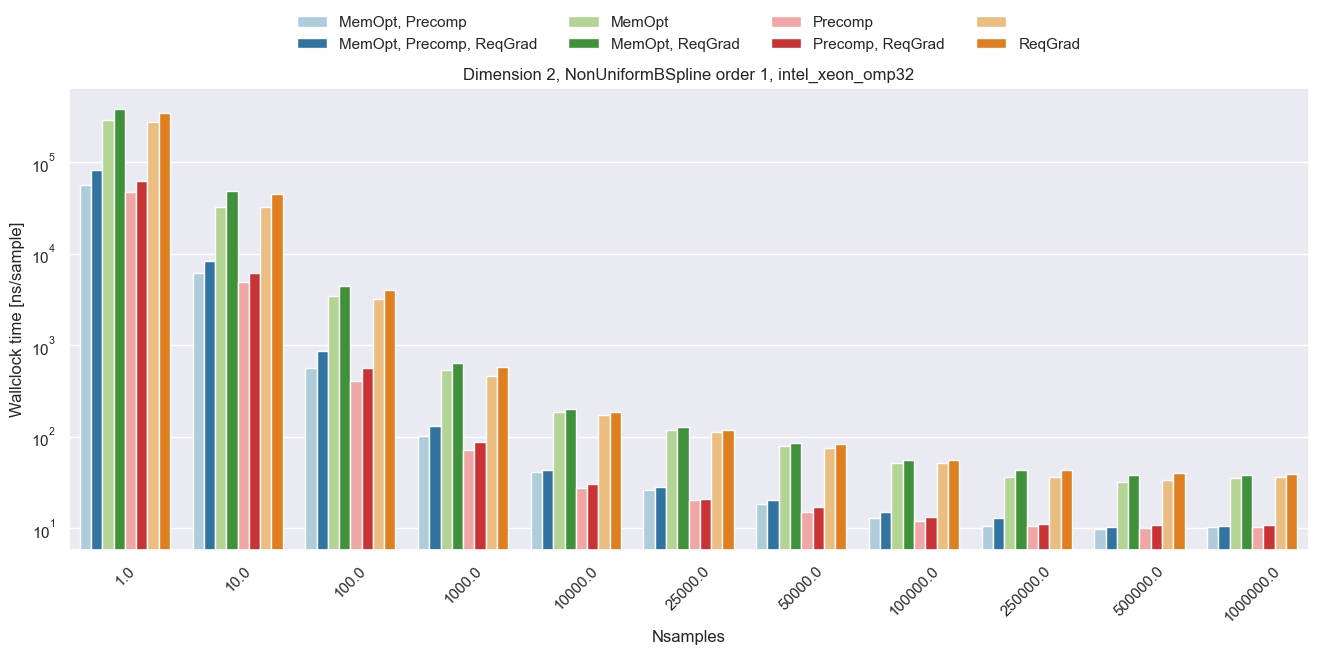

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

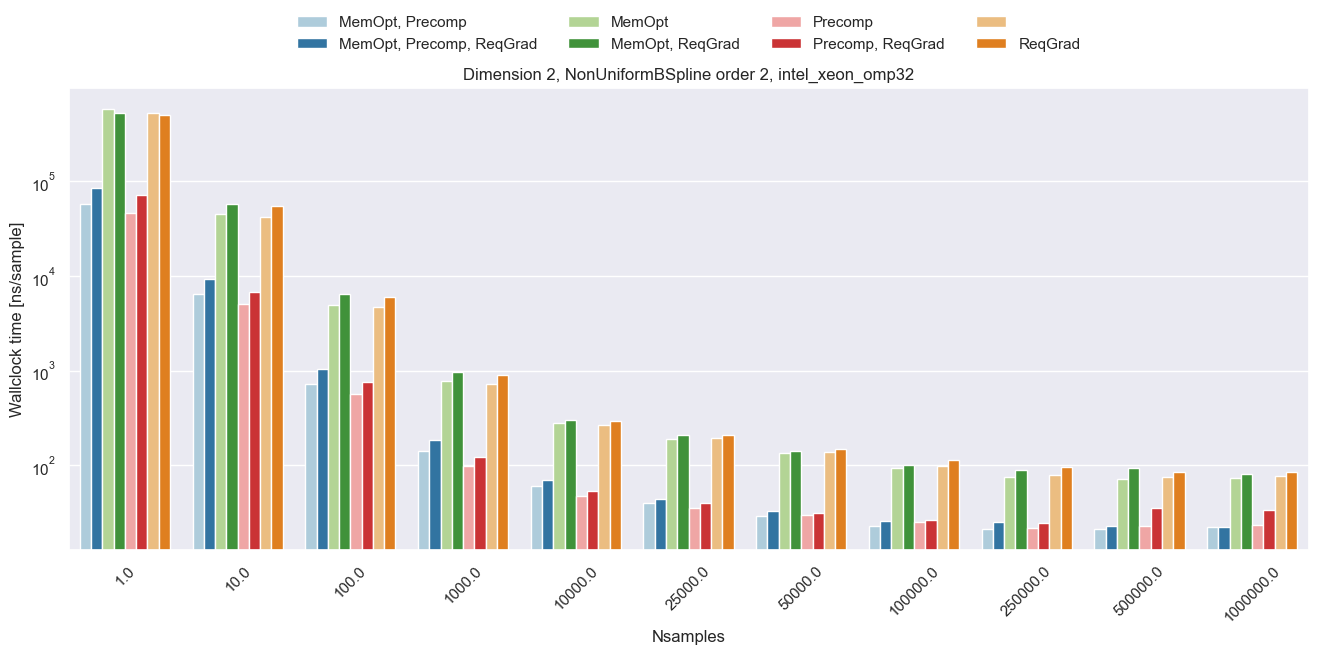

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

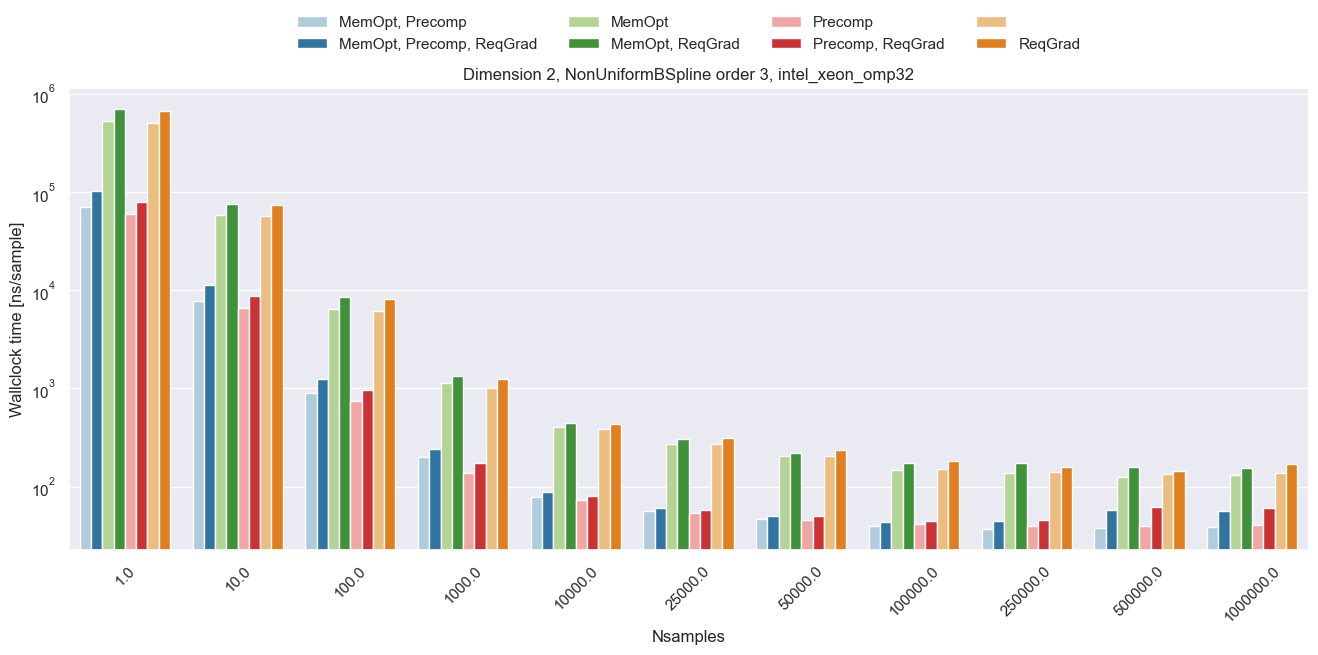

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

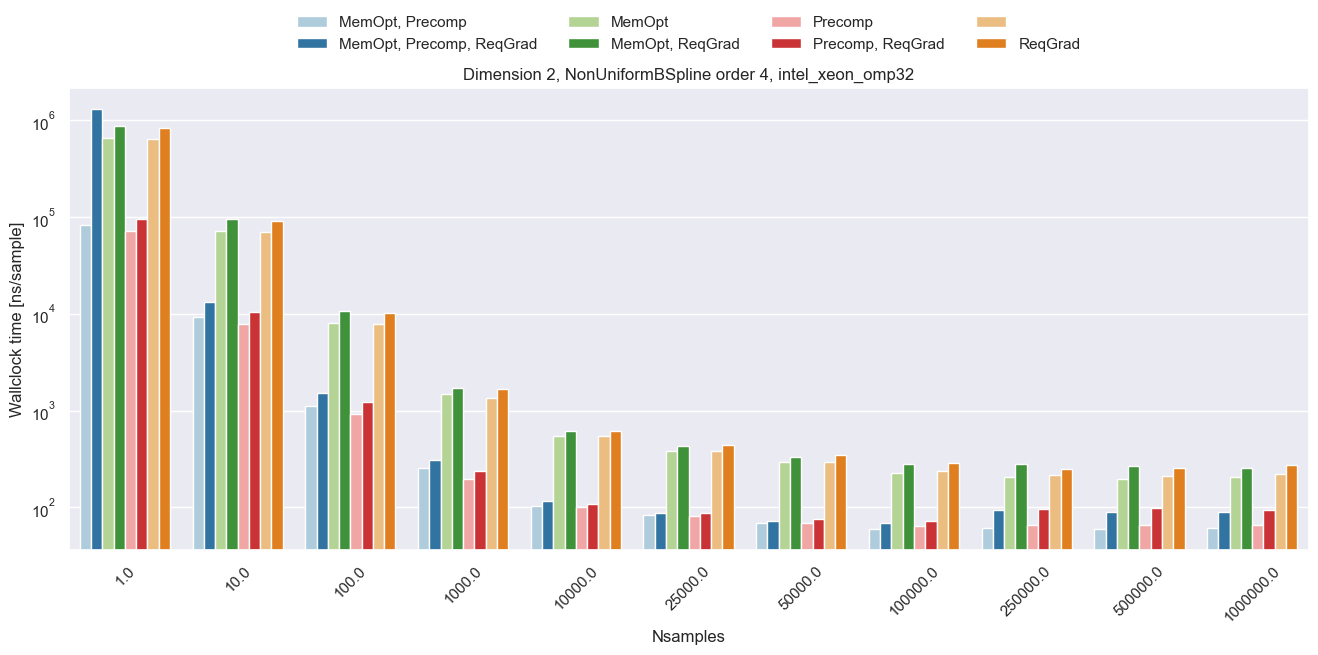

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

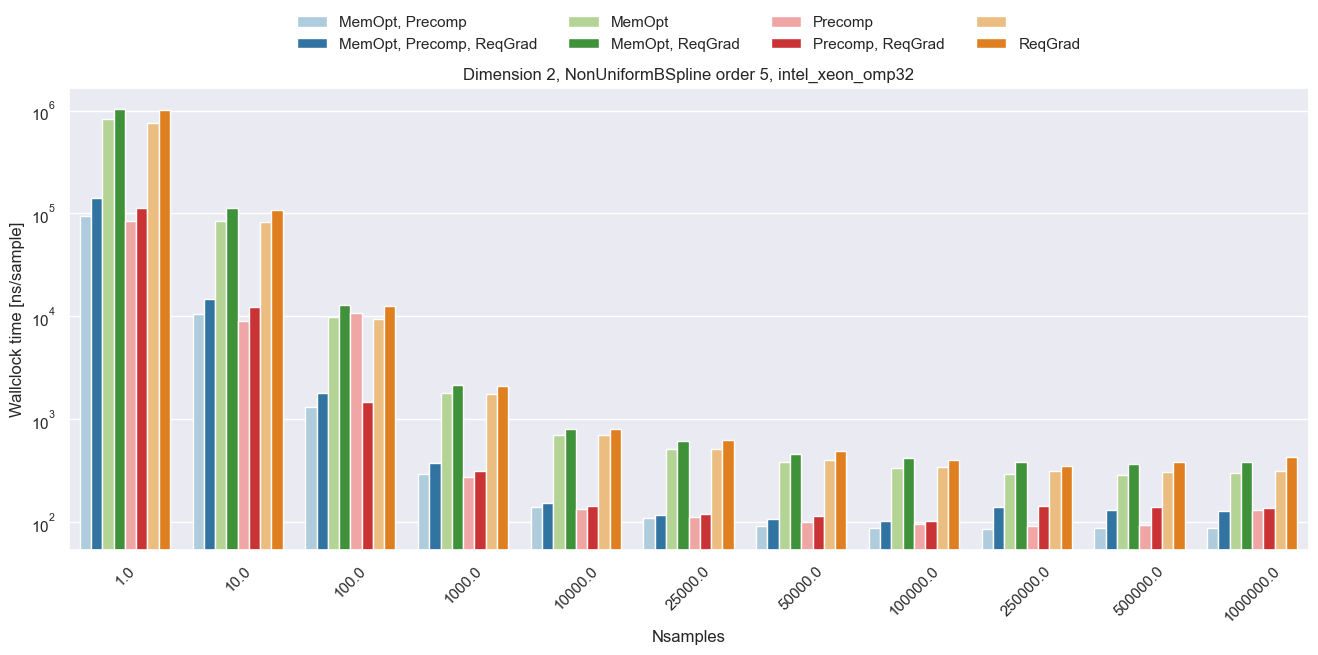

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

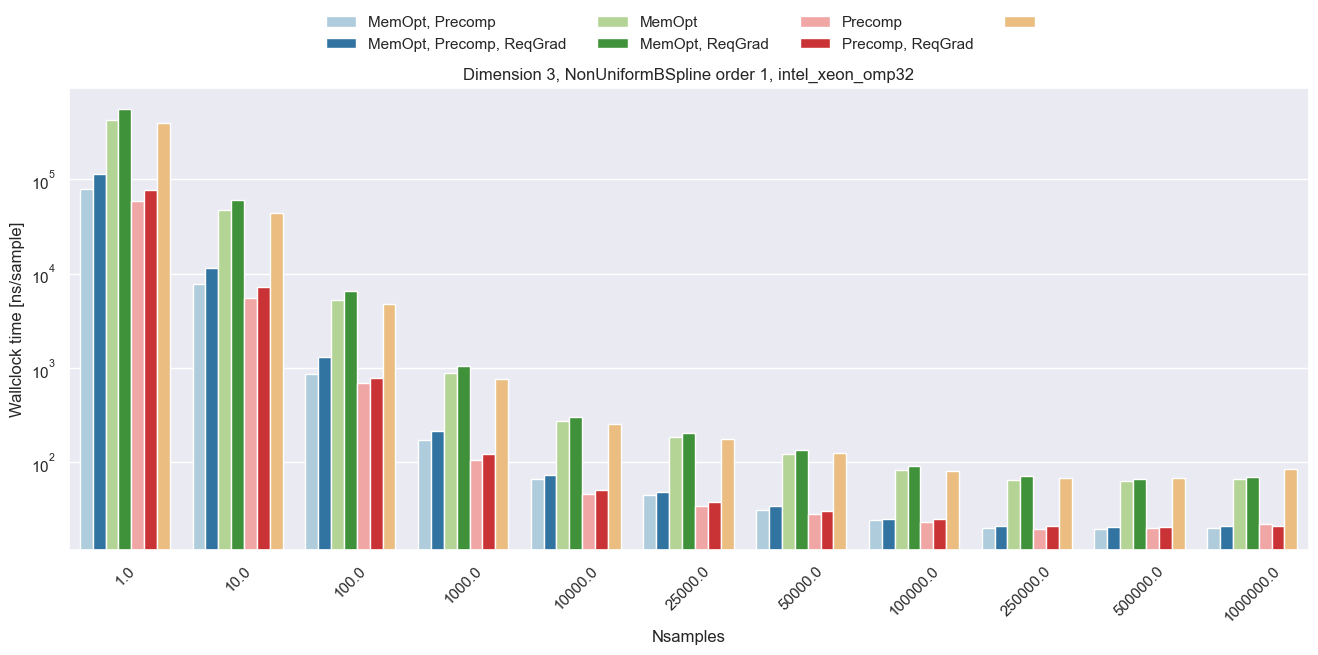

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

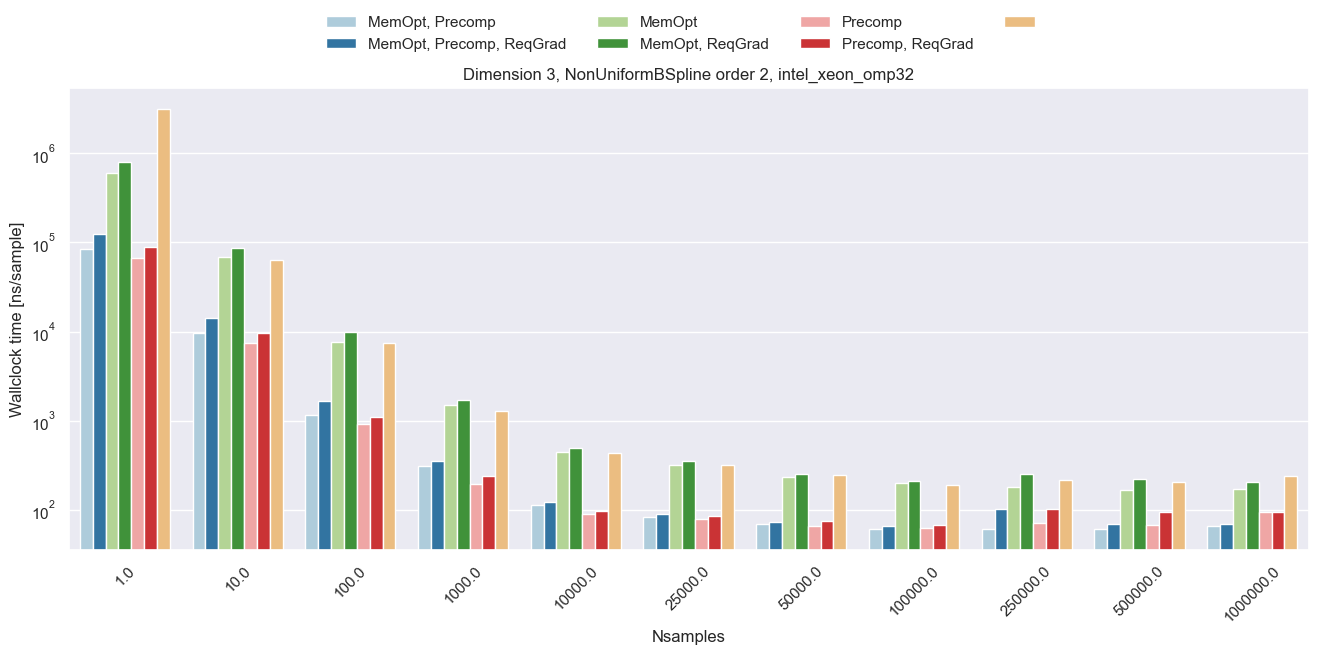

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

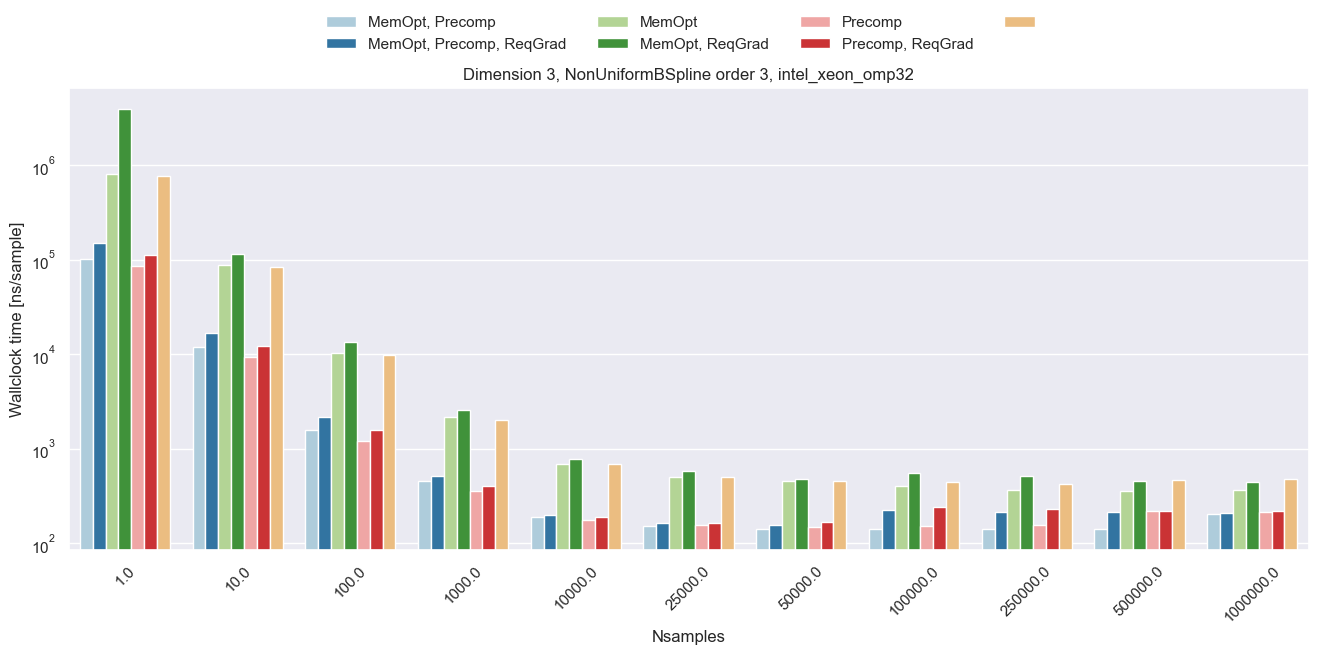

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

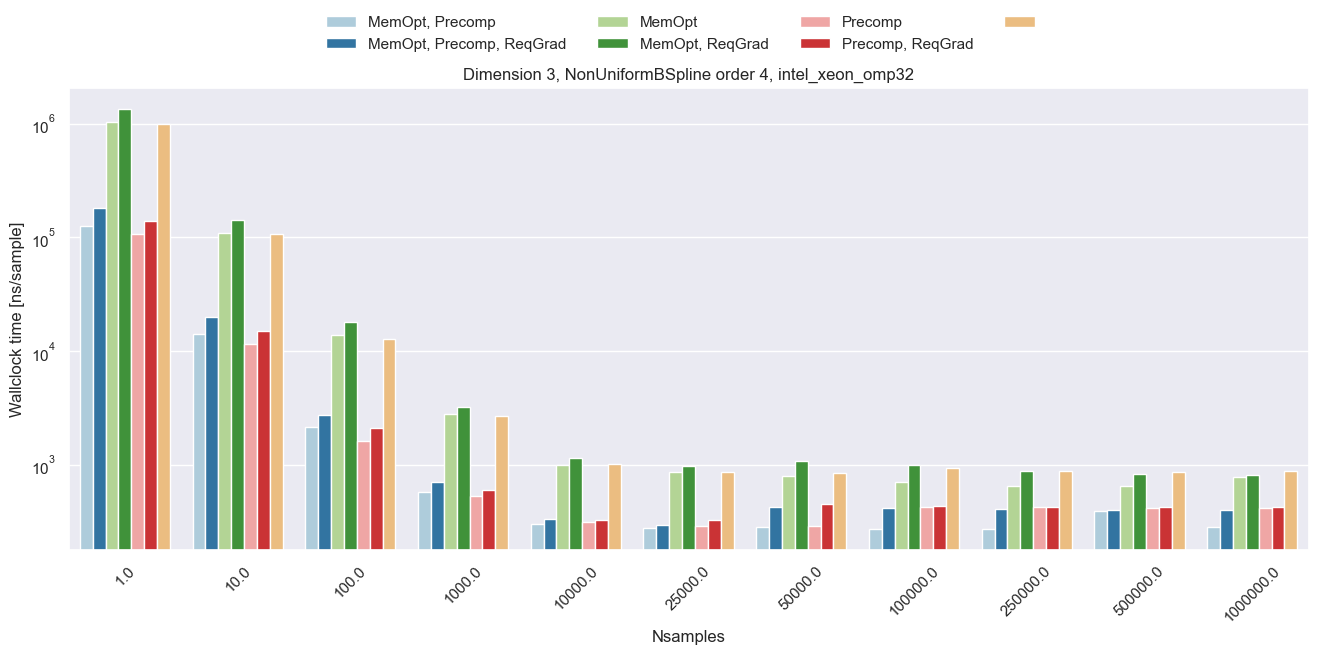

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Hue'] = pdf['Hue'].map(mapping)
/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3981760033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of tick

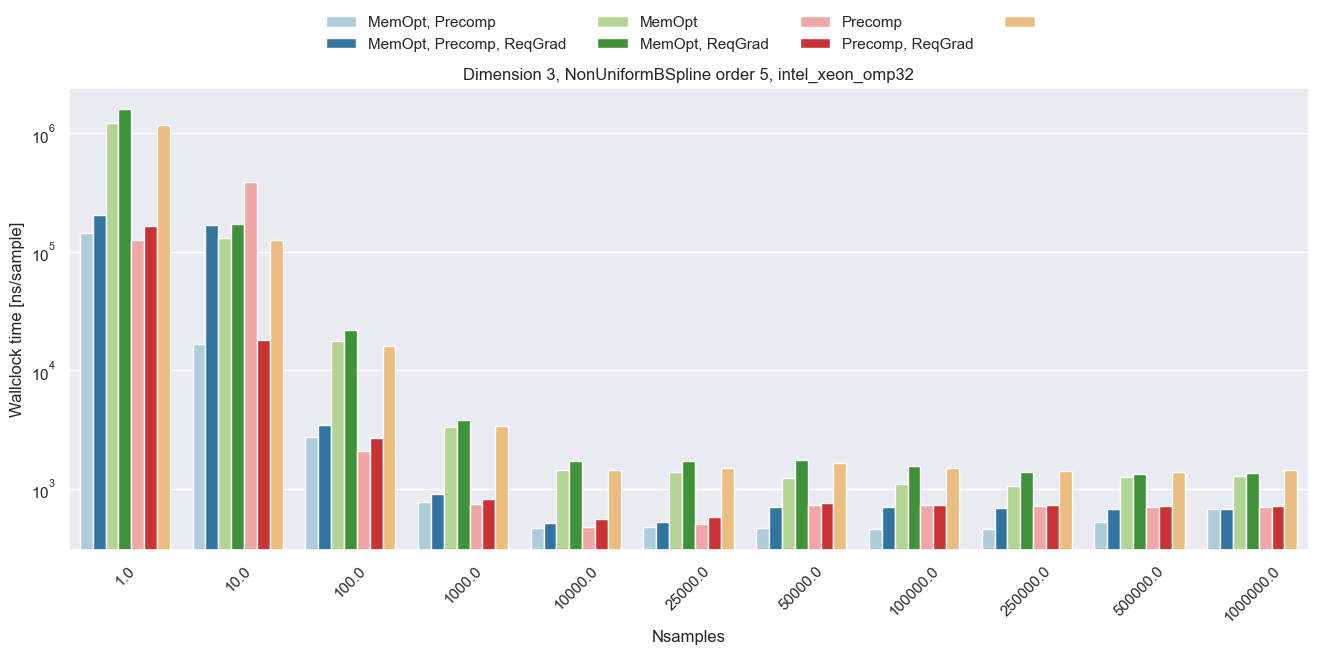

In [9]:
for device in 'amd_epyc_omp32', 'intel_xeon_omp32': #'amd_mi210', 'nvidia_a100', 'nvidia_h100', 'nvidia_gh200':
    for spline in 'UniformBSpline', 'NonUniformBSpline':
        for dim in range(1, 4):
            for p in range(1, 6):
                plt.figure(figsize=(16, 6))
                pdf = df[(df['Dimension'] == dim) & \
                         (df['SplineType'] == spline) & \
                         (df['Device'] == device)]
                pdf['Hue'] = pdf['Memory Optimized'].astype(str) + ', ' \
                           + pdf['Precompute'].astype(str) + ', ' \
                           + pdf['Requires Grad'].astype(str)
                mapping = {
                    'True, True, True': 'MemOpt, Precomp, ReqGrad',
                    'True, True, False': 'MemOpt, Precomp',
                    'True, False, True': 'MemOpt, ReqGrad',
                    'True, False, False': 'MemOpt',
                    'False, True, True': 'Precomp, ReqGrad',
                    'False, True, False': 'Precomp',
                    'False, False, True': 'ReqGrad',
                    'False, False, False': ' ',
                }
                pdf['Hue'] = pdf['Hue'].map(mapping)
                ax = sns.barplot(data=pdf, x='Nsamples', y=f'p={p}', hue='Hue', errorbar=None, palette='Paired')
                sns.move_legend(ax, "lower center",
                                bbox_to_anchor=(.5, 1.05), ncol=4, title=None, frameon=False)
                plt.yscale("log")
                ax.set_xticklabels(labels=df["Nsamples"], rotation=45)
                plt.ylabel('Wallclock time [ns/sample]')
                plt.title(f'Dimension {dim}, {spline} order {p}, {device}')
                plt.savefig(f'{device}_{spline}_dim{dim}_p{p}.pdf', format='pdf', bbox_inches='tight')
                plt.show()

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3963620041.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df["Nsamples"], rotation=45)


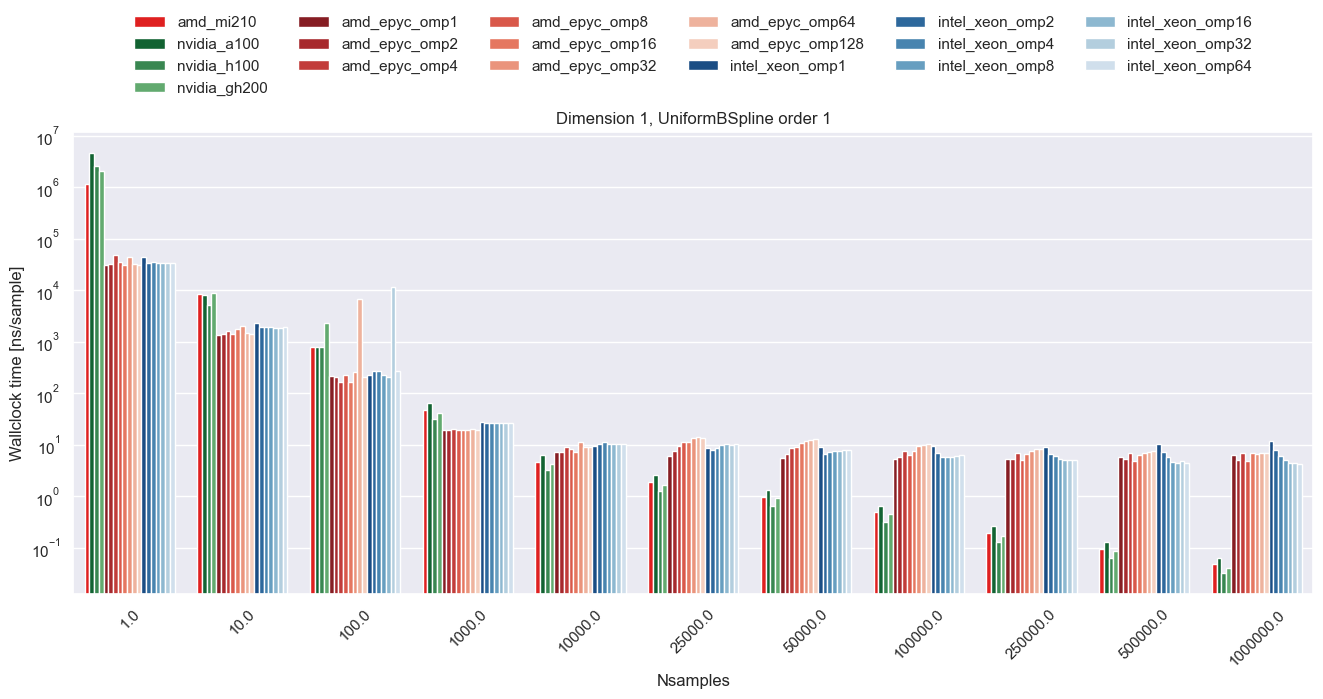

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3963620041.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df["Nsamples"], rotation=45)


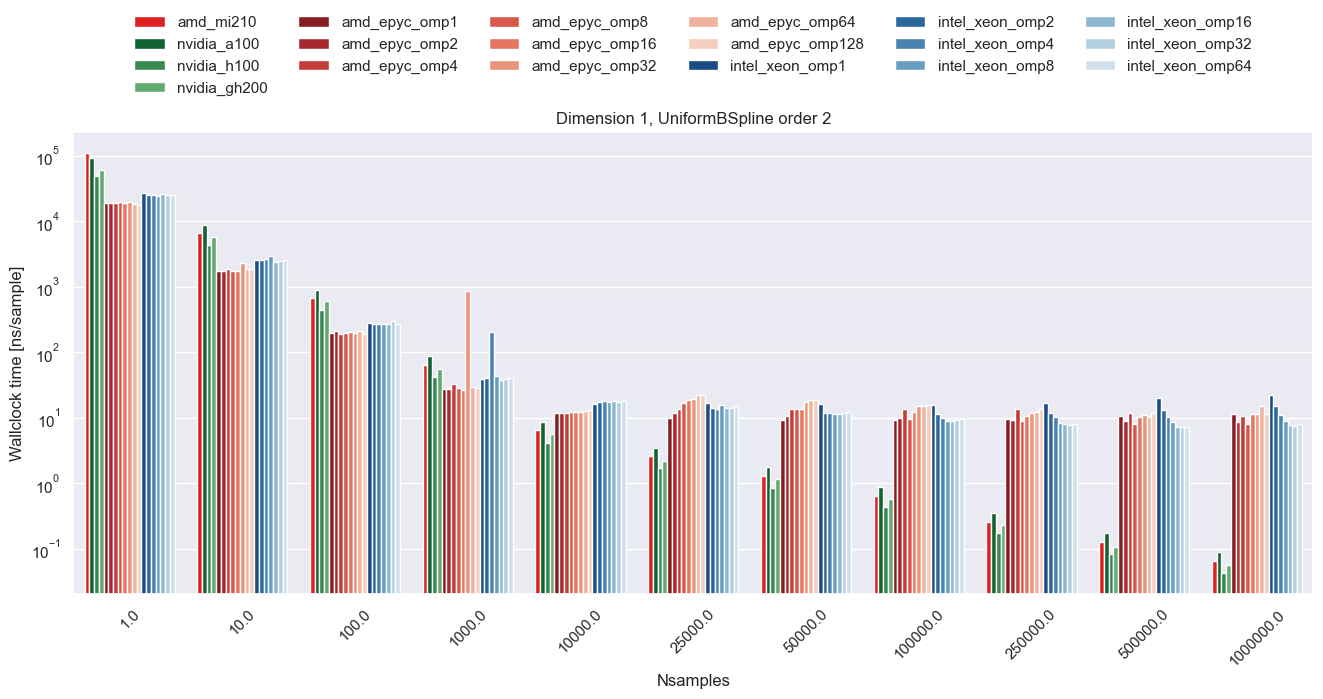

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3963620041.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df["Nsamples"], rotation=45)


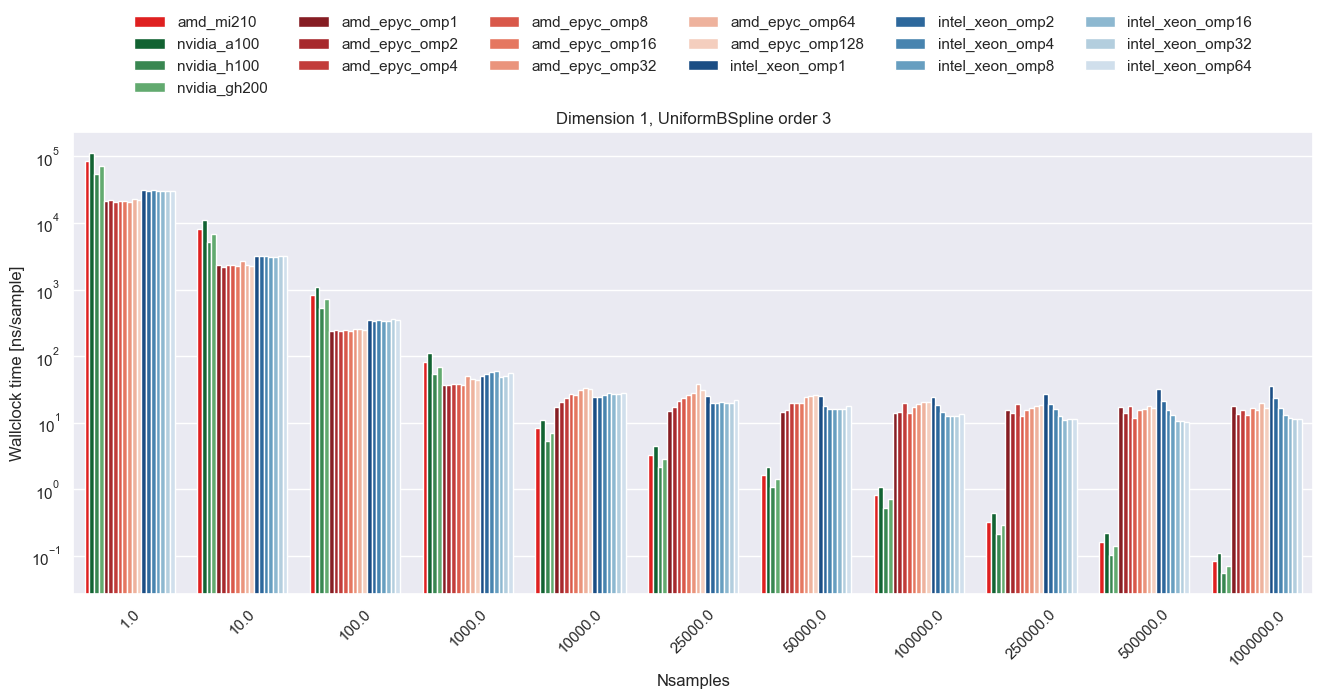

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3963620041.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df["Nsamples"], rotation=45)


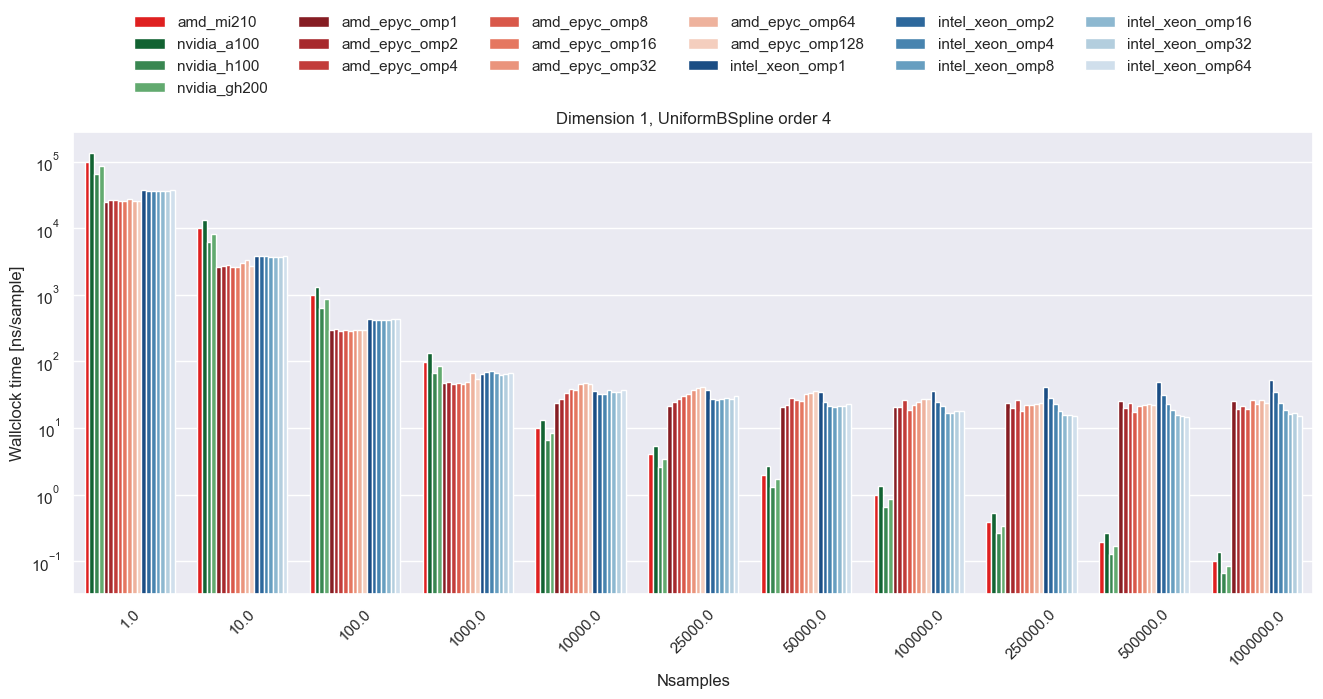

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3963620041.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df["Nsamples"], rotation=45)


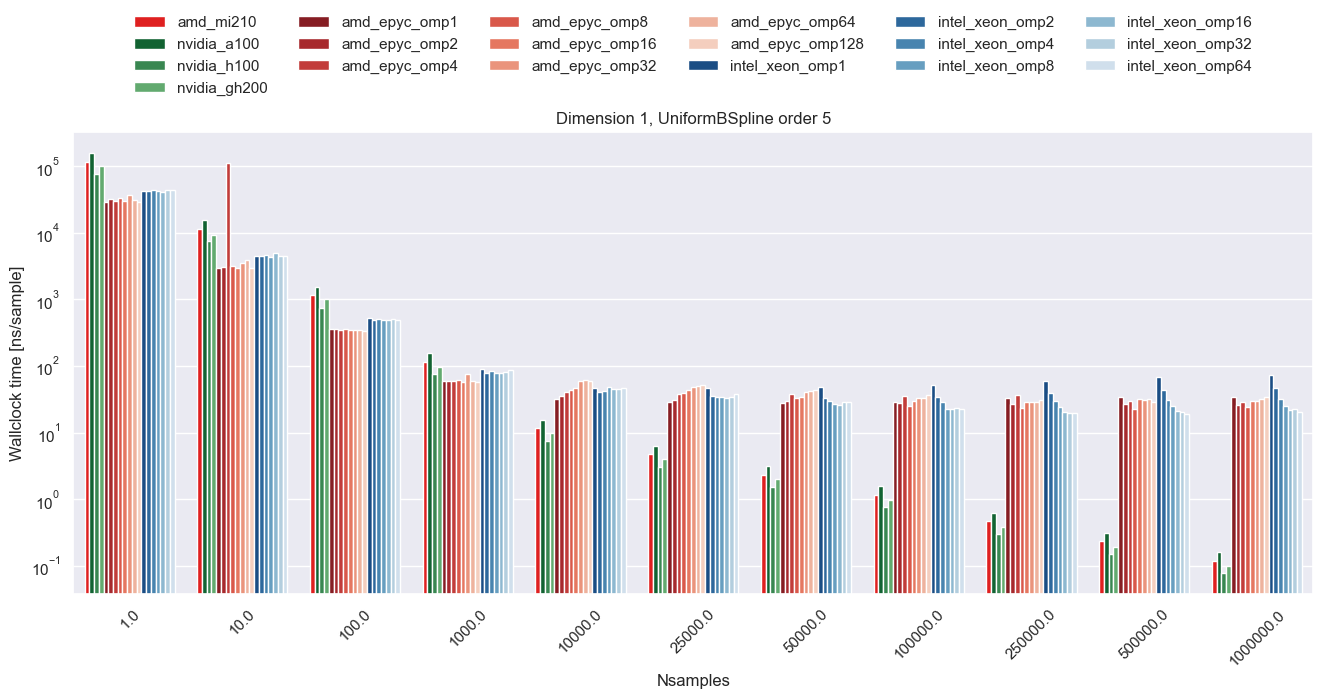

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3963620041.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df["Nsamples"], rotation=45)


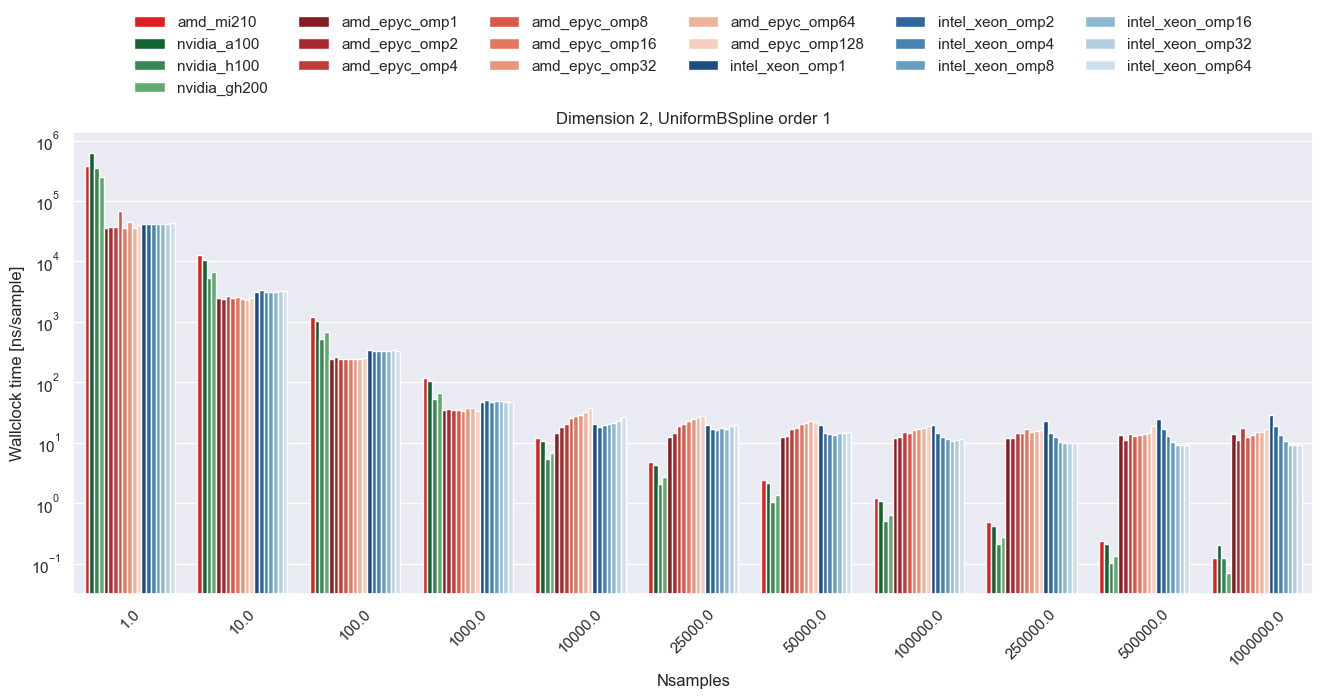

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3963620041.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df["Nsamples"], rotation=45)


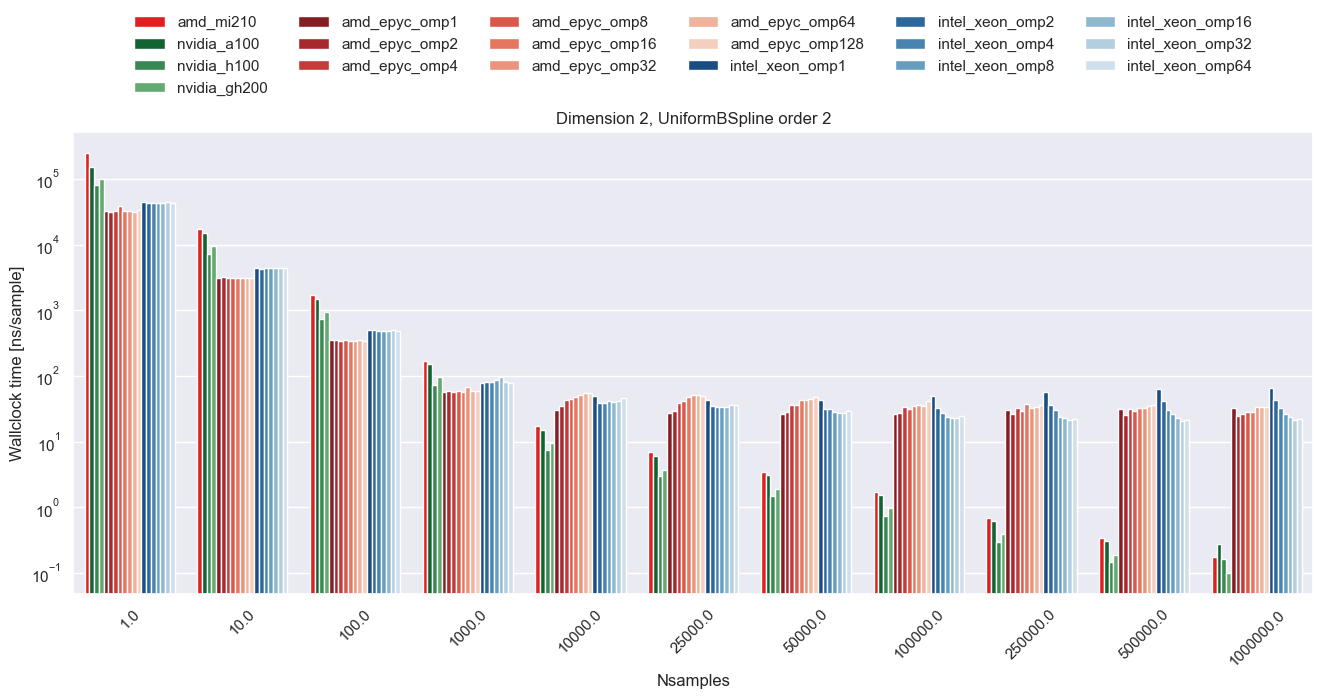

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3963620041.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df["Nsamples"], rotation=45)


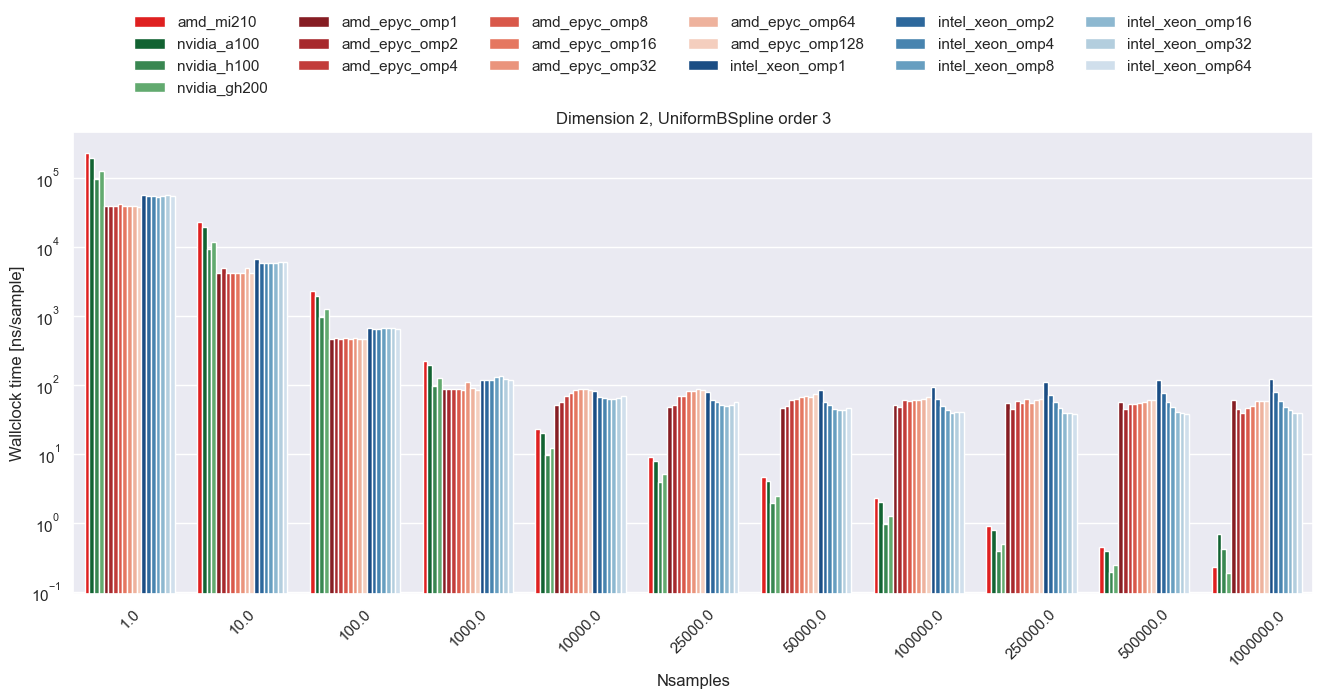

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3963620041.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df["Nsamples"], rotation=45)


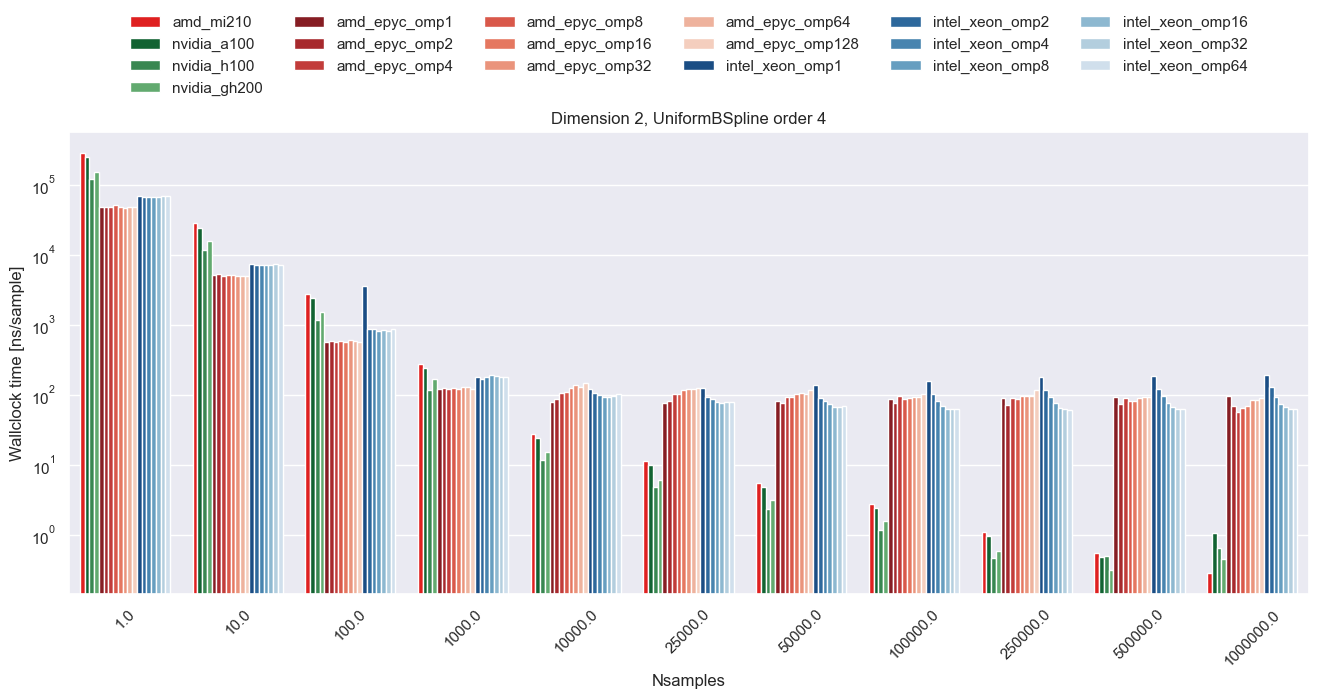

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3963620041.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df["Nsamples"], rotation=45)


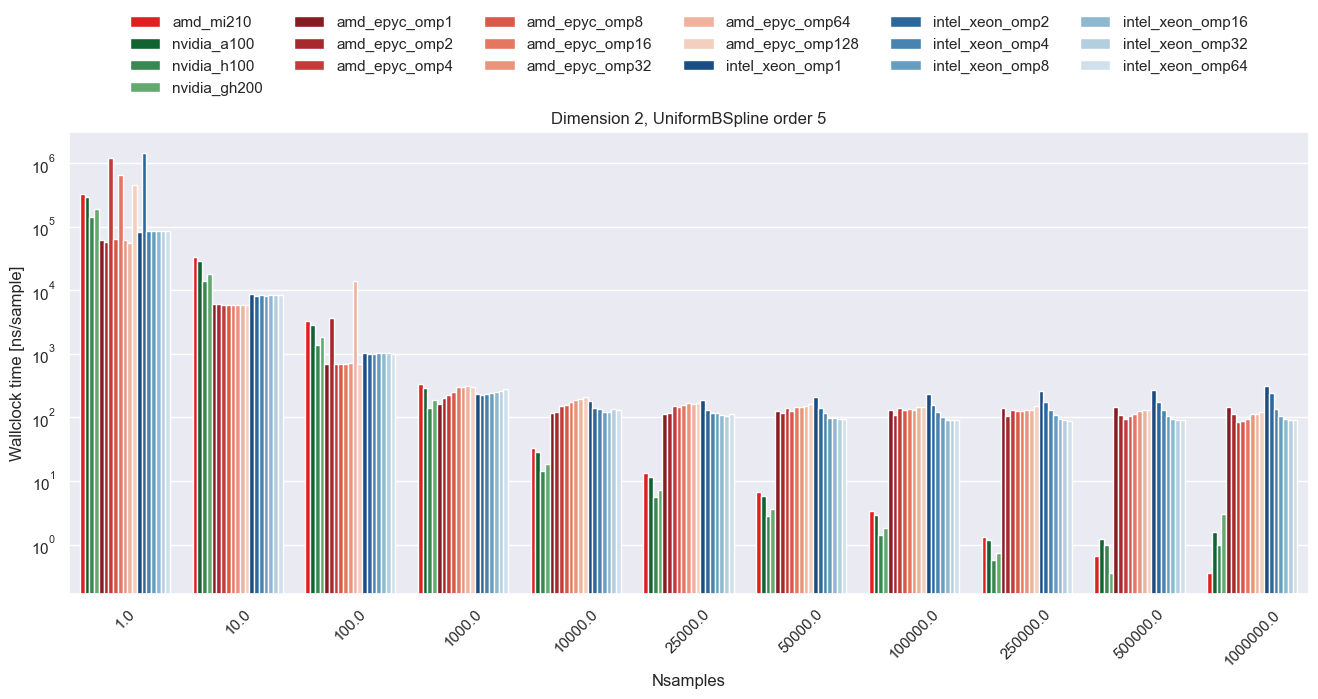

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3963620041.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df["Nsamples"], rotation=45)


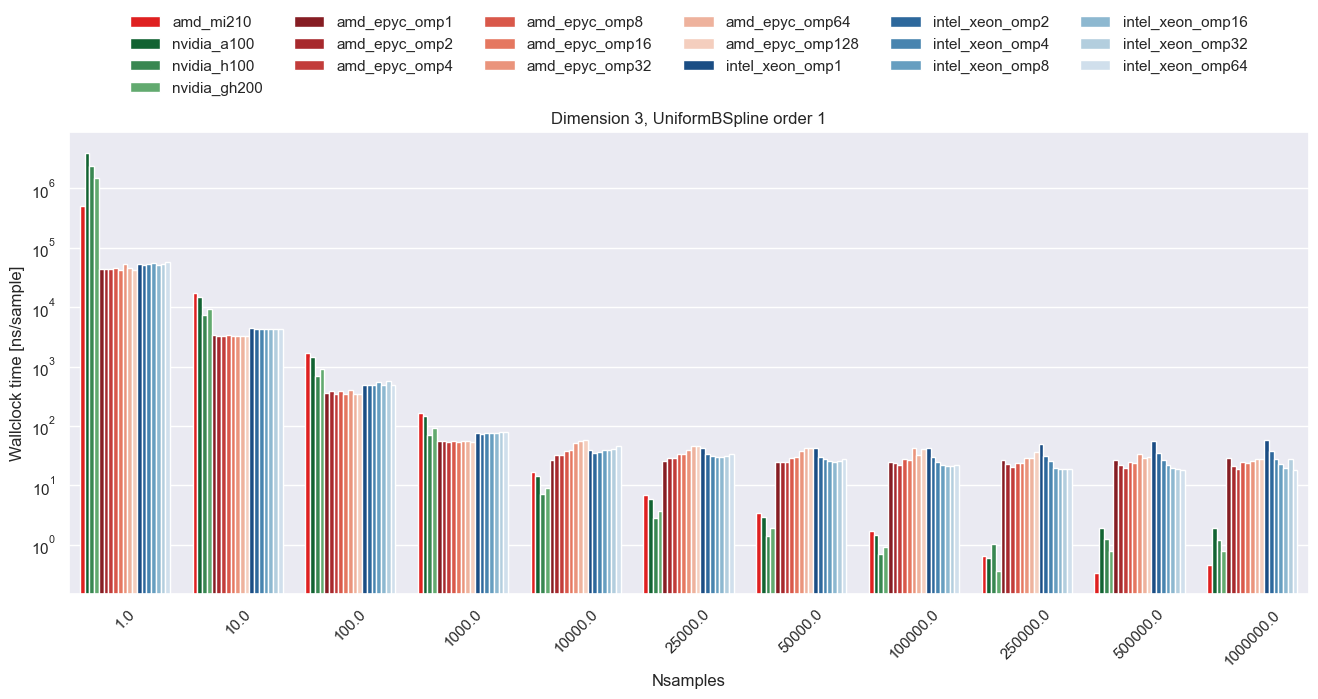

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3963620041.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df["Nsamples"], rotation=45)


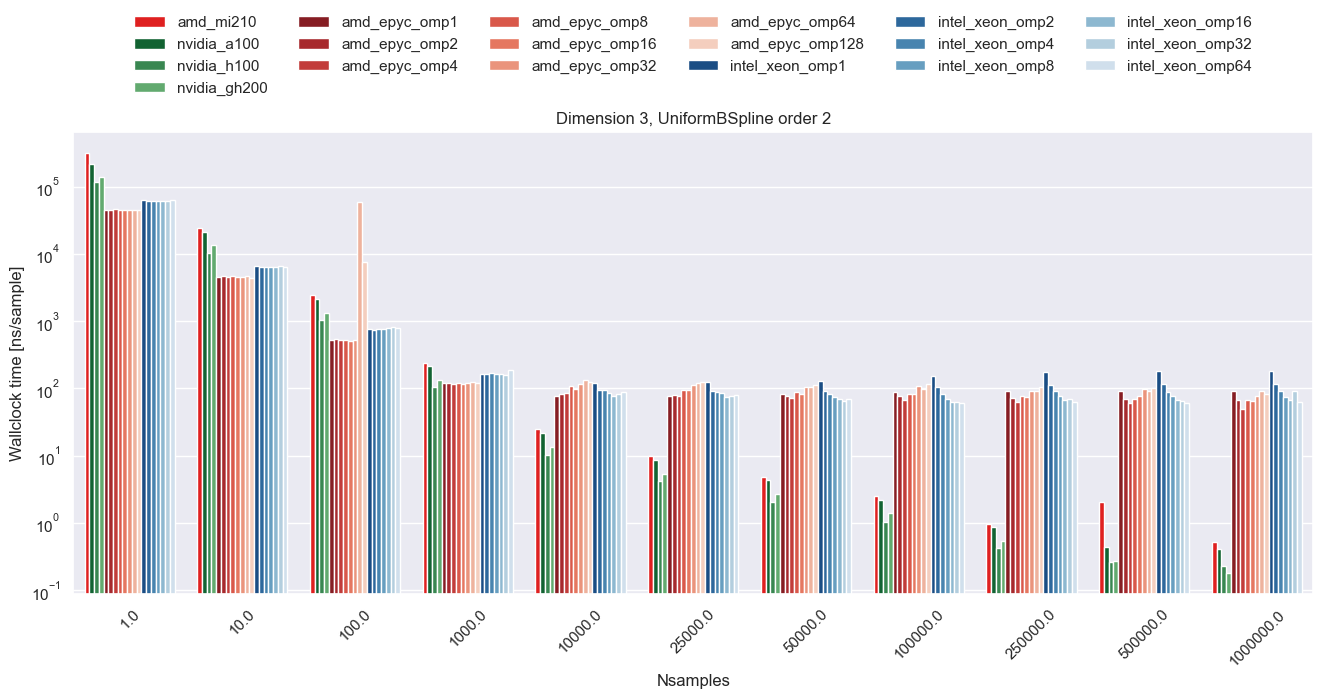

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3963620041.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df["Nsamples"], rotation=45)


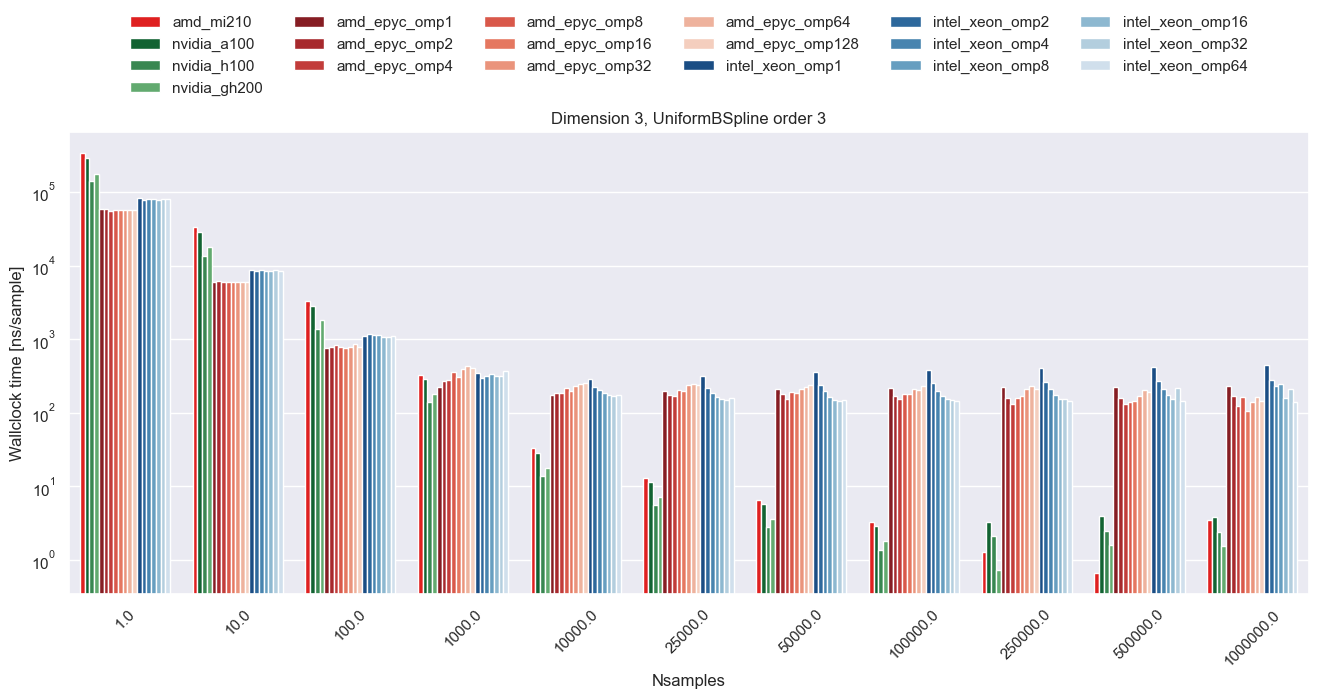

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3963620041.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df["Nsamples"], rotation=45)


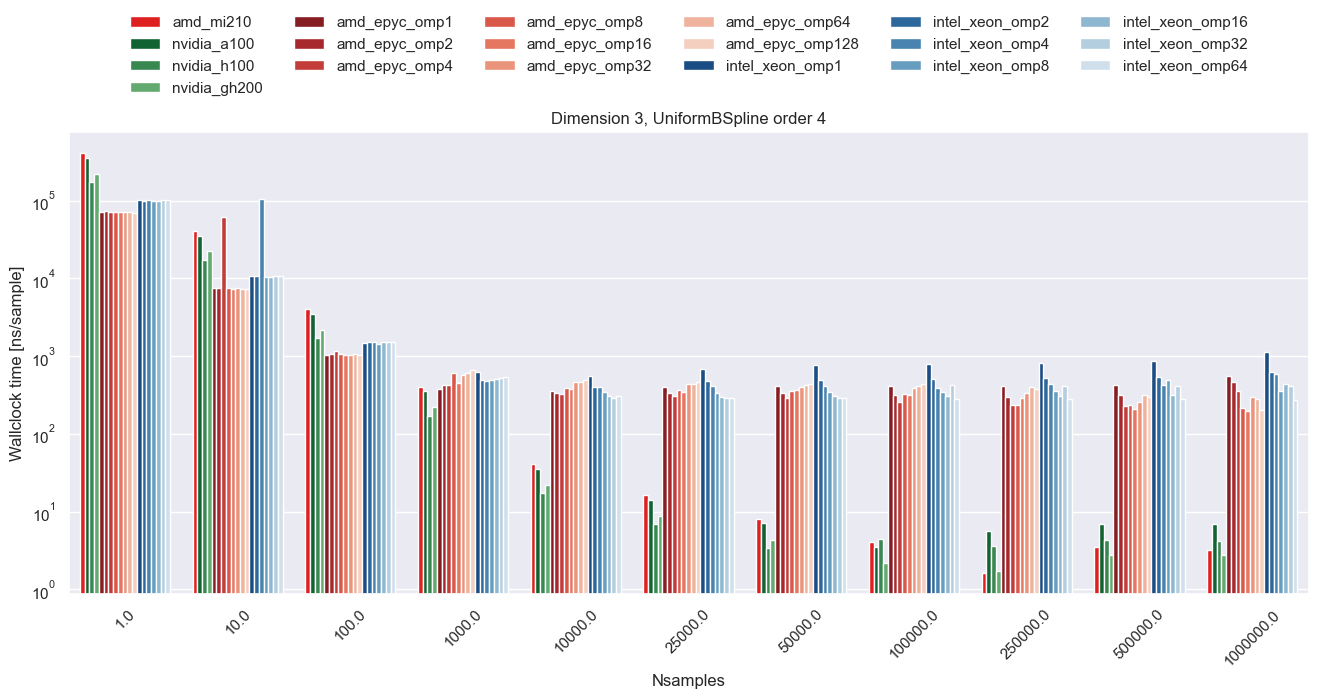

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3963620041.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df["Nsamples"], rotation=45)


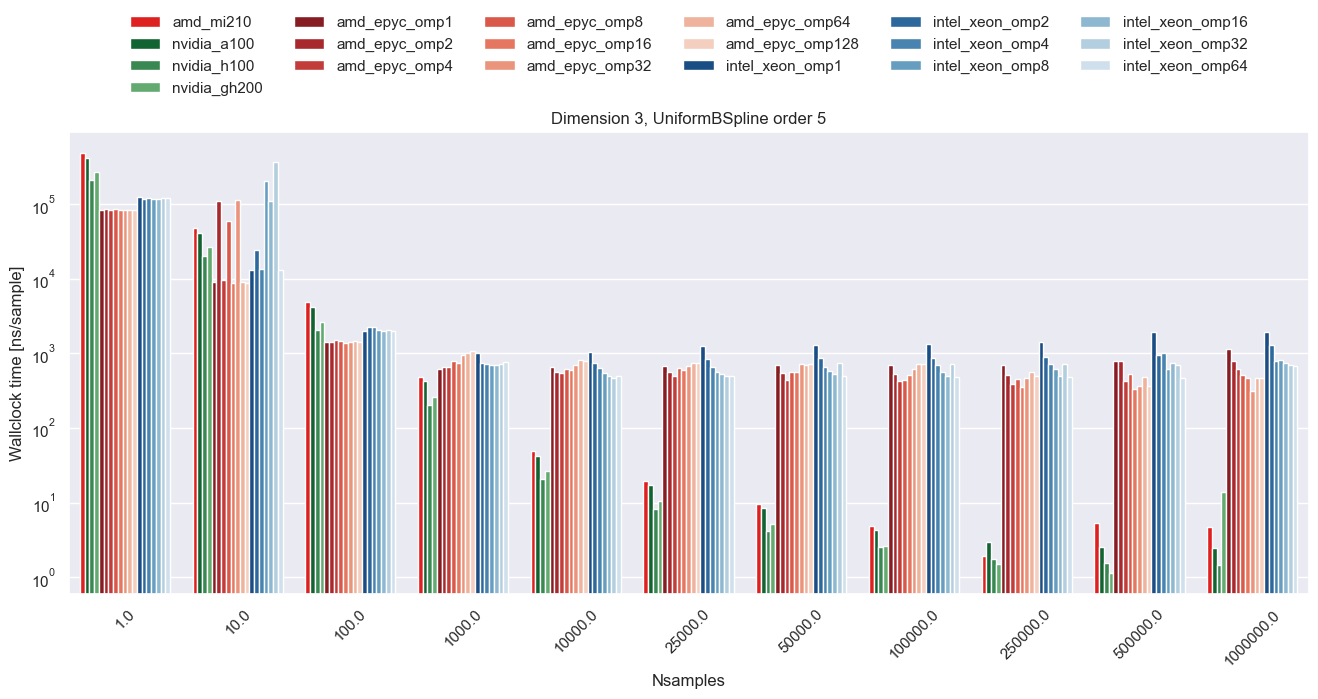

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3963620041.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df["Nsamples"], rotation=45)


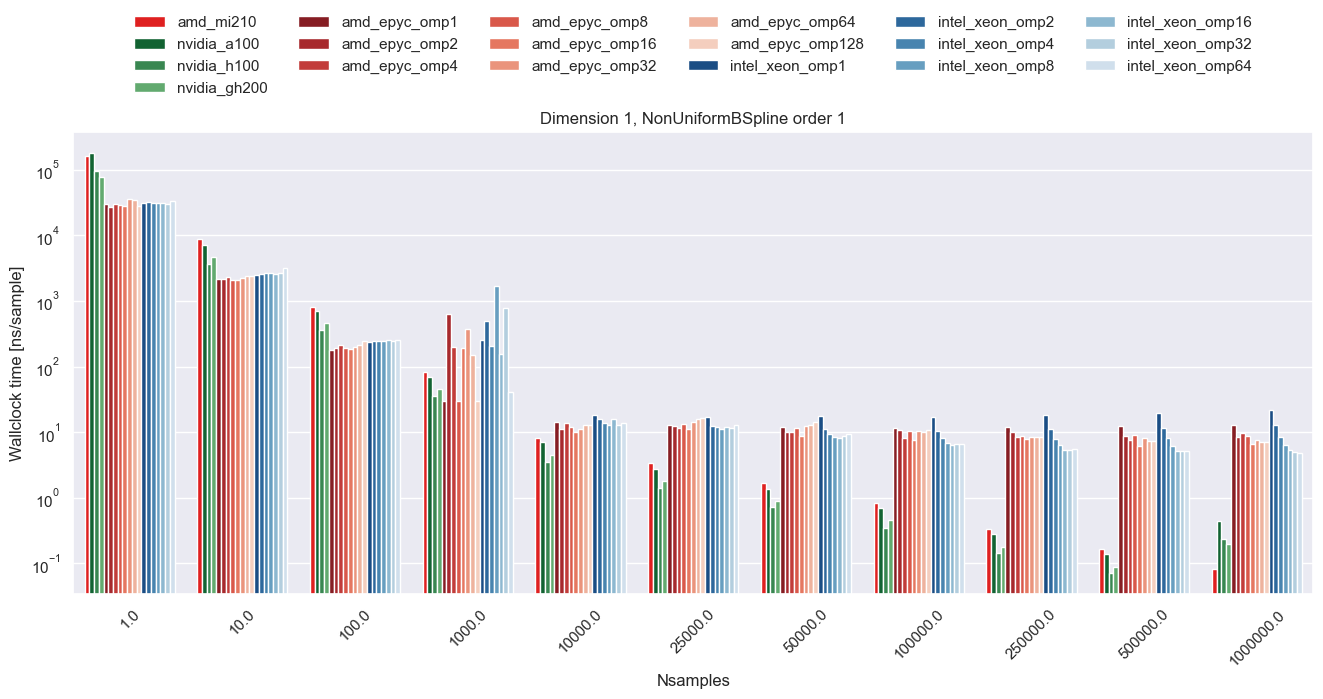

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3963620041.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df["Nsamples"], rotation=45)


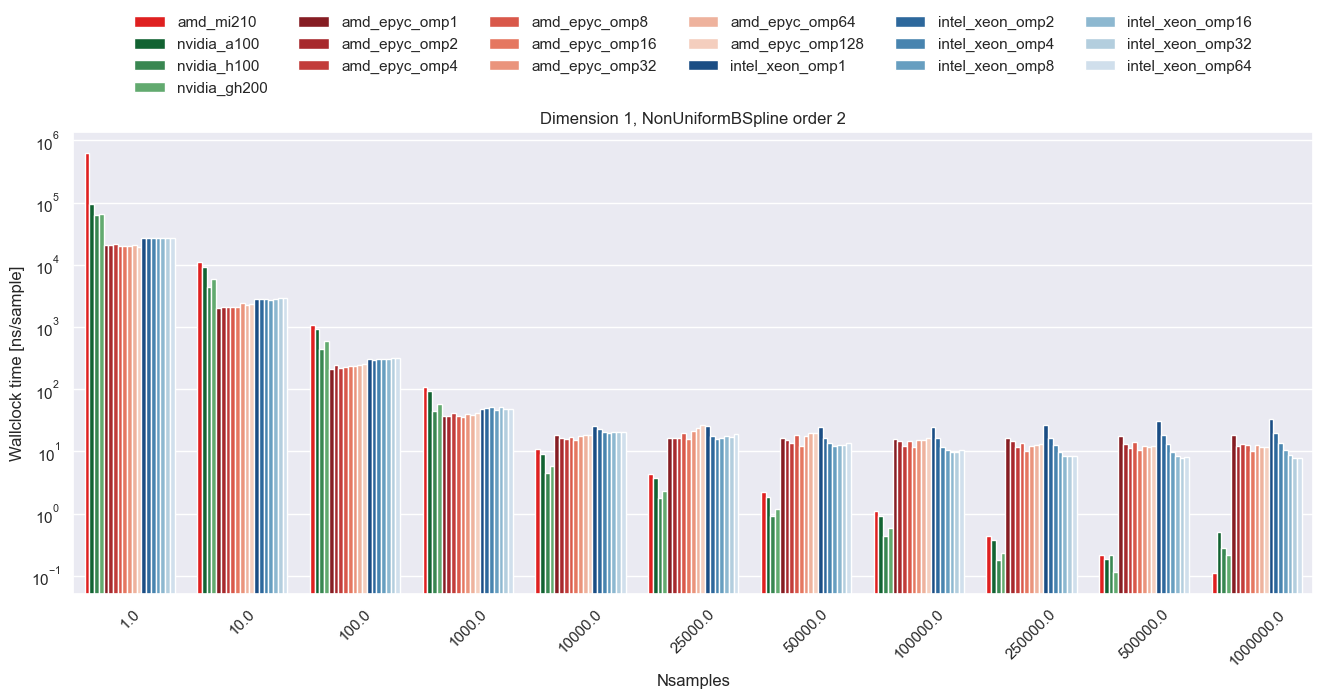

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3963620041.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df["Nsamples"], rotation=45)


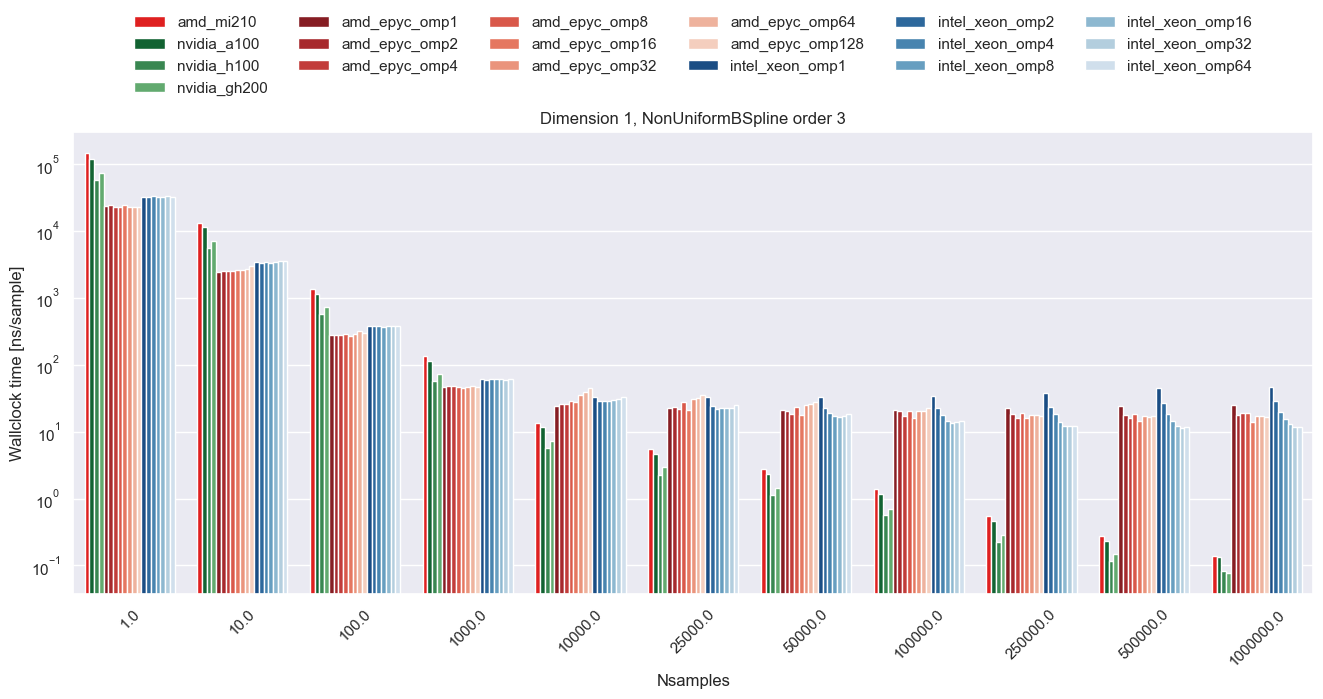

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3963620041.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df["Nsamples"], rotation=45)


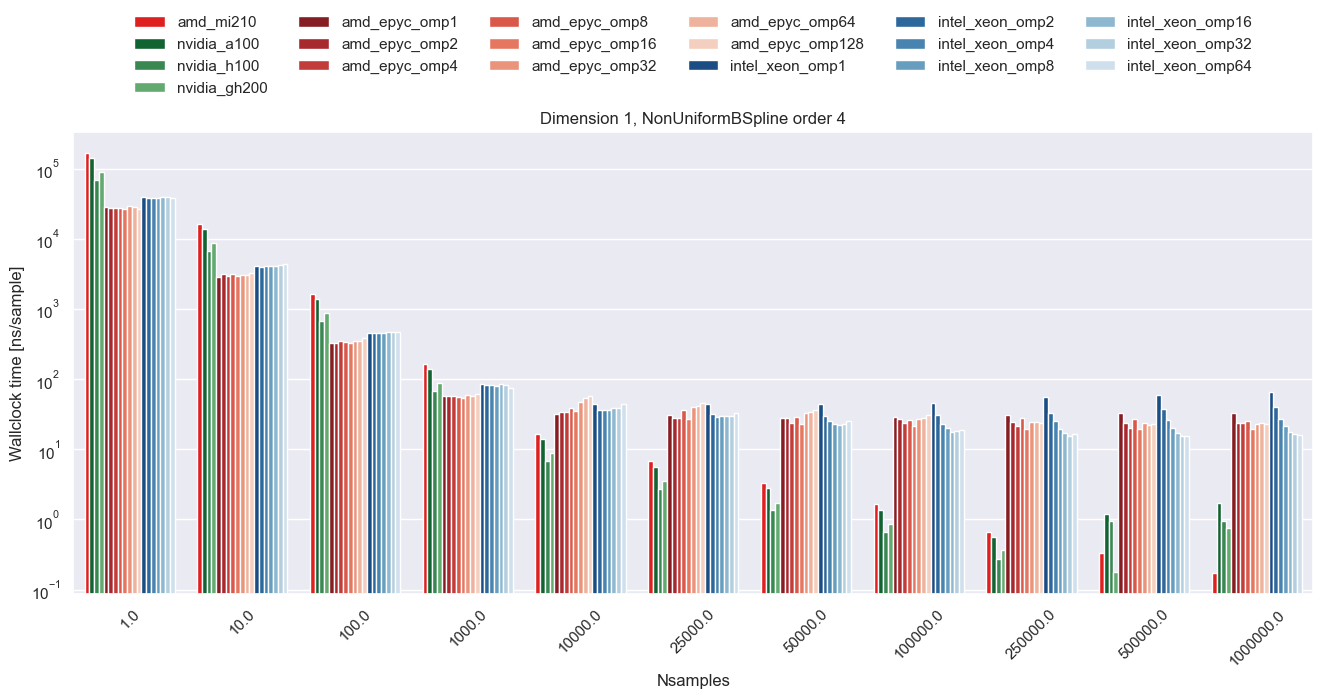

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3963620041.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df["Nsamples"], rotation=45)


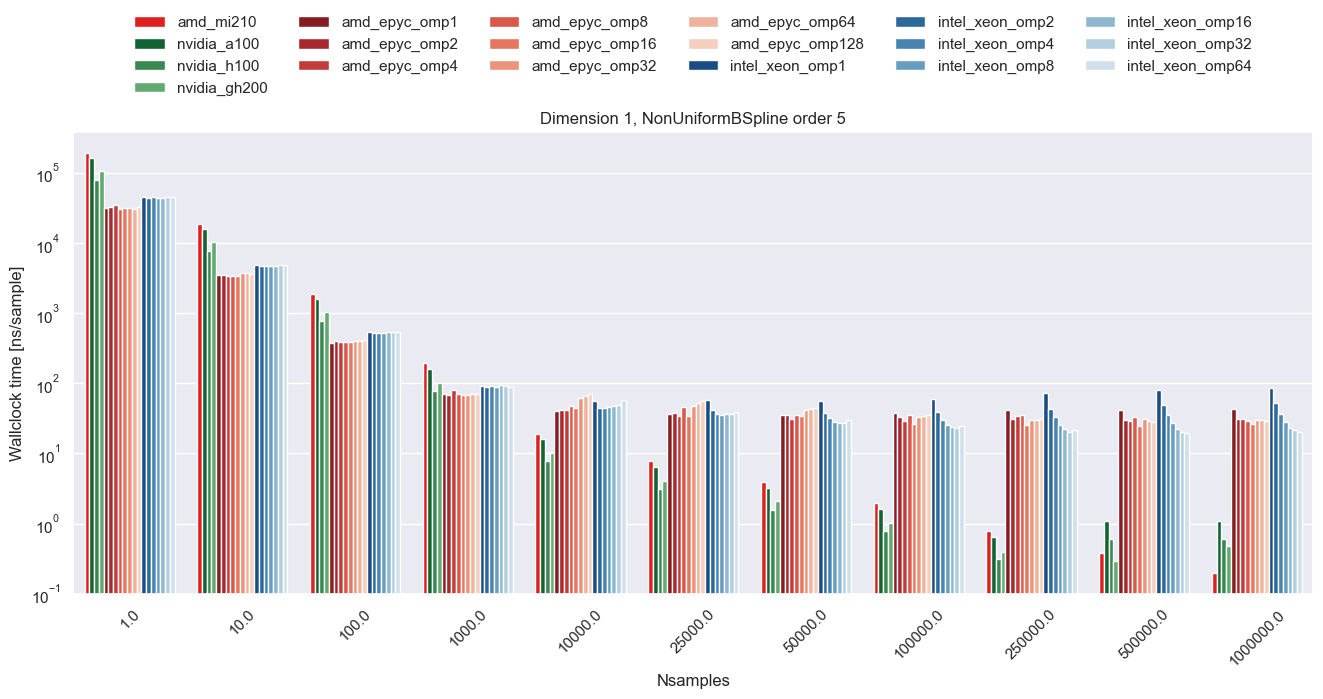

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3963620041.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df["Nsamples"], rotation=45)


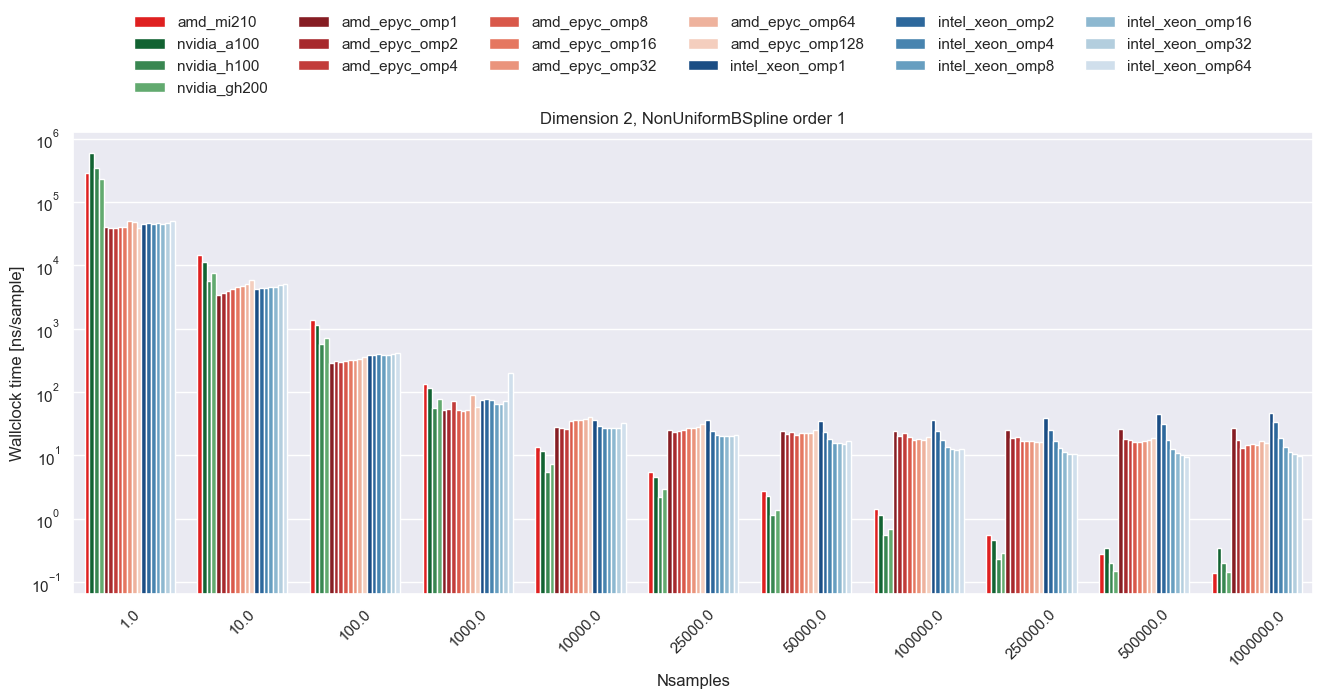

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3963620041.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df["Nsamples"], rotation=45)


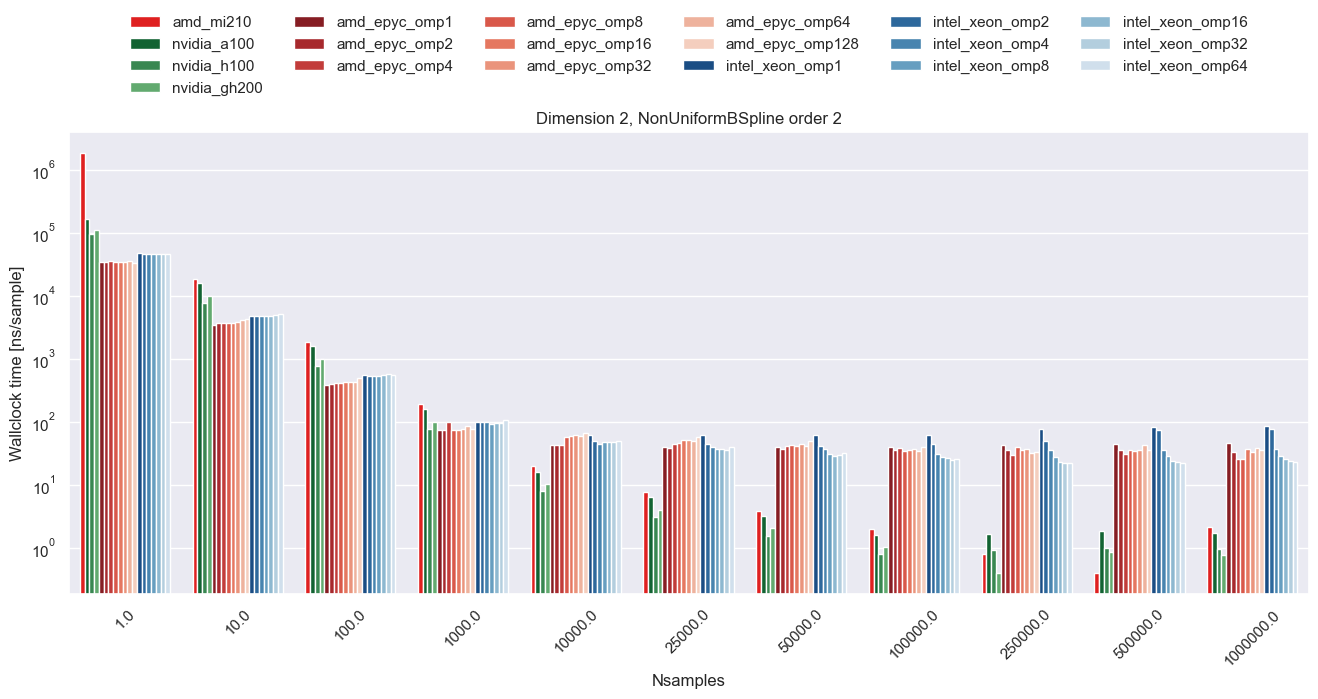

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3963620041.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df["Nsamples"], rotation=45)


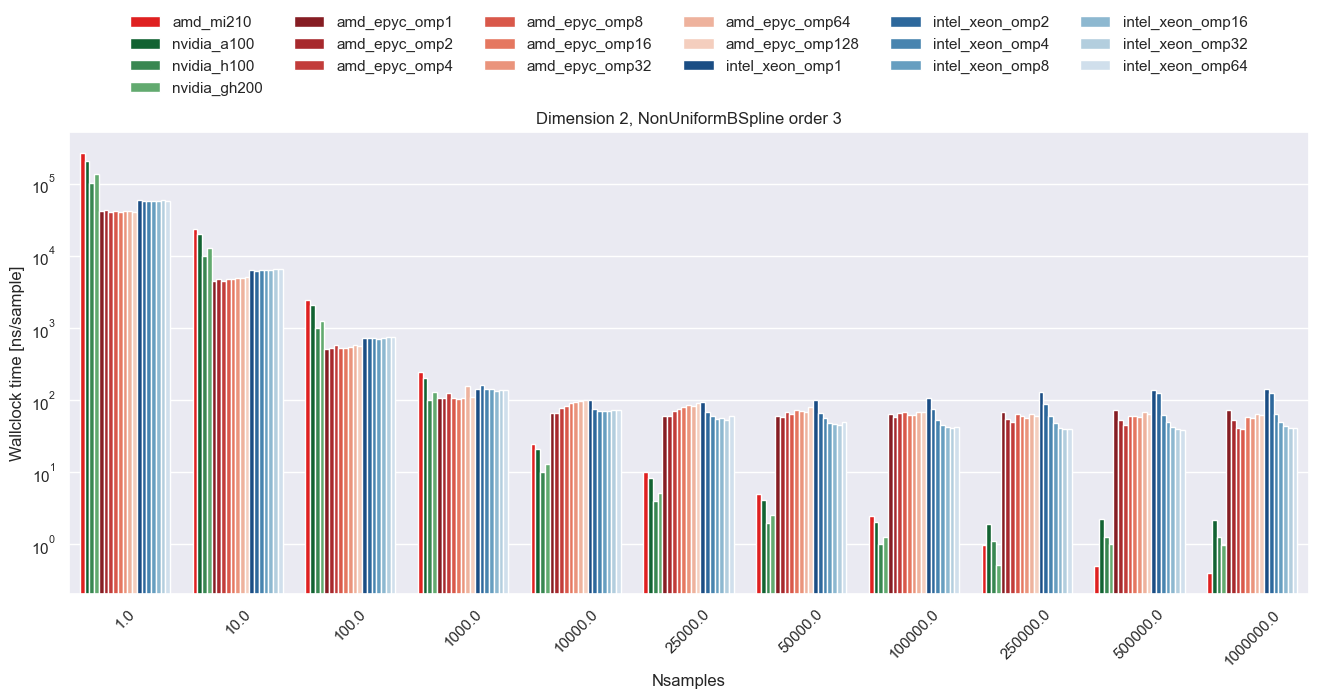

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3963620041.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df["Nsamples"], rotation=45)


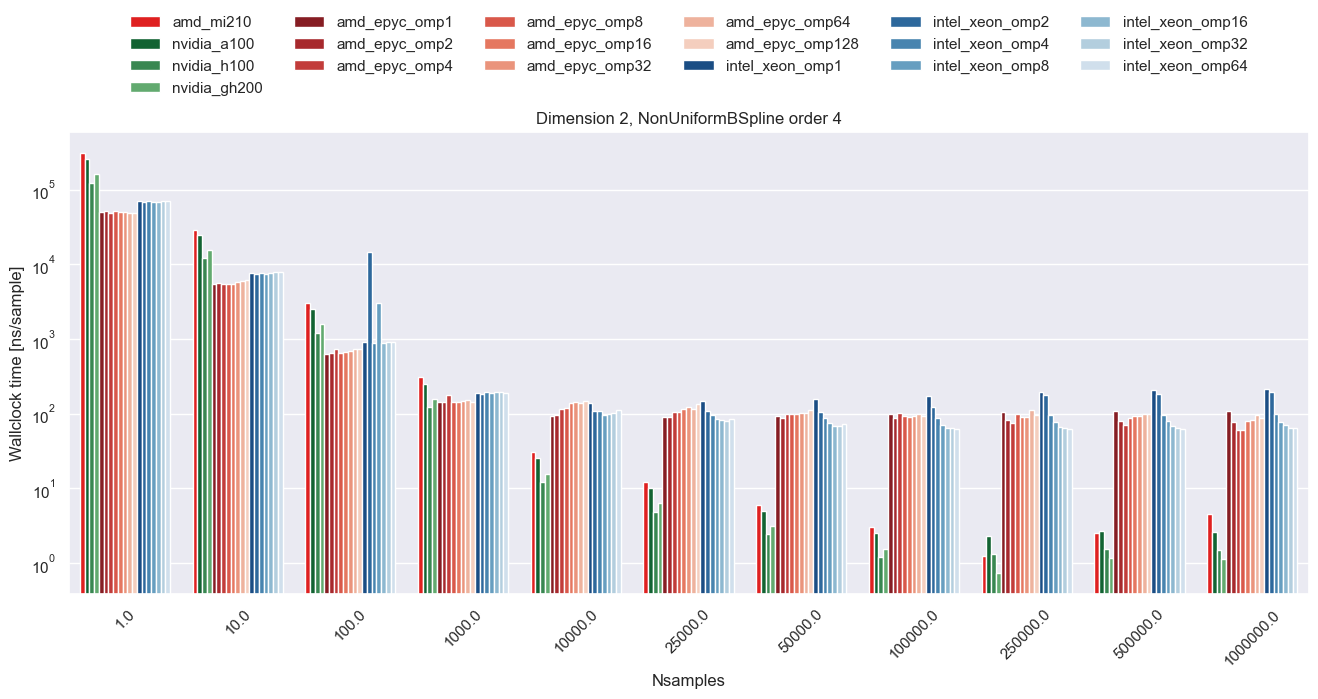

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3963620041.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df["Nsamples"], rotation=45)


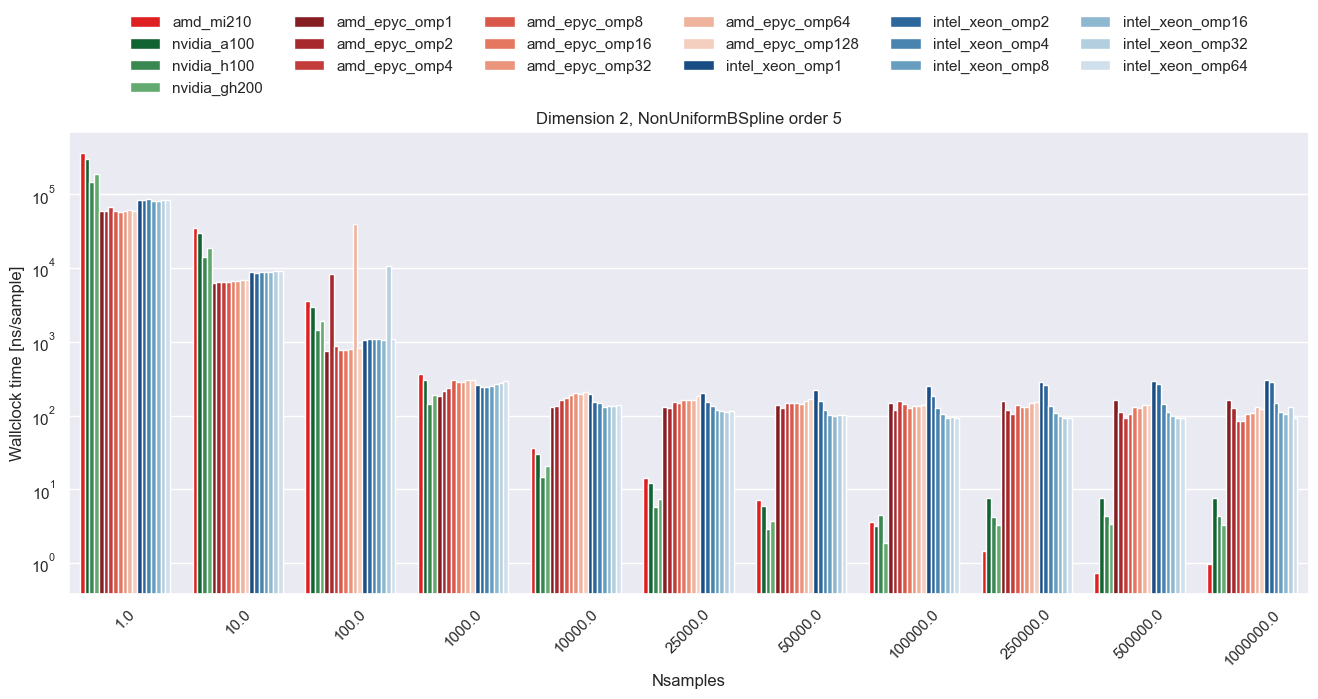

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3963620041.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df["Nsamples"], rotation=45)


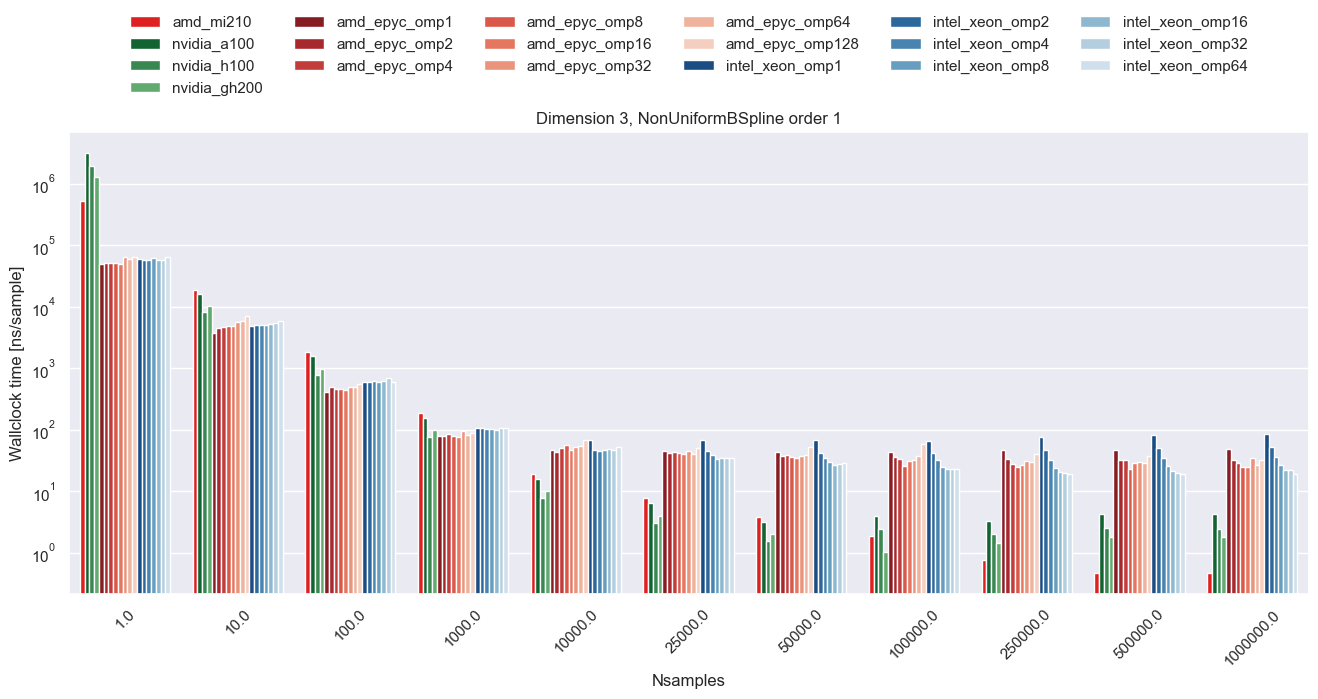

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3963620041.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df["Nsamples"], rotation=45)


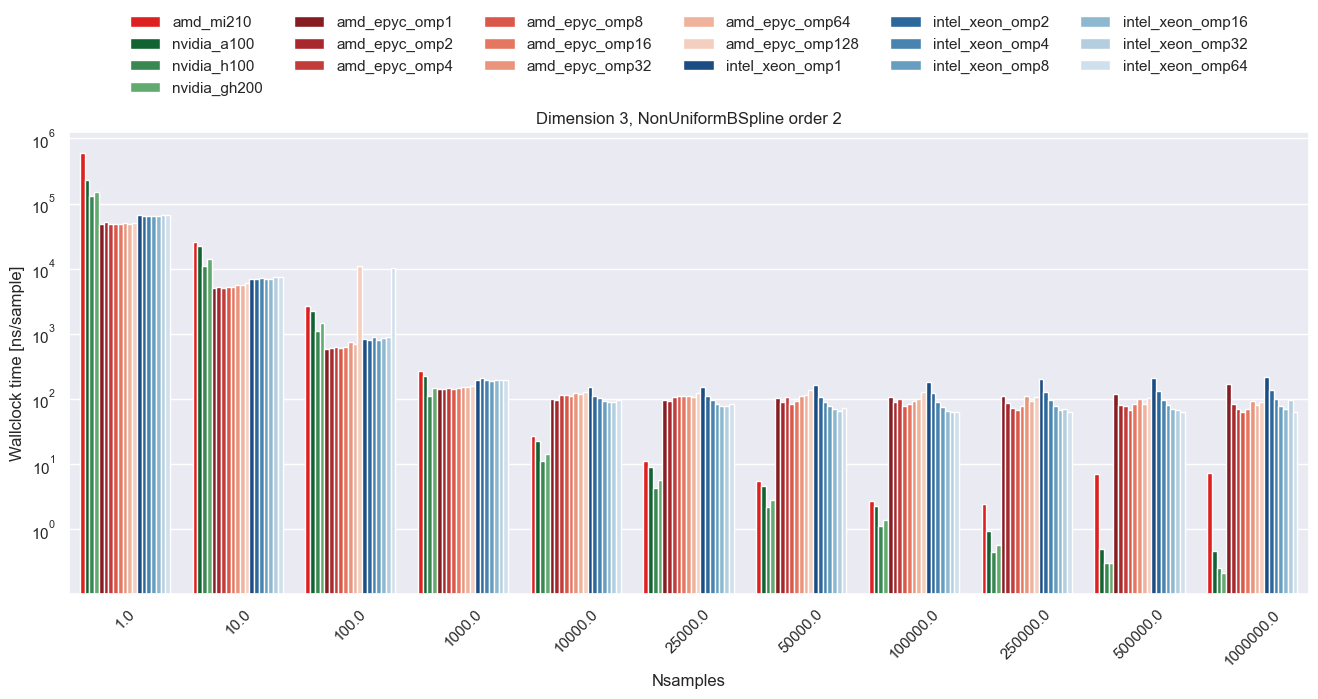

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3963620041.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df["Nsamples"], rotation=45)


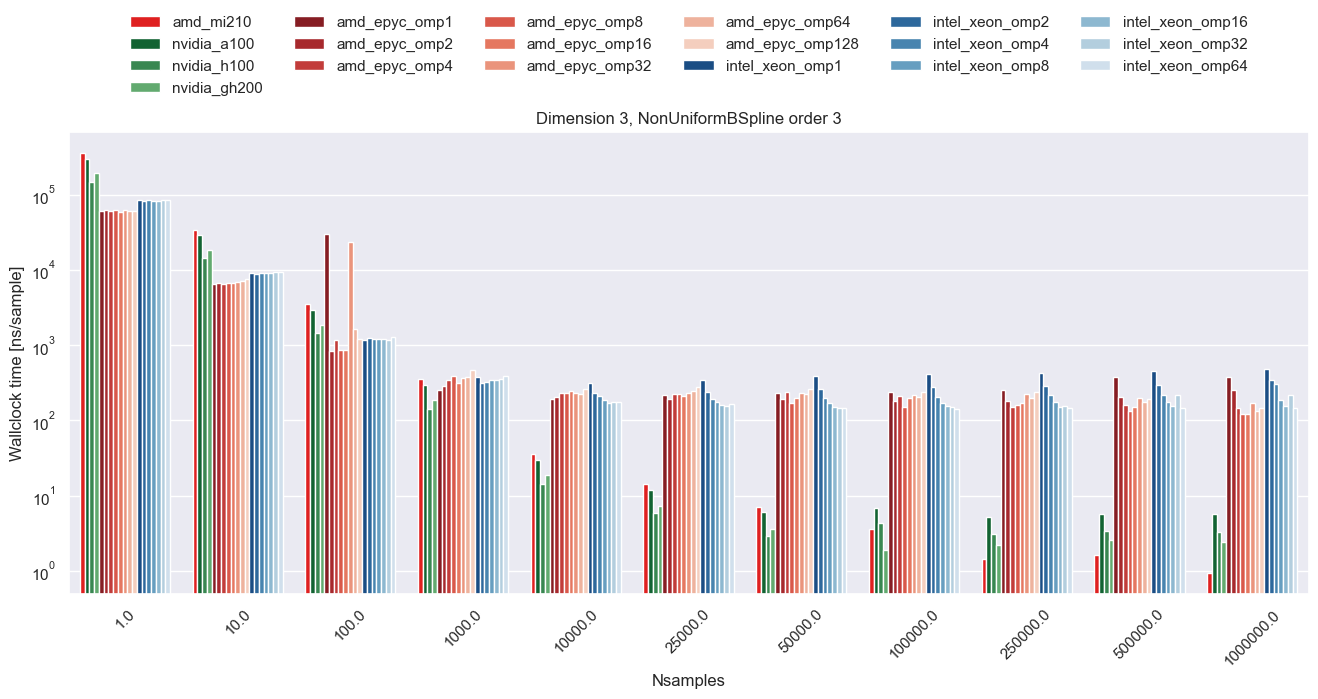

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3963620041.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df["Nsamples"], rotation=45)


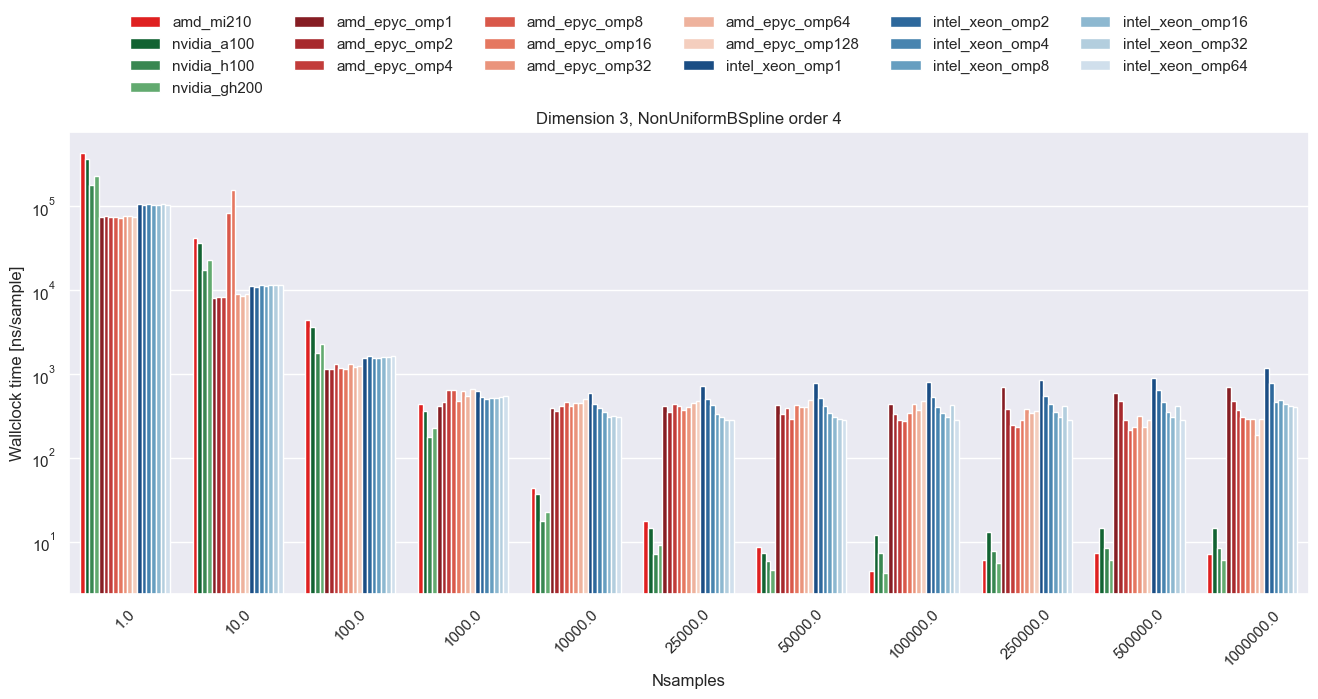

/var/folders/c4/qhz92rv97px9r7v33t336gyw0000gn/T/ipykernel_57688/3963620041.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df["Nsamples"], rotation=45)


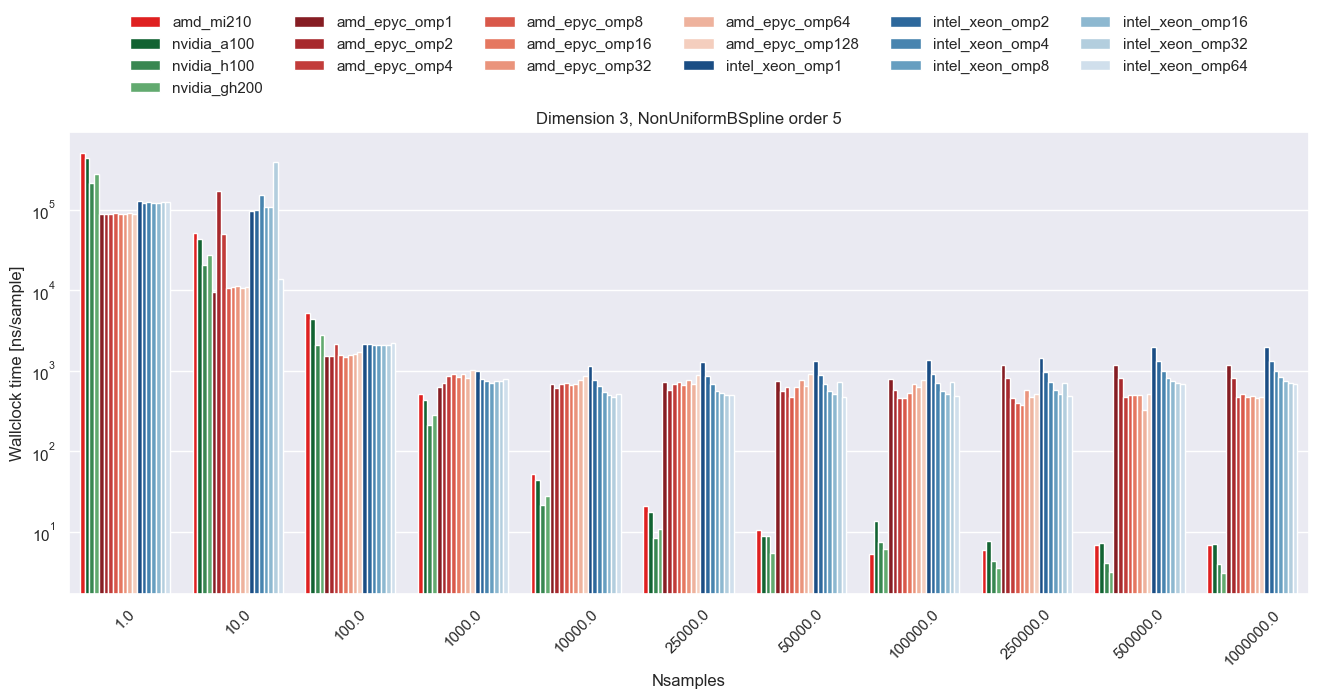

In [10]:
colors = [(1, 0, 0)] + \
         sns.color_palette('Greens')[-3:][::-1] + \
         sns.color_palette('Reds', 9)[-8:][::-1] + \
         sns.color_palette('Blues', 8)[-7:][::-1]
sns.set_palette(colors)

for spline in 'UniformBSpline', 'NonUniformBSpline':
    for dim in range(1, 4):
        for p in range(1, 6):
            plt.figure(figsize=(16, 6))
            pdf = df[(df['Dimension'] == dim) & \
                     (df['SplineType'] == spline) & \
                     (df['Memory Optimized'] == False) & \
                     (df['Precompute'] == True) & \
                     (df['Requires Grad'] == False)]
            ax = sns.barplot(data=pdf, x='Nsamples', y=f'p={p}', hue='Device', errorbar=None)
            sns.move_legend(ax, "lower center",
                            bbox_to_anchor=(.5, 1.05), ncol=6, title=None, frameon=False)
            plt.yscale("log")
            plt.ylabel('Wallclock time [ns/sample]')
            plt.title(f'Dimension {dim}, B-spline order {p}')
            ax.set_xticklabels(labels=df["Nsamples"], rotation=45)
            plt.title(f'Dimension {dim}, {spline} order {p}')
            plt.savefig(f'all_{spline}_dim{dim}_p{p}.pdf', format='pdf', bbox_inches='tight')
            plt.show()